In [ ]:
#30 эпох, 500 юзеров на тесте, в предсказаниях любимый жанр пользователя

Импорт необходимых библиотек

In [ ]:
import pandas as pd
import ast

Подключение к Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Считывание файлов из архива

In [ ]:
import zipfile
from tqdm import tqdm
zf = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/data-train.zip')
for file in tqdm(zf.infolist()):
  zf.extract(file)

100%|██████████| 7/7 [00:01<00:00,  4.70it/s]


Создание датафреймов из csv файлов в директории train

In [ ]:
df_countries = pd.read_csv('data-train/train/countries.csv')
df_countries

,id,name
0,0,Франция
1,1,Мальта
2,5,Новая Зеландия
3,8,Куба
4,10,Пуэрто-Рико
...,...,...
95,249,Узбекистан
96,250,Гонконг
97,251,Непал
98,252,Индия


In [ ]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      100 non-null    int64 
 1   name    100 non-null    object
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [ ]:
df_genres = pd.read_csv('data-train/train/genres.csv')
df_genres

,id,name
0,2,Сказка
1,8,Здоровье
2,17,Наука
3,24,Комедийная мелодрама
4,38,Мистика
...,...,...
91,356,Спорт
92,360,Аудиокниги
93,362,Стендап
94,366,Детские программы


In [ ]:
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      96 non-null     int64 
 1   name    96 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [ ]:
df_logs = pd.read_csv('data-train/train/logs.csv')
df_logs

,id,datetime,user_id,movie_id,duration
0,0,2023-04-06T15:00:00.071114+03:00,10250,427.0,485.0
1,1,2023-04-06T15:00:01.123928+03:00,2062,1521.0,129.0
2,2,2023-04-06T15:00:03.957246+03:00,12980,4598.0,2795.0
3,3,2023-04-06T15:00:04.990565+03:00,30646,5324.0,5094.0
4,4,2023-04-06T15:00:10.495017+03:00,43069,4291.0,75.0
...,...,...,...,...,...
2477900,2477900,2023-06-14T23:59:53.574691+03:00,791,4664.0,325.0
2477901,2477901,2023-06-14T23:59:54.625209+03:00,7455,3663.0,1006.0
2477902,2477902,2023-06-14T23:59:56.479088+03:00,8733,4789.0,756.0
2477903,2477903,2023-06-14T23:59:57.67986+03:00,77954,1781.0,1203.0


In [ ]:
df_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477905 entries, 0 to 2477904
Data columns (total 5 columns):
 #   Column    Dtype  
---  ------    -----  
 0   id        int64  
 1   datetime  object 
 2   user_id   int64  
 3   movie_id  float64
 4   duration  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 94.5+ MB


In [ ]:
df_movies = pd.read_csv('data-train/train/movies.csv')
df_movies

,id,name,year,date_publication,description,genres,countries,staff
0,0,"Мама, я дома",2022-01-01,2022-11-23T00:00:00,Где-то в глубинке вместе с дочерью и внуком жи...,[97],[238],"[1883, 33655, 25890, 1001, 12051, 10110, 16895]"
1,1,Три метра над уровнем неба,2010-01-01,NaN,"История любви парня и девушки, принадлежащих к...","[138, 97, 294]",[242],"[18168, 23444, 10850, 21847, 30555, 24469, 268..."
2,2,Детектив ди и тайна призрачного пламени,2010-01-01,NaN,"690 год нашей эры, Китай. Первая императрица д...","[294, 302]","[250, 117]","[3933, 19953, 32174, 30640, 14127, 32141, 2549..."
3,3,Капитан,2017-01-01,2022-10-20T00:00:00,Вторая мировая война подходит к концу. В это в...,"[97, 303, 143, 319]","[188, 212, 0]","[16006, 12217, 30668, 28806, 16172, 5045, 1663..."
4,4,Лазурный берег,2015-01-01,2023-01-12T00:00:00,У бывшей танцовщицы Ванессы и писателя Роланда...,"[138, 97]","[1, 102, 0]","[23586, 8823, 8040, 34555, 32484, 18446]"
...,...,...,...,...,...,...,...,...
7422,7422,Ромео + Джульетта,1996-01-01,2023-03-03T00:00:00,"Переосмысление знаменитой истории Шекспира, пе...","[138, 97]","[49, 102]","[31732, 12514, 5845, 12650, 23433, 28088, 64, ..."
7423,7423,"Поймай меня, если сможешь",2002-01-01,2020-03-27T07:13:01.449866,"Фрэнк Эбэгнейл успел поработать врачом, адвока...","[85, 303]","[121, 102]","[5166, 24667, 6277, 8266, 4854, 2186, 29049, 6..."
7424,7424,Молодой Годар,2017-01-01,NaN,"Париж, 1967 год. Жан-Люк Годар - лидер «новой ...","[138, 85]",[0],"[5828, 24468, 5125, 19939, 12752, 21851, 22674..."
7425,7425,Юлия Колерт — «Окна»,2023-01-01,2023-06-01T00:00:00,Юлия Колерт \n«Окна»\nКоличество просмотров*: ...,[247],[238],[]


In [ ]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7427 entries, 0 to 7426
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                7427 non-null   int64 
 1   name              7427 non-null   object
 2   year              7427 non-null   object
 3   date_publication  4923 non-null   object
 4   description       7288 non-null   object
 5   genres            7427 non-null   object
 6   countries         7427 non-null   object
 7   staff             7427 non-null   object
dtypes: int64(1), object(7)
memory usage: 464.3+ KB


In [ ]:
country_dict = df_countries.set_index('id')['name'].to_dict()

In [ ]:
df_movies = df_movies[['id', 'name', 'genres', 'countries', 'staff', 'description']]
df_movies['countries'] = df_movies['countries'].apply(lambda x: ast.literal_eval(x))

# Функция для замены индексов на названия стран
def replace_countries(idx_list):
    return [country_dict[idx] for idx in idx_list]

# Применяем функцию к столбцу
df_movies['countries'] = df_movies['countries'].apply(replace_countries)

<ipython-input-13-309226d8ce9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['countries'] = df_movies['countries'].apply(lambda x: ast.literal_eval(x))
<ipython-input-13-309226d8ce9d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['countries'] = df_movies['countries'].apply(replace_countries)


In [ ]:
genres_dict = df_genres.set_index('id')['name'].to_dict()


df_movies['genres'] = df_movies['genres'].apply(lambda x: ast.literal_eval(x))

# Функция для замены индексов на названия стран
def replace_genres(idx_list):
    return [genres_dict[idx] for idx in idx_list]

# Применяем функцию к столбцу
df_movies['genres'] = df_movies['genres'].apply(replace_genres)

<ipython-input-14-1d6549690787>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['genres'] = df_movies['genres'].apply(lambda x: ast.literal_eval(x))
<ipython-input-14-1d6549690787>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['genres'] = df_movies['genres'].apply(replace_genres)


In [ ]:
df_staff = pd.read_csv('data-train/train/staff.csv')
df_staff

,id,name,role
0,0,Юрий Волынцев,actor
1,1,Коннор Смит,actor
2,2,Майкл Гандольфини,actor
3,3,Майкл Маркс,producer
4,4,Кад Мерад,actor
...,...,...,...
35679,35679,Сара Суко,actor
35680,35680,Брайан Бертино,director
35681,35681,Изабелла Феррари,actor
35682,35682,Дэвид Лесли Джонсон,writer


In [ ]:
df_staff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35684 entries, 0 to 35683
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      35684 non-null  int64 
 1   name    35684 non-null  object
 2   role    35684 non-null  object
dtypes: int64(1), object(2)
memory usage: 836.5+ KB


In [ ]:
staff_dict = df_staff.set_index('id')['name'].to_dict()

df_movies['staff'] = df_movies['staff'].apply(lambda x: ast.literal_eval(x))

# Функция для замены индексов на имена персонала
def replace_staff(idx_list):
    return [staff_dict[idx] for idx in idx_list]

# Применяем функцию к столбцу
df_movies['staff'] = df_movies['staff'].apply(replace_staff)

<ipython-input-17-4ccc1bf1b30c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['staff'] = df_movies['staff'].apply(lambda x: ast.literal_eval(x))
<ipython-input-17-4ccc1bf1b30c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['staff'] = df_movies['staff'].apply(replace_staff)


In [ ]:
df_movies

,id,name,genres,countries,staff,description
0,0,"Мама, я дома",[Драма],[Россия],"[Мажит Жангузаров, Наталья Павленкова, Ксения ...",Где-то в глубинке вместе с дочерью и внуком жи...
1,1,Три метра над уровнем неба,"[Мелодрама, Драма, Боевик]",[Испания],"[Альваро Сервантес, Андреа Дуро, Мария Вальвер...","История любви парня и девушки, принадлежащих к..."
2,2,Детектив ди и тайна призрачного пламени,"[Боевик, Фэнтези]","[Гонконг, Китай]","[Тони Люн Ка-Фай, Линь Цяньюй, Чао Ден, Ден Ча...","690 год нашей эры, Китай. Первая императрица д..."
3,3,Капитан,"[Драма, Триллер, Военный, История]","[Германия, Польша, Франция]","[Александр Фелинг, Харальд Вармбрунн, Себастья...",Вторая мировая война подходит к концу. В это в...
4,4,Лазурный берег,"[Мелодрама, Драма]","[Мальта, США, Франция]","[Мелани Лоран, Мельвиль Пупо, Анджелина Джоли,...",У бывшей танцовщицы Ванессы и писателя Роланда...
...,...,...,...,...,...,...
7422,7422,Ромео + Джульетта,"[Мелодрама, Драма]","[Мексика, США]","[Зак Орт, Эдвина Мур, Крэйг Пирс, Лупита Очоа,...","Переосмысление знаменитой истории Шекспира, пе..."
7423,7423,"Поймай меня, если сможешь","[Фильм, Триллер]","[Канада, США]","[Брайан Хау, Дженнифер Гарнер, Леонардо ДиКапр...","Фрэнк Эбэгнейл успел поработать врачом, адвока..."
7424,7424,Молодой Годар,"[Мелодрама, Фильм]",[Франция],"[Мишель Хазанавичус, Жан-Пьер Моки, Грегори Га...","Париж, 1967 год. Жан-Люк Годар - лидер «новой ..."
7425,7425,Юлия Колерт — «Окна»,[Музыка],[Россия],[],Юлия Колерт \n«Окна»\nКоличество просмотров*: ...


In [ ]:
df_logs

,id,datetime,user_id,movie_id,duration
0,0,2023-04-06T15:00:00.071114+03:00,10250,427.0,485.0
1,1,2023-04-06T15:00:01.123928+03:00,2062,1521.0,129.0
2,2,2023-04-06T15:00:03.957246+03:00,12980,4598.0,2795.0
3,3,2023-04-06T15:00:04.990565+03:00,30646,5324.0,5094.0
4,4,2023-04-06T15:00:10.495017+03:00,43069,4291.0,75.0
...,...,...,...,...,...
2477900,2477900,2023-06-14T23:59:53.574691+03:00,791,4664.0,325.0
2477901,2477901,2023-06-14T23:59:54.625209+03:00,7455,3663.0,1006.0
2477902,2477902,2023-06-14T23:59:56.479088+03:00,8733,4789.0,756.0
2477903,2477903,2023-06-14T23:59:57.67986+03:00,77954,1781.0,1203.0


In [ ]:
df_logs.describe()

,id,user_id,movie_id,duration
count,2.477905e+06,2.477905e+06,2.477905e+06,2.477905e+06
mean,1.238952e+06,3.102359e+04,3.722459e+03,2.771526e+03
std,7.153097e+05,4.517595e+04,2.128506e+03,2.658256e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,6.194760e+05,3.563000e+03,1.898000e+03,3.010000e+02
50%,1.238952e+06,1.306100e+04,3.712000e+03,2.049000e+03
75%,1.858428e+06,3.785200e+04,5.603000e+03,4.954000e+03
max,2.477904e+06,2.638740e+05,7.426000e+03,8.140800e+05


In [ ]:
df_movies

,id,name,genres,countries,staff,description
0,0,"Мама, я дома",[Драма],[Россия],"[Мажит Жангузаров, Наталья Павленкова, Ксения ...",Где-то в глубинке вместе с дочерью и внуком жи...
1,1,Три метра над уровнем неба,"[Мелодрама, Драма, Боевик]",[Испания],"[Альваро Сервантес, Андреа Дуро, Мария Вальвер...","История любви парня и девушки, принадлежащих к..."
2,2,Детектив ди и тайна призрачного пламени,"[Боевик, Фэнтези]","[Гонконг, Китай]","[Тони Люн Ка-Фай, Линь Цяньюй, Чао Ден, Ден Ча...","690 год нашей эры, Китай. Первая императрица д..."
3,3,Капитан,"[Драма, Триллер, Военный, История]","[Германия, Польша, Франция]","[Александр Фелинг, Харальд Вармбрунн, Себастья...",Вторая мировая война подходит к концу. В это в...
4,4,Лазурный берег,"[Мелодрама, Драма]","[Мальта, США, Франция]","[Мелани Лоран, Мельвиль Пупо, Анджелина Джоли,...",У бывшей танцовщицы Ванессы и писателя Роланда...
...,...,...,...,...,...,...
7422,7422,Ромео + Джульетта,"[Мелодрама, Драма]","[Мексика, США]","[Зак Орт, Эдвина Мур, Крэйг Пирс, Лупита Очоа,...","Переосмысление знаменитой истории Шекспира, пе..."
7423,7423,"Поймай меня, если сможешь","[Фильм, Триллер]","[Канада, США]","[Брайан Хау, Дженнифер Гарнер, Леонардо ДиКапр...","Фрэнк Эбэгнейл успел поработать врачом, адвока..."
7424,7424,Молодой Годар,"[Мелодрама, Фильм]",[Франция],"[Мишель Хазанавичус, Жан-Пьер Моки, Грегори Га...","Париж, 1967 год. Жан-Люк Годар - лидер «новой ..."
7425,7425,Юлия Колерт — «Окна»,[Музыка],[Россия],[],Юлия Колерт \n«Окна»\nКоличество просмотров*: ...


In [ ]:
df_movies =df_movies.applymap(lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x)
df_movies

,id,name,genres,countries,staff,description
0,0,"Мама, я дома",Драма,Россия,"Мажит Жангузаров, Наталья Павленкова, Ксения Р...",Где-то в глубинке вместе с дочерью и внуком жи...
1,1,Три метра над уровнем неба,"Мелодрама, Драма, Боевик",Испания,"Альваро Сервантес, Андреа Дуро, Мария Вальверд...","История любви парня и девушки, принадлежащих к..."
2,2,Детектив ди и тайна призрачного пламени,"Боевик, Фэнтези","Гонконг, Китай","Тони Люн Ка-Фай, Линь Цяньюй, Чао Ден, Ден Чао...","690 год нашей эры, Китай. Первая императрица д..."
3,3,Капитан,"Драма, Триллер, Военный, История","Германия, Польша, Франция","Александр Фелинг, Харальд Вармбрунн, Себастьян...",Вторая мировая война подходит к концу. В это в...
4,4,Лазурный берег,"Мелодрама, Драма","Мальта, США, Франция","Мелани Лоран, Мельвиль Пупо, Анджелина Джоли, ...",У бывшей танцовщицы Ванессы и писателя Роланда...
...,...,...,...,...,...,...
7422,7422,Ромео + Джульетта,"Мелодрама, Драма","Мексика, США","Зак Орт, Эдвина Мур, Крэйг Пирс, Лупита Очоа, ...","Переосмысление знаменитой истории Шекспира, пе..."
7423,7423,"Поймай меня, если сможешь","Фильм, Триллер","Канада, США","Брайан Хау, Дженнифер Гарнер, Леонардо ДиКапри...","Фрэнк Эбэгнейл успел поработать врачом, адвока..."
7424,7424,Молодой Годар,"Мелодрама, Фильм",Франция,"Мишель Хазанавичус, Жан-Пьер Моки, Грегори Гад...","Париж, 1967 год. Жан-Люк Годар - лидер «новой ..."
7425,7425,Юлия Колерт — «Окна»,Музыка,Россия,,Юлия Колерт \n«Окна»\nКоличество просмотров*: ...


In [ ]:
df_logs

,id,datetime,user_id,movie_id,duration
0,0,2023-04-06T15:00:00.071114+03:00,10250,427.0,485.0
1,1,2023-04-06T15:00:01.123928+03:00,2062,1521.0,129.0
2,2,2023-04-06T15:00:03.957246+03:00,12980,4598.0,2795.0
3,3,2023-04-06T15:00:04.990565+03:00,30646,5324.0,5094.0
4,4,2023-04-06T15:00:10.495017+03:00,43069,4291.0,75.0
...,...,...,...,...,...
2477900,2477900,2023-06-14T23:59:53.574691+03:00,791,4664.0,325.0
2477901,2477901,2023-06-14T23:59:54.625209+03:00,7455,3663.0,1006.0
2477902,2477902,2023-06-14T23:59:56.479088+03:00,8733,4789.0,756.0
2477903,2477903,2023-06-14T23:59:57.67986+03:00,77954,1781.0,1203.0


In [ ]:
df_logs[df_logs['user_id']==10250]

,id,datetime,user_id,movie_id,duration
0,0,2023-04-06T15:00:00.071114+03:00,10250,427.0,485.0
2677,2677,2023-04-06T16:27:21.847971+03:00,10250,327.0,5155.0
28979,28979,2023-04-07T09:48:28.824328+03:00,10250,4176.0,2396.0
30038,30038,2023-04-07T10:39:45.946074+03:00,10250,4176.0,2933.0
374249,374249,2023-04-16T01:19:37.694341+03:00,10250,327.0,3.0
374250,374250,2023-04-16T01:19:37.69436+03:00,10250,1785.0,8.0
408116,408116,2023-04-16T20:02:23.184379+03:00,10250,4564.0,11.0
413420,413420,2023-04-16T21:46:58.68754+03:00,10250,4564.0,6205.0
417766,417766,2023-04-16T23:45:31.852647+03:00,10250,4576.0,5727.0
418248,418248,2023-04-17T00:08:37.809029+03:00,10250,5056.0,923.0


In [ ]:
df_movies

,id,name,genres,countries,staff,description
0,0,"Мама, я дома",Драма,Россия,"Мажит Жангузаров, Наталья Павленкова, Ксения Р...",Где-то в глубинке вместе с дочерью и внуком жи...
1,1,Три метра над уровнем неба,"Мелодрама, Драма, Боевик",Испания,"Альваро Сервантес, Андреа Дуро, Мария Вальверд...","История любви парня и девушки, принадлежащих к..."
2,2,Детектив ди и тайна призрачного пламени,"Боевик, Фэнтези","Гонконг, Китай","Тони Люн Ка-Фай, Линь Цяньюй, Чао Ден, Ден Чао...","690 год нашей эры, Китай. Первая императрица д..."
3,3,Капитан,"Драма, Триллер, Военный, История","Германия, Польша, Франция","Александр Фелинг, Харальд Вармбрунн, Себастьян...",Вторая мировая война подходит к концу. В это в...
4,4,Лазурный берег,"Мелодрама, Драма","Мальта, США, Франция","Мелани Лоран, Мельвиль Пупо, Анджелина Джоли, ...",У бывшей танцовщицы Ванессы и писателя Роланда...
...,...,...,...,...,...,...
7422,7422,Ромео + Джульетта,"Мелодрама, Драма","Мексика, США","Зак Орт, Эдвина Мур, Крэйг Пирс, Лупита Очоа, ...","Переосмысление знаменитой истории Шекспира, пе..."
7423,7423,"Поймай меня, если сможешь","Фильм, Триллер","Канада, США","Брайан Хау, Дженнифер Гарнер, Леонардо ДиКапри...","Фрэнк Эбэгнейл успел поработать врачом, адвока..."
7424,7424,Молодой Годар,"Мелодрама, Фильм",Франция,"Мишель Хазанавичус, Жан-Пьер Моки, Грегори Гад...","Париж, 1967 год. Жан-Люк Годар - лидер «новой ..."
7425,7425,Юлия Колерт — «Окна»,Музыка,Россия,,Юлия Колерт \n«Окна»\nКоличество просмотров*: ...


In [ ]:
df_movies = df_movies.fillna('') #заполним пустые значения в описании

In [ ]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7427 entries, 0 to 7426
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           7427 non-null   int64 
 1   name         7427 non-null   object
 2   genres       7427 non-null   object
 3   countries    7427 non-null   object
 4   staff        7427 non-null   object
 5   description  7427 non-null   object
dtypes: int64(1), object(5)
memory usage: 348.3+ KB


In [ ]:
df_logs['movie_id'] = df_logs['movie_id'].astype(int)
df_logs['duration'] = df_logs['duration'].astype(int)

df_logs

,id,datetime,user_id,movie_id,duration
0,0,2023-04-06T15:00:00.071114+03:00,10250,427,485
1,1,2023-04-06T15:00:01.123928+03:00,2062,1521,129
2,2,2023-04-06T15:00:03.957246+03:00,12980,4598,2795
3,3,2023-04-06T15:00:04.990565+03:00,30646,5324,5094
4,4,2023-04-06T15:00:10.495017+03:00,43069,4291,75
...,...,...,...,...,...
2477900,2477900,2023-06-14T23:59:53.574691+03:00,791,4664,325
2477901,2477901,2023-06-14T23:59:54.625209+03:00,7455,3663,1006
2477902,2477902,2023-06-14T23:59:56.479088+03:00,8733,4789,756
2477903,2477903,2023-06-14T23:59:57.67986+03:00,77954,1781,1203


In [ ]:
df_movies = df_movies.rename(columns={'id': 'movie_id'})
df_movies

,movie_id,name,genres,countries,staff,description
0,0,"Мама, я дома",Драма,Россия,"Мажит Жангузаров, Наталья Павленкова, Ксения Р...",Где-то в глубинке вместе с дочерью и внуком жи...
1,1,Три метра над уровнем неба,"Мелодрама, Драма, Боевик",Испания,"Альваро Сервантес, Андреа Дуро, Мария Вальверд...","История любви парня и девушки, принадлежащих к..."
2,2,Детектив ди и тайна призрачного пламени,"Боевик, Фэнтези","Гонконг, Китай","Тони Люн Ка-Фай, Линь Цяньюй, Чао Ден, Ден Чао...","690 год нашей эры, Китай. Первая императрица д..."
3,3,Капитан,"Драма, Триллер, Военный, История","Германия, Польша, Франция","Александр Фелинг, Харальд Вармбрунн, Себастьян...",Вторая мировая война подходит к концу. В это в...
4,4,Лазурный берег,"Мелодрама, Драма","Мальта, США, Франция","Мелани Лоран, Мельвиль Пупо, Анджелина Джоли, ...",У бывшей танцовщицы Ванессы и писателя Роланда...
...,...,...,...,...,...,...
7422,7422,Ромео + Джульетта,"Мелодрама, Драма","Мексика, США","Зак Орт, Эдвина Мур, Крэйг Пирс, Лупита Очоа, ...","Переосмысление знаменитой истории Шекспира, пе..."
7423,7423,"Поймай меня, если сможешь","Фильм, Триллер","Канада, США","Брайан Хау, Дженнифер Гарнер, Леонардо ДиКапри...","Фрэнк Эбэгнейл успел поработать врачом, адвока..."
7424,7424,Молодой Годар,"Мелодрама, Фильм",Франция,"Мишель Хазанавичус, Жан-Пьер Моки, Грегори Гад...","Париж, 1967 год. Жан-Люк Годар - лидер «новой ..."
7425,7425,Юлия Колерт — «Окна»,Музыка,Россия,,Юлия Колерт \n«Окна»\nКоличество просмотров*: ...


In [ ]:
df_logs_unique_count = df_logs.groupby(['user_id', 'movie_id'], as_index=False)['duration'].agg(['sum', 'count']).reset_index()
df_logs_unique_count

,user_id,movie_id,sum,count
0,0,12,8690,5
1,0,74,36183,49
2,0,107,110996,172
3,0,126,147,6
4,0,165,2286,7
...,...,...,...,...
1652019,263866,2348,170,1
1652020,263868,6918,2022,1
1652021,263870,6207,1,1
1652022,263873,5336,5864,1


In [ ]:
df_logs_unique = df_logs.groupby(['user_id', 'movie_id'], as_index=False)['duration'].sum()

print("Датафрейм с уникальными сочетаниями user_id и movie_id, с суммированием duration:")
df_logs_unique

Датафрейм с уникальными сочетаниями user_id и movie_id, с суммированием duration:


,user_id,movie_id,duration
0,0,12,8690
1,0,74,36183
2,0,107,110996
3,0,126,147
4,0,165,2286
...,...,...,...
1652019,263866,2348,170
1652020,263868,6918,2022
1652021,263870,6207,1
1652022,263873,5336,5864


In [ ]:
# df_logs_unique = df_logs_unique[df_logs_unique['duration']>180]
# df_logs_unique

In [ ]:
data = df_logs_unique
data

,user_id,movie_id,duration
0,0,12,8690
1,0,74,36183
2,0,107,110996
3,0,126,147
4,0,165,2286
...,...,...,...
1652019,263866,2348,170
1652020,263868,6918,2022
1652021,263870,6207,1
1652022,263873,5336,5864


In [ ]:
user_ids = data["user_id"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded2user = {i: x for i, x in enumerate(user_ids)}
data["user"] = data["user_id"].map(user2user_encoded)
n_users = len(user2user_encoded)

movie_ids = data["movie_id"].unique().tolist()
movie2movie_encoded = {x: i for i, x in enumerate(movie_ids)}
movie_encoded2movie = {i: x for i, x in enumerate(movie_ids)}
data["movie"] = data["movie_id"].map(movie2movie_encoded)
n_movies = len(movie2movie_encoded)

print("Num of users: {}, Num of movies: {}".format(n_users, n_movies))


Num of users: 207377, Num of movies: 5283


In [ ]:
data

,user_id,movie_id,duration,user,movie
0,0,12,8690,0,0
1,0,74,36183,0,1
2,0,107,110996,0,2
3,0,126,147,0,3
4,0,165,2286,0,4
...,...,...,...,...,...
1652019,263866,2348,170,207372,1066
1652020,263868,6918,2022,207373,3423
1652021,263870,6207,1,207374,3265
1652022,263873,5336,5864,207375,369


In [ ]:

# Разделение столбца "genres" на отдельные жанры
genres_split = df_movies['genres'].str.split(', ')

# Подсчет частоты встречаемости каждого жанра
genre_counts = pd.Series([genre for genres_list in genres_split.dropna() for genre in genres_list]).value_counts()

# Список наиболее встречающихся жанров
top_genres = genre_counts.head(2).index.tolist()

# Функция для оставления только двух наиболее часто встречающихся жанров в каждой строке
def filter_top_genres(genres_list):
    if len(genres_list) <= 2:
        return ', '.join(genres_list)
    else:
        top_genres_filtered = sorted(genres_list, key=lambda x: genre_counts[x], reverse=True)[:2]
        return ', '.join(top_genres_filtered)


# Применение функции к столбцу "genres"
df_movies['genres'] = genres_split.apply(filter_top_genres)
df_movies.head()

,movie_id,name,genres,countries,staff,description
0,0,"Мама, я дома",Драма,Россия,"Мажит Жангузаров, Наталья Павленкова, Ксения Р...",Где-то в глубинке вместе с дочерью и внуком жи...
1,1,Три метра над уровнем неба,"Драма, Боевик",Испания,"Альваро Сервантес, Андреа Дуро, Мария Вальверд...","История любви парня и девушки, принадлежащих к..."
2,2,Детектив ди и тайна призрачного пламени,"Боевик, Фэнтези","Гонконг, Китай","Тони Люн Ка-Фай, Линь Цяньюй, Чао Ден, Ден Чао...","690 год нашей эры, Китай. Первая императрица д..."
3,3,Капитан,"Драма, Триллер","Германия, Польша, Франция","Александр Фелинг, Харальд Вармбрунн, Себастьян...",Вторая мировая война подходит к концу. В это в...
4,4,Лазурный берег,"Мелодрама, Драма","Мальта, США, Франция","Мелани Лоран, Мельвиль Пупо, Анджелина Джоли, ...",У бывшей танцовщицы Ванессы и писателя Роланда...


In [ ]:
data = pd.merge(data, df_movies[['movie_id', 'genres']], on='movie_id')
data

,user_id,movie_id,duration,user,movie,genres
0,0,12,8690,0,0,"Фильм, Комедия"
1,106,12,26077,106,0,"Фильм, Комедия"
2,108,12,1721,108,0,"Фильм, Комедия"
3,157,12,1,157,0,"Фильм, Комедия"
4,167,12,3,167,0,"Фильм, Комедия"
...,...,...,...,...,...,...
1652019,247134,2882,2156,196186,5279,"Комедия, Боевик"
1652020,250871,2882,39,198665,5279,"Комедия, Боевик"
1652021,205639,6255,7,168708,5280,Программа
1652022,249381,5065,6540,197688,5281,Боевик


In [ ]:
from sklearn.preprocessing import LabelEncoder
genres_label_encoder = LabelEncoder()
data['genres'] = genres_label_encoder.fit_transform(data['genres'])

data

,user_id,movie_id,duration,user,movie,genres
0,0,12,8690,0,0,281
1,106,12,26077,106,0,281
2,108,12,1721,108,0,281
3,157,12,1,157,0,281
4,167,12,3,167,0,281
...,...,...,...,...,...,...
1652019,247134,2882,2156,196186,5279,106
1652020,250871,2882,39,198665,5279,106
1652021,205639,6255,7,168708,5280,213
1652022,249381,5065,6540,197688,5281,13


In [ ]:
n_genres = len(set(data['genres']))
n_genres

310

In [ ]:
# Shuffle
data= data.sample(frac=1, random_state=16)

X = data[['user', 'movie', 'genres']].values
y = data["duration"]

In [ ]:
data.shape[0]

1652024

In [ ]:
test_set_size = 500 #10k for test set
train_indices = data.shape[0] - test_set_size

X_train, X_test, y_train, y_test = (
    X[:train_indices],
    X[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

print('> Train set ratings: {}'.format(len(y_train)))
print('> Test set ratings: {}'.format(len(y_test)))

> Train set ratings: 1651524
> Test set ratings: 500


In [ ]:
X_train_array = [X_train[:, 0], X_train[:, 1], X_train[:, 2]]
X_test_array = [X_test[:, 0], X_test[:, 1], X_test[:, 2]]

In [ ]:
X_train_array

[array([ 2342, 51838, 15633, ..., 14215,   888, 30846]),
 array([ 135, 2632,   32, ..., 2893, 2100, 3029]),
 array([130,  13, 203, ..., 118, 240, 275])]

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Dot
from tensorflow.keras.models import Model

def RecommenderNet():
    embedding_size = 128

    # Входные слои
    user = Input(name='user', shape=[1])
    movie = Input(name='movie', shape=[1])
    genre = Input(name='genre', shape=[1])

    # Вложения для пользователей, фильмов и жанров
    user_embedding = Embedding(name='user_embedding', input_dim=n_users, output_dim=embedding_size)(user)
    movie_embedding = Embedding(name='movie_embedding', input_dim=n_movies, output_dim=embedding_size)(movie)
    genre_embedding = Embedding(name='genre_embedding', input_dim=n_genres, output_dim=embedding_size)(genre)

    # Перемножение вложенных представлений
    dot_product_user_movie = Dot(name='dot_product_user_movie', axes=2)([user_embedding, movie_embedding])
    dot_product = Dot(name='dot_product', axes=1)([dot_product_user_movie, genre_embedding])

    # Выравнивание и обработка
    x = Flatten()(dot_product)
    x = Dense(128, activation='relu')(x)
    x = Dense(1, activation='linear')(x)

    # Создание модели
    model = Model(inputs=[user, movie, genre], outputs=x)
    model.compile(loss='mean_squared_error', metrics=["mae", "mse"], optimizer='Adam')

    return model

# Создание и вывод структуры модели
model = RecommenderNet()
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 user (InputLayer)           [(None, 1)]                  0         []                            
                                                                                                  
 movie (InputLayer)          [(None, 1)]                  0         []                            
                                                                                                  
 user_embedding (Embedding)  (None, 1, 128)               2654425   ['user[0][0]']                
                                                          6                                       
                                                                                                  
 movie_embedding (Embedding  (None, 1, 128)               676224    ['movie[0][0]']           

In [ ]:
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping, ReduceLROnPlateau

start_lr = 0.00002
min_lr = 0.00001
max_lr = 0.00009
batch_size = 5000


rampup_epochs = 5
sustain_epochs = 0
exp_decay = .8

def lrfn(epoch):
    if epoch < rampup_epochs:
        return (max_lr - start_lr)/rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        return max_lr
    else:
        return (max_lr - min_lr) * exp_decay**(epoch-rampup_epochs-sustain_epochs) + min_lr


lr_callback = LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=0)

checkpoint_filepath = './weights.h5'

model_checkpoints = ModelCheckpoint(filepath=checkpoint_filepath,
                                        save_weights_only=True,
                                        monitor='val_loss',
                                        mode='min',
                                        save_best_only=True)

early_stopping = EarlyStopping(patience = 2, monitor='val_loss',
                               mode='min', restore_best_weights=True)



my_callbacks = [
    model_checkpoints,
    lr_callback,
    early_stopping,
]

In [ ]:
history = model.fit(
    x=X_train_array,
    y=y_train,
    batch_size=batch_size,
    epochs=30,
    verbose=1,
    validation_data=(X_test_array, y_test),
    callbacks=my_callbacks
)

model.load_weights(checkpoint_filepath)

Epoch 1/30
331/331 [==============================] - 27s 70ms/step - loss: 50642828.0000 - mae: 4157.1084 - mse: 50642828.0000 - val_loss: 33249452.0000 - val_mae: 3941.4895 - val_mse: 33249452.0000 - lr: 2.0000e-05
Epoch 2/30
331/331 [==============================] - 7s 22ms/step - loss: 50642100.0000 - mae: 4157.0210 - mse: 50642100.0000 - val_loss: 33248486.0000 - val_mae: 3941.3669 - val_mse: 33248486.0000 - lr: 3.4000e-05
Epoch 3/30
331/331 [==============================] - 5s 16ms/step - loss: 50640624.0000 - mae: 4156.8447 - mse: 50640624.0000 - val_loss: 33246612.0000 - val_mae: 3941.1289 - val_mse: 33246612.0000 - lr: 4.8000e-05
Epoch 4/30
331/331 [==============================] - 6s 17ms/step - loss: 50637688.0000 - mae: 4156.4951 - mse: 50637688.0000 - val_loss: 33243064.0000 - val_mae: 3940.6836 - val_mse: 33243064.0000 - lr: 6.2000e-05
Epoch 5/30
331/331 [==============================] - 5s 15ms/step - loss: 50628588.0000 - mae: 4155.5522 - mse: 50628588.0000 - val_lo

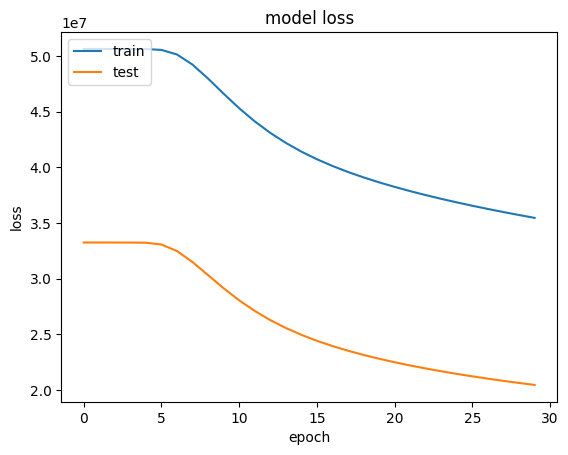

In [ ]:
#Training results
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [ ]:
import numpy as np
def extract_weights(name, model):
    weight_layer = model.get_layer(name)
    weights = weight_layer.get_weights()[0]
    weights = weights / np.linalg.norm(weights, axis = 1).reshape((-1, 1))
    return weights

movie_weights = extract_weights('movie_embedding', model)
user_weights = extract_weights('user_embedding', model)
genre_weights = extract_weights('genre_embedding', model)

In [ ]:
def getmovieFrame(movie):
    if isinstance(movie, int):
        return df_movies[df_movies.movie_id == movie]
    if isinstance(movie, str):
        return df_movies[df_movies.name == movie]

In [ ]:
cols = ["name", "genres", "description"]


def getSypnopsis(movie):
    if isinstance(movie, int):
        return df_movies[df_movies.movie_id == movie].description.values[0]
    if isinstance(movie, str):
        return df_movies[df_movies.name == movie].description.values[0]

In [ ]:
pd.set_option("max_colwidth", None)

def find_similar_movies(name, n=10, return_dist=False, neg=False):

    try:
        index = getmovieFrame(name).movie_id.values[0]

        encoded_index = movie2movie_encoded.get(index)
        weights = movie_weights

        dists = np.dot(weights, weights[encoded_index])
        sorted_dists = np.argsort(dists)

        n = n + 1

        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('movies closest to {}'.format(name))

        if return_dist:
            return dists, closest

        rindex = df_movies

        SimilarityArr = []

        for close in closest:
            decoded_id = movie_encoded2movie.get(close)
            sypnopsis = getSypnopsis(decoded_id)
            movie_frame = getmovieFrame(decoded_id)
            movie_name = movie_frame.name.values[0]
            genre = movie_frame.genres.values[0]
            similarity = dists[close]
            SimilarityArr.append({"movie_id": decoded_id, "name": movie_name,
                                  "similarity": similarity,"genre": genre,
                                  'sypnopsis': sypnopsis})

        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity", ascending=False)
        return Frame[Frame.movie_id != index].drop(['movie_id'], axis=1)


    except:
        print('{}!, Not Found in movie list'.format(name))

In [ ]:
find_similar_movies('Монстры на каникулах', n=15, neg=False)

movies closest to Монстры на каникулах


,name,similarity,genre,sypnopsis
14,Монстры на каникулах 3: Море зовёт,0.971049,Мультипликационный фильм,"Дракула вместе с семьёй и друзьями отправляется в увлекательный морской круиз. Там он знакомится с капитаном корабля – обаятельной Эрикой, однако Дракула даже не догадывается, что у его новой возлюбленной есть страшная тайна."
13,Angry Birds в кино,0.952970,Мультфильм,"На остров нелетающих птиц приплывают зеленые свинки, и доверчивые пернатые с радостью принимают их в своем городе. И только сердитый Рэд, реактивный Чак и взрывоопасный Бомб решают узнать, что же на самом деле задумали незваные гости."
12,Монстры на каникулах: Трансформания,0.951862,Мультипликационный фильм,"«Монстры на каникулах: Трансформания» (Hotel Transylvania: Transformania, 2022) — четвертая и последняя часть франшизы Hotel Transylvania, доброй и семейной мультипликационной ленты о семье вампиров. В русском озвучивании герои говорят голосами полюбившихся всем актеров: Сергей Бурунова, Антона Эльдарова, Полины Гагариной, Татьяны Шитовой и Владимира Левашёва. Режиссеры — Дженнифер Клуска и Дерек Драймон. \n\nПенсия, пенсия…. Когда становишься старым и чувствуешь, что пора отойти от дел, хочется со спокойной душой передать наследство кому-то надежному. Например, сыну или зятю. А вот Дракула не столь спокоен! Он объявляет о своем уходе от дел любимого отеля «Трансильвания», и хочет передать эстафету зятю Джонни и дочери Мэвис. Но на душе у него тяжело. Джонни не монстр. Дракула сомневается, можно ли оставить ему такое наследие. \n\nА тем временем над «Трансильванией» сгущаются тучи. Нечаянно Ван Хельсинг превращает Джонни в монстра, наведя на него Луч монстрификации. А попавшие под луч монстры: Дракула, Франкенштейн, Уэйн — превращаются в людей. Выглядит забавно и смешно, но неизвестно, чем все закончится. Ведь чтобы вернуть всё назад, нужно найти особый кристалл для Луча монстрификации. А тем временем Джонни все больше превращается в монстра — без способности чувствовать любовь и сопереживать близким. Мэвис не узнает его, и нужно спасать ситуацию…. \n\nУдастся ли героям вернуться обратно и каково это — быть монстром и человеком? Станут ли члены семьи лучше понимать друг друга? И что если ожидания невозможно оправдать?\n\nСмотрите «Монстры на каникулах: Трансформания» онлайн на «Триколор Кино и ТВ» в хорошем качестве и узнайте финал полюбившейся истории о жизни семьи вампира Дракулы и его человечного зятя."
11,Суперсемейка 2,0.949702,Мультфильм,"Суперсемейка получает всемирную известность, а с ней – множество проблем. Теперь мама Эластика участвует в телешоу, а Мистер Исключительный должен справляться с домашним хозяйством и воспитанием детей. Но на горизонте у семьи появляется новая угроза – могущественный гипнотизёр."
10,Ральф,0.948768,Мультфильм,"Тяжела жизнь компьютерного злодея: уже 30 лет Ральф рушит здания в своей игре, а ночи проводит в одиночестве на свалке, ведь с ним никто не хочет дружить. И однажды он решается на отчаянный поступок – пробраться в чужую игру за чемпионской медалью…"
9,Гарфилд,0.947031,"Комедия, Мультфильм","Жизнь кота Гарфилда кардинально меняется, когда его хозяин Джон заводит маленького щенка Оди. С этого момента кот мечтает любым способом выжить нового друга из дома. Но всё меняется, когда маленького Оди неожиданно похищают."
8,Соник в кино,0.946926,"Комедия, Боевик","Спасаясь от врагов, быстрый и непоседливый ёж по имени Соник оказывается на нашей планете. Он скрывается от людей, но однажды устраивает настолько большую проказу, что им начинает интересоваться комиссия во главе со злым изобретателем Роботником."
7,Босс-молокосос,0.946836,"Мультфильм, Семейный","Однажды Тим узнает о готовящемся заговоре, целью которого является уничтожение любви, и организовал его директор компании «Puppy Co». Но одному Тиму не по силам его остановить. Мальчику предстоит объединиться со своим «нелюбимым» братом, чтобы спасти родителей и вернуть порядок на Земле."
6,Университет монстров,0.946577,Мультфильм,"История отношений самых опытных монс

#Похожие пользователи

In [ ]:
print('> picking up random user')

ratings_per_user = data.groupby('user_id').size()
random_user = ratings_per_user.sample(1, random_state=None).index[0]
print('> user_id:', random_user)

> picking up random user
> user_id: 17081


In [ ]:
data

,user_id,movie_id,duration,user,movie,genres
107119,2350,2803,6983,2342,135,130
1408192,54492,6964,5216,51838,2632,13
15305,15917,3146,6,15633,32,203
764984,4810,1353,2631,4778,960,240
1028637,261,410,11857,261,1844,106
...,...,...,...,...,...,...
823748,72560,2842,660,67957,1112,56
98939,5796,2226,4357,5747,122,179
98885,3199,2226,1867,3186,122,179
919673,19587,5861,8100,19172,1396,240


In [ ]:
pd.set_option("max_colwidth", None)

def find_similar_users(item_input, n=10,return_dist=False, neg=False):
    try:
        index = item_input
        encoded_index = user2user_encoded.get(index) #user который data user а не user_id
        weights = user_weights

        dists = np.dot(weights, weights[encoded_index])
        sorted_dists = np.argsort(dists)

        n = n + 1

        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('> users similar to #{}'.format(item_input))

        if return_dist:
            return dists, closest

        rindex = data
        SimilarityArr = []

        for close in closest:
            similarity = dists[close]

            if isinstance(item_input, int):
                decoded_id = user_encoded2user.get(close)
                SimilarityArr.append({"similar_users": decoded_id,
                                      "similarity": similarity})
        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity",
                                                        ascending=False)

        return Frame

    except:
        print('{}!, Not Found in User list'.format(item_input))

In [ ]:
similar_users = find_similar_users(int(random_user),
                                   n=5,
                                   neg=False)


similar_users = similar_users[similar_users.similarity > 0.2]
similar_users = similar_users[similar_users.similar_users != random_user]
similar_users.head(5)

> users similar to #17081


,similar_users,similarity
4,739,0.860700
3,5532,0.854910
2,142,0.849191
1,4195,0.847822
0,2125,0.847247


In [ ]:
from wordcloud import WordCloud
from collections import defaultdict
import matplotlib.pyplot as plt

def showWordCloud(all_genres):
    genres_cloud = WordCloud(width=700, height=400,
                             background_color='white',
                             colormap='gnuplot').generate_from_frequencies(all_genres)

    plt.figure(figsize=(10,8))
    plt.imshow(genres_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

def getFavGenre(frame, plot=False):
        frame.dropna(inplace=False)
        all_genres = defaultdict(int)

        genres_list = []
        for genres in frame['genres']:
            if isinstance(genres, str):
                for genre in genres.split(','):
                    genres_list.append(genre)
                    all_genres[genre.strip()] += 1
        if plot:
            showWordCloud(all_genres)

        return genres_list
def get_user_preferences(user_id, plot=False, verbose=0):
    movies_watched_by_user = data[data.user_id==user_id]
    user_rating_percentile = np.percentile(movies_watched_by_user.duration, 75)
    movies_watched_by_user = movies_watched_by_user[movies_watched_by_user.duration >= user_rating_percentile]
    top_movies_user = (
        movies_watched_by_user.sort_values(by="duration", ascending=False)#.head(10)
        .movie_id.values
    )

    movie_df_rows = df_movies[df_movies["movie_id"].isin(top_movies_user)]
    movie_df_rows = movie_df_rows[["name", "genres"]]

    if verbose != 0:
        print("> User #{} has rated {} movies (avg. rating = {:.1f})".format(
          user_id, len(movies_watched_by_user),
          movies_watched_by_user['duration'].mean(),
        ))

        print('> preferred genres')

    if plot:
        getFavGenre(movie_df_rows, plot)

    return movie_df_rows#.eng_version.values

> User #17081 has rated 9 movies (avg. rating = 5768.7)
> preferred genres


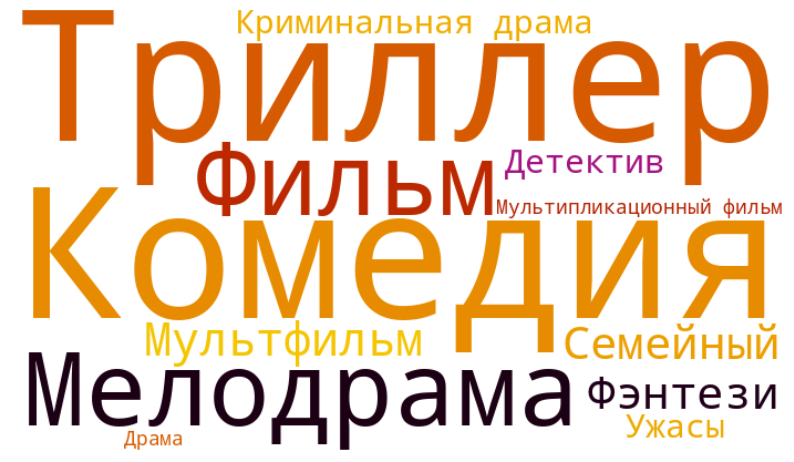

> movies highly rated by this user


,name,genres
1848,Притворись моим парнем,"Мелодрама, Комедия"
1979,Гринч - похититель Рождества,"Фильм, Комедия"
2673,Принцесса и лягушка,Мультфильм
3193,Гринч,"Фэнтези, Семейный"
3347,Круэлла,"Комедия, Криминальная драма"


In [ ]:
user_pref = get_user_preferences(random_user, plot=True, verbose=1)
print('> movies highly rated by this user')

pd.DataFrame(user_pref).head(5)

#Рекомендация фильма пользователю

In [ ]:
def get_recommended_movies(similar_users, n=20):
    recommended_movies = []
    movie_list = []

    for user_id in similar_users.similar_users.values:
        pref_list = get_user_preferences(int(user_id), verbose=0)
        pref_list = pref_list[~ pref_list.name.isin(user_pref.name.values)]
        movie_list.append(pref_list.name.values)

    movie_list = pd.DataFrame(movie_list)
    sorted_list = pd.DataFrame(pd.Series(movie_list.values.ravel()).value_counts()).head(n)

    for i, movie_name in enumerate(sorted_list.index):
        n_user_pref = sorted_list[sorted_list.index == movie_name].values[0][0]
        if isinstance(movie_name, str):
            try:
                frame = getmovieFrame(movie_name)
                movie_id = frame.movie_id.values[0]
                genre = frame.genres.values[0]
                sypnopsis = getSypnopsis(int(movie_id))
                recommended_movies.append({"movie_id": movie_id ,
                                            "n": n_user_pref,
                                            "movie_name": movie_name,
                                            "genres": genre,
                                            "sypnopsis": sypnopsis})
            except:
                pass

    return pd.DataFrame(recommended_movies)

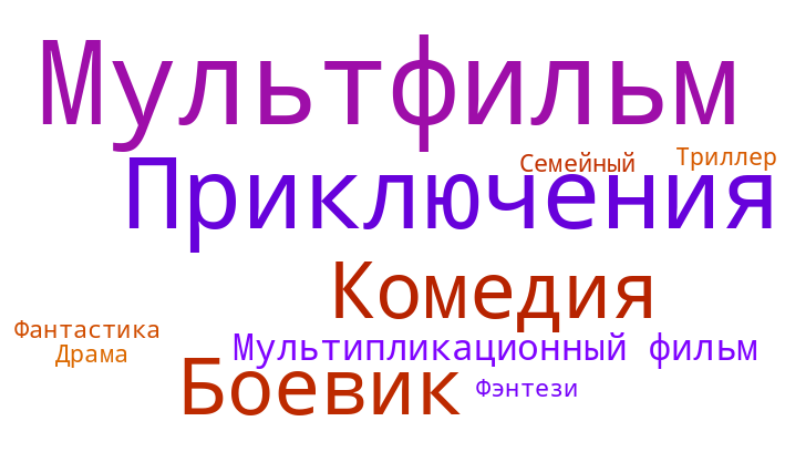


> Top recommendations for user: 17081


,movie_id,n,movie_name,genres,sypnopsis
0,4359,4,Ральф против интернета,Мультфильм,"Миру игровых автоматов грозит опасность! На этот раз Ральф и Ванилопа отправляются в интернет, чтобы там найти решение проблемы. Друзьям нужно найти важную деталь и не разрушить всю глобальную сеть."
1,5648,3,Энканто,"Мультипликационный фильм, Мультфильм","Энканто – спрятанный в горах уголок Колумбии, где живёт семья Мадригал. Здесь все обладают магическими способностями. Все, кроме девочки Мирабель, которая мечтает о волшебстве. Но скоро героине предстоит отправиться в большое приключение, чтобы спасти весь свой мир от исчезновения."
2,1098,3,Я краснею,"Комедия, Приключения","Мэй Ли 13 лет, она живёт в Торонто. Девочка разрывается между тем, чтобы оставаться прилежной и послушной дочкой и справиться с хаосом подросткового возраста. Всё осложняет особенность Мэй: всякий раз, когда девочка слишком волнуется, она тут же превращается в огромную красную панду!"
3,4319,3,Босс-молокосос,"Мультфильм, Семейный","Однажды Тим узнает о готовящемся заговоре, целью которого является уничтожение любви, и организовал его директор компании «Puppy Co». Но одному Тиму не по силам его остановить. Мальчику предстоит объединиться со своим «нелюбимым» братом, чтобы спасти родителей и вернуть порядок на Земле."
4,7173,3,Соник 2 в кино,"Комедия, Боевик","Соника ждут новые приключения! Профессор Эггман обзаводится загадочным напарником по имени Наклз, вместе с которым они ищут Изумруд, источник безграничной силы. Ежу Сонику нужно как можно быстрее добыть опасный артефакт, чтобы тот не попал в руки злого учёного."
5,3859,2,Зверопой 2,"Комедия, Приключения","В продолжении мультипликационного мюзикла нас ждёт встреча с полюбившимися персонажами. Им простоит снова преодолеть себя и поставить топовое представление под руководством театрального постановщика Бастера Муна. Звездой постановки герои хотят сделать знаменитого рокера – льва Клемма Кэллуэя, проблема только в том, что тот давно не выступает…"
6,2465,2,Один дома 2,"Комедия, Приключения","Маленький Кевин опять оказывается один, но теперь он попадает в Нью-Йорк! На все родительские деньги он планирует устроить себе отличные выходные. Но в это же время в городе оказываются жулики Гарри и Марв, сбежавшие из тюрьмы, в которой оказались именно благодаря Кевину."
7,4759,2,Малефисента: Владычица тьмы,"Приключения, Фэнтези","Свадьба Авроры и Филипа должна была помирить два мира. Но на торжественном ужине Малифисенту обвиняют в покушении на короля, и это приводит к новой войне между людьми и волшебными существами. Малифисента готова на все, чтобы снова защитить свой народ."
8,5287,2,Зверополис,Мультфильм,"Молодая крольчиха Джуди Хопс устраивается на работу в полицию огромного города Зверополиса. Она очень маленькая и милая, из-за чего никто не воспринимает её всерьёз. Джуди решает доказать свою смелость и берётся за самое сложное дело по разоблачению огромного преступного заговора!"
9,5281,2,Шан-Чи и легенда десяти колец,"Боевик, Приключения","Шан-Чи всё детство осваивал боевые искусства в армии деспотичного отца Вэнву. Герой сбежал в США, взял новое имя и скрывал своё происхождение. Но однажды Шан-Чи получает послание из прошлого, которое заставляет его вернуться на родину к тайнам своей семьи."


In [ ]:
recommended_movies = get_recommended_movies(similar_users, n=20)
getFavGenre(recommended_movies, plot=True)

print('\n> Top recommendations for user: {}'.format(random_user))
recommended_movies

In [ ]:
import os
list_users=list(set((data['user_id'].tolist())))
many_MAPs=[]
os.mkdir('output')

In [ ]:
data

,user_id,movie_id,duration,user,movie,genres
107119,2350,2803,6983,2342,135,130
1408192,54492,6964,5216,51838,2632,13
15305,15917,3146,6,15633,32,203
764984,4810,1353,2631,4778,960,240
1028637,261,410,11857,261,1844,106
...,...,...,...,...,...,...
823748,72560,2842,660,67957,1112,56
98939,5796,2226,4357,5747,122,179
98885,3199,2226,1867,3186,122,179
919673,19587,5861,8100,19172,1396,240


In [ ]:
import pandas as pd

def generate_movie_recommendations(random_user, data, df_movies, movie2movie_encoded, user2user_encoded, movie_encoded2movie, model):
    print("Показываем рекомендации для пользователя: {}".format(random_user))
    print("===" * 25)

    movie_not_watched_df = df_movies

    movie_not_watched = list(
        set(movie_not_watched_df['movie_id']).intersection(set(movie2movie_encoded.keys())))

    movie_not_watched = [[movie2movie_encoded.get(x)] for x in movie_not_watched]

    user_data = data[data['user_id'] == random_user]

    # Подсчет наиболее встречающегося жанра
    most_common_genre = user_data['genres'].mode().iloc[0]
    print('Юзер:', random_user, ' наиболее популярный жанр:', most_common_genre)

    user_encoder = user2user_encoded.get(random_user)

    user_movie_array = np.hstack(
        ([[user_encoder]] * len(movie_not_watched), movie_not_watched, [[most_common_genre]] * len(movie_not_watched))
    )

    user_movie_array = [user_movie_array[:, 0], user_movie_array[:, 1], user_movie_array[:, 2]]
    ratings = model.predict(user_movie_array).flatten()
    top_ratings_indices = (-ratings).argsort()[:20]

    recommended_movie_ids = [
        movie_encoded2movie.get(movie_not_watched[x][0]) for x in top_ratings_indices
    ]

    Results = []
    top_rated_ids = []

    for index, movie_id in enumerate(movie_not_watched):
        rating = ratings[index]
        id_ = movie_encoded2movie.get(movie_id[0])

        if id_ in recommended_movie_ids:
            top_rated_ids.append(id_)
            try:
                condition = (df_movies.movie_id == id_)
                name = df_movies[condition].name.values[0]
                movie_id = id_
                genre = df_movies[condition].genres.values[0]
                sypnopsis = getSypnopsis(int(id_))
            except:
                continue

            Results.append({
                "movie_id": movie_id,
                "name": name,
                "pred_rating": rating,
                "genre": genre
            })

    Results = pd.DataFrame(Results).sort_values(by='pred_rating', ascending=False)

    predict = pd.DataFrame({
        "users": [random_user],
        # "movies": [Results['movie_id'].tolist()]
        "movies": [Results['movie_id'].map(movie2movie_encoded).tolist()]
    })
    predict.to_csv('output/result.csv', index=False)


In [ ]:
train_users = X_train_array[0].tolist()
train_movies = X_train_array[1].tolist()

split_train_1 = pd.DataFrame({
    'user_id': train_users,
    'movie_id': train_movies
})

split_train_1

,user_id,movie_id
0,2342,135
1,51838,2632
2,15633,32
3,4778,960
4,261,1844
...,...,...
1651519,127853,1823
1651520,30249,53
1651521,14215,2893
1651522,888,2100


In [ ]:
test_users = X_test_array[0].tolist()
test_movies = X_test_array[1].tolist()

split_train_2 = pd.DataFrame({
    'user_id': test_users,
    'movie_id': test_movies
})

split_train_2

,user_id,movie_id
0,3445,619
1,276,137
2,6787,794
3,118479,1838
4,24217,717
...,...,...
495,67957,1112
496,5747,122
497,3186,122
498,19172,1396


In [ ]:
split_train_2.to_csv('split_train_2.csv', index=False)
split_train_1.to_csv('split_train_1.csv', index=False)

In [ ]:
data

,user_id,movie_id,duration,user,movie,genres
107119,2350,2803,6983,2342,135,130
1408192,54492,6964,5216,51838,2632,13
15305,15917,3146,6,15633,32,203
764984,4810,1353,2631,4778,960,240
1028637,261,410,11857,261,1844,106
...,...,...,...,...,...,...
823748,72560,2842,660,67957,1112,56
98939,5796,2226,4357,5747,122,179
98885,3199,2226,1867,3186,122,179
919673,19587,5861,8100,19172,1396,240


In [ ]:
data[data['user_id']==261725]

,user_id,movie_id,duration,user,movie,genres
397112,261725,4812,1211,205975,453,180


In [ ]:
encoded_values = list(X_test_array[0].tolist())
list_users = [user_encoded2user[encoded_value] for encoded_value in encoded_values]

In [ ]:
list_users[:2]

[3459, 276]

#MAP из скрипта

In [ ]:
import pandas as pd
import json

PREDICT_FILE: str = "output/result.csv"  # файл с предсказаниями рекомендаций
TEST_LOG_FILE: str = "split_train_2.csv"  # файл с тестовой выборкой
TRAIN_LOG_FILE: str = "split_train_1.csv"  # файл с обучающей выборкой
LIMIT_ROW: int = 0  # лимит проверенных строчек

def check_user_predict_data(row: pd.Series) -> float:
    number_predict: int = 1
    tp: int = 1
    user_result: int = 0

    row['users'] = user2user_encoded.get(row['users'])

    train_log_movies: list = list(
        train_logs_df[
            train_logs_df['user_id'] == row['users']
        ]['movie_id'].values
    )

    test_logs_movies: list = list(
        test_logs_df[
            test_logs_df['user_id'] == row['users']
        ]['movie_id'].values
    )
    predict_movies = ast.literal_eval(row['movies'])
    # predict_movies = list(map(movie2movie_encoded.get, predict_movies))
    print('Рекомендованный фильмы:', predict_movies)


    # print(train_log_movies)
    # print(test_logs_movies)


    for predict_movie in predict_movies:
        if predict_movie in test_logs_movies and predict_movie:
            if predict_movie not in train_log_movies:
                user_result += tp / number_predict
                tp += 1
        number_predict += 1
    return user_result / len(predict_movies)


if __name__ == '__main__':
    print('START calculate')
    many_MAPs = []
    predict_df_final = pd.DataFrame()
    for ind, user in enumerate(list_users):
        print(f'Обработка {ind + 1} из {len(list_users)}')
        generate_movie_recommendations(user, data, df_movies, movie2movie_encoded, user2user_encoded,
                                       movie_encoded2movie, model)
        predict_df: pd.DataFrame = pd.read_csv(
            PREDICT_FILE)
        train_logs_df: pd.DataFrame = pd.read_csv(TRAIN_LOG_FILE)
        test_logs_df: pd.DataFrame = pd.read_csv(TEST_LOG_FILE)

        user_num: int = 0
        list_result: list = []
        index: int
        predict_row: pd.Series
        for index, predict_row in predict_df.iterrows():
            user_num += 1
            if user_num > LIMIT_ROW and LIMIT_ROW:
                break

            list_result.append(check_user_predict_data(predict_row))

        # Добавление результата для текущего пользователя
        result_mectic_value: float = sum(list_result) / len(train_logs_df['user_id'].value_counts())
        many_MAPs.append(result_mectic_value)

        # Добавление строки с предсказаниями для текущего пользователя в итоговый датафрейм
        # predict_row['users'] = user_encoded2user[predict_row['users']]
        predict_df_final = predict_df_final.append(predict_row, ignore_index=True)

        # print('FINISH calculate')
        print(f'RESULT for {user}: {round(result_mectic_value, 8)}')
        result_mectic_value = 0

    # Сохранение итогового датафрейма с предсказаниями для всех пользователей
    predict_df_final.to_csv('output/result.csv', index=False)

    print(many_MAPs)
    print(sum(many_MAPs) / len(many_MAPs))

START calculate
Обработка 1 из 500
Показываем рекомендации для пользователя: 3459
Юзер: 3459  наиболее популярный жанр: 25
166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1858, 601, 1018, 2220, 1999, 702, 2052, 625, 1434, 794, 1982, 2158, 704, 645, 502, 806]
RESULT for 3459: 0.0
Обработка 2 из 500
Показываем рекомендации для пользователя: 276
Юзер: 276  наиболее популярный жанр: 183
 58/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 794, 1890, 1018, 601, 1999, 806, 577, 702, 1878, 1858, 2052, 673, 2220, 516, 535, 2158, 625, 446]
RESULT for 276: 0.0
Обработка 3 из 500
Показываем рекомендации для пользователя: 6844
Юзер: 6844  наиболее популярный жанр: 183
 55/166 [========>.....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 601, 1018, 1858, 702, 1999, 2220, 794, 2052, 625, 1434, 2158, 516, 1982, 704, 806, 1878]
RESULT for 6844: 2e-08
Обработка 4 из 500
Показываем рекомендации для пользователя: 134362
Юзер: 134362  наиболее популярный жанр: 77
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [3507, 334, 2637, 732, 200, 2191, 306, 2590, 1911, 2506, 1602, 1717, 2575, 285, 180, 2443, 1084, 2274, 2582, 2353]
RESULT for 134362: 0.0
Обработка 5 из 500
Показываем рекомендации для пользователя: 24829
Юзер: 24829  наиболее популярный жанр: 25
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1858, 1890, 577, 1018, 601, 2052, 2220, 1999, 702, 625, 1434, 1982, 502, 704, 806, 645, 2158, 1878]
RESULT for 24829: 0.0
Обработка 6 из 500
Показываем рекомендации для пользователя: 5271
Юзер: 5271  наиболее популярный жанр: 106
 22/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 601, 1018, 1858, 2220, 1434, 2052, 1999, 702, 1982, 794, 625, 806, 704, 2158, 502, 673]
RESULT for 5271: 0.0
Обработка 7 из 500
Показываем рекомендации для пользователя: 86577
Юзер: 86577  наиболее популярный жанр: 179
 23/166 [===>..........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 794, 205, 1878, 516, 1890, 446, 1018, 1929, 438, 2214, 2167, 577, 564, 705, 154, 137, 806, 673, 2052]
RESULT for 86577: 0.0
Обработка 8 из 500
Показываем рекомендации для пользователя: 1539
Юзер: 1539  наиболее популярный жанр: 91
 20/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1018, 601, 1858, 2220, 702, 1999, 2052, 794, 1434, 625, 1982, 704, 806, 2158, 1878, 535]
RESULT for 1539: 0.0
Обработка 9 из 500
Показываем рекомендации для пользователя: 10701
Юзер: 10701  наиболее популярный жанр: 106
 63/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 601, 1018, 794, 1858, 702, 2052, 1999, 1878, 2220, 2158, 1982, 516, 625, 806, 705, 673]
RESULT for 10701: 0.0
Обработка 10 из 500
Показываем рекомендации для пользователя: 102513
Юзер: 102513  наиболее популярный жанр: 103
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [205, 87, 1434, 1890, 1982, 1018, 2220, 1980, 601, 789, 1858, 1999, 625, 369, 570, 336, 2186, 1861, 2928, 260]
RESULT for 102513: 0.0
Обработка 11 из 500
Показываем рекомендации для пользователя: 23257
Юзер: 23257  наиболее популярный жанр: 169
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 516, 577, 794, 1018, 1929, 1434, 2052, 705, 205, 601, 1878, 780, 2214, 645, 438, 673, 806, 2158, 1890]
RESULT for 23257: 0.0
Обработка 12 из 500
Показываем рекомендации для пользователя: 38773
Юзер: 38773  наиболее популярный жанр: 91
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 577, 1858, 2220, 1434, 601, 702, 1018, 704, 1999, 2052, 625, 1982, 794, 502, 1980, 645, 104]
RESULT for 38773: 0.0
Обработка 13 из 500
Показываем рекомендации для пользователя: 77490
Юзер: 77490  наиболее популярный жанр: 30
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [1889, 732, 112, 1391, 53, 872, 901, 2082, 200, 576, 532, 536, 487, 1887, 432, 593, 425, 1857, 643, 647]
RESULT for 77490: 0.0
Обработка 14 из 500
Показываем рекомендации для пользователя: 1432
Юзер: 1432  наиболее популярный жанр: 183
 65/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 794, 1890, 577, 1018, 601, 702, 806, 1878, 1999, 1858, 516, 2052, 673, 2220, 705, 2158, 2167, 535]
RESULT for 1432: 0.0
Обработка 15 из 500
Показываем рекомендации для пользователя: 27954
Юзер: 27954  наиболее популярный жанр: 183
 56/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 1018, 1999, 601, 577, 2220, 1434, 1858, 2052, 702, 794, 806, 1982, 704, 502, 2158, 535, 625]
RESULT for 27954: 0.0
Обработка 16 из 500
Показываем рекомендации для пользователя: 10952
Юзер: 10952  наиболее популярный жанр: 280
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 1889, 1391, 112, 2082, 901, 1381, 593, 200, 536, 532, 1857, 425, 1886, 732, 432, 135, 2355, 618, 2209]
RESULT for 10952: 0.0
Обработка 17 из 500
Показываем рекомендации для пользователя: 3321
Юзер: 3321  наиболее популярный жанр: 76
 57/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 112, 1889, 1391, 536, 1381, 2082, 901, 532, 425, 200, 559, 1304, 487, 1857, 593, 135, 641, 1886, 643]
RESULT for 3321: 0.0
Обработка 18 из 500
Показываем рекомендации для пользователя: 1418
Юзер: 1418  наиболее популярный жанр: 76
 54/166 [========>.....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 112, 1889, 1391, 2082, 901, 200, 532, 536, 1381, 593, 1857, 425, 1886, 135, 432, 559, 2148, 1304, 2355]
RESULT for 1418: 0.0
Обработка 19 из 500
Показываем рекомендации для пользователя: 34531
Юзер: 34531  наиболее популярный жанр: 103
 63/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1434, 2220, 577, 1890, 601, 1999, 1858, 1018, 2052, 1982, 794, 806, 702, 535, 638, 625, 704, 789]
RESULT for 34531: 0.0
Обработка 20 из 500
Показываем рекомендации для пользователя: 21326


<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


Юзер: 21326  наиболее популярный жанр: 183
166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1018, 577, 1858, 2220, 1890, 601, 702, 1999, 2052, 794, 2158, 625, 1434, 502, 645, 1982, 806, 704]
RESULT for 21326: 0.0
Обработка 21 из 500
Показываем рекомендации для пользователя: 55
Юзер: 55  наиболее популярный жанр: 179
 19/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 601, 2220, 1858, 1018, 1890, 794, 702, 1999, 1434, 2052, 625, 2158, 516, 1982, 1878, 704, 806]
RESULT for 55: 0.0
Обработка 22 из 500
Показываем рекомендации для пользователя: 8135
Юзер: 8135  наиболее популярный жанр: 25
 24/166 [===>..........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1018, 1858, 601, 1999, 2220, 702, 2052, 1982, 625, 1434, 704, 2158, 502, 794, 645, 535]
RESULT for 8135: 0.0
Обработка 23 из 500
Показываем рекомендации для пользователя: 111349
Юзер: 111349  наиболее популярный жанр: 106
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [673, 789, 516, 87, 625, 806, 794, 705, 1434, 1905, 577, 1877, 703, 704, 738, 2167, 601, 104, 2256, 1999]
RESULT for 111349: 0.0
Обработка 24 из 500
Показываем рекомендации для пользователя: 14971
Юзер: 14971  наиболее популярный жанр: 25
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 2220, 1858, 577, 1018, 1434, 601, 702, 502, 1890, 1999, 625, 704, 1982, 2052, 645, 1980, 891, 2158]
RESULT for 14971: 0.0
Обработка 25 из 500
Показываем рекомендации для пользователя: 35688
Юзер: 35688  наиболее популярный жанр: 125
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [1889, 53, 112, 1391, 1381, 901, 2082, 532, 200, 536, 1857, 425, 593, 135, 1886, 576, 1887, 559, 618, 2221]
RESULT for 35688: 0.0
Обработка 26 из 500
Показываем рекомендации для пользователя: 14645
Юзер: 14645  наиболее популярный жанр: 131
 64/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 112, 1889, 1391, 2082, 901, 536, 200, 1381, 532, 425, 1857, 593, 1886, 559, 135, 1304, 618, 2221, 29]
RESULT for 14645: 0.0
Обработка 27 из 500
Показываем рекомендации для пользователя: 163389
Юзер: 163389  наиболее популярный жанр: 146
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 901, 1889, 1886, 532, 2589, 370, 1887, 2082, 112, 1857, 1391, 207, 732, 484, 180, 1379, 406, 559, 659]
RESULT for 163389: 0.0
Обработка 28 из 500
Показываем рекомендации для пользователя: 1707
Юзер: 1707  наиболее популярный жанр: 183
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1018, 1890, 577, 601, 794, 702, 1999, 2052, 1858, 1878, 2220, 516, 625, 806, 2158, 535, 673, 1982]
RESULT for 1707: 0.0
Обработка 29 из 500
Показываем рекомендации для пользователя: 30914
Юзер: 30914  наиболее популярный жанр: 91
 63/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1858, 2220, 1890, 577, 601, 1018, 1999, 702, 1434, 2052, 625, 704, 1982, 502, 2158, 645, 794, 1861]
RESULT for 30914: 0.0
Обработка 30 из 500
Показываем рекомендации для пользователя: 14685
Юзер: 14685  наиболее популярный жанр: 240
 63/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1858, 2220, 577, 1018, 502, 1890, 601, 645, 702, 625, 1999, 1434, 2158, 794, 2052, 1982, 1980, 1878]
RESULT for 14685: 0.0
Обработка 31 из 500
Показываем рекомендации для пользователя: 3558
Юзер: 3558  наиболее популярный жанр: 183
 64/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 577, 1018, 794, 601, 702, 673, 2052, 1999, 1878, 625, 806, 516, 1858, 705, 438, 2158, 789]
RESULT for 3558: 0.0
Обработка 32 из 500
Показываем рекомендации для пользователя: 1214
Юзер: 1214  наиболее популярный жанр: 183
 65/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 794, 577, 601, 1018, 1890, 702, 1878, 2052, 1999, 516, 806, 673, 1858, 2220, 2158, 535, 705, 625]
RESULT for 1214: 0.0
Обработка 33 из 500
Показываем рекомендации для пользователя: 3264
Юзер: 3264  наиболее популярный жанр: 240
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1858, 1890, 1018, 2220, 601, 702, 1999, 2052, 1434, 625, 502, 704, 2158, 794, 1982, 645, 1980]
RESULT for 3264: 0.0
Обработка 34 из 500
Показываем рекомендации для пользователя: 242956
Юзер: 242956  наиболее популярный жанр: 283
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [2251, 622, 1396, 2051, 2379, 404, 478, 2220, 1046, 1201, 2197, 1895, 252, 104, 2186, 1000, 502, 645, 2470, 1186]
RESULT for 242956: 0.0
Обработка 35 из 500
Показываем рекомендации для пользователя: 18003
Юзер: 18003  наиболее популярный жанр: 65


<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 1s 5ms/step
Рекомендованный фильмы: [87, 205, 2220, 1018, 1890, 1858, 577, 601, 702, 1999, 1434, 2052, 625, 2158, 502, 704, 1982, 794, 1980, 535]
RESULT for 18003: 0.0
Обработка 36 из 500
Показываем рекомендации для пользователя: 27385
Юзер: 27385  наиболее популярный жанр: 103
 19/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [1434, 87, 577, 2052, 1999, 2220, 205, 1890, 891, 1982, 1858, 1018, 702, 1980, 2063, 601, 502, 2158, 704, 622]
RESULT for 27385: 0.0
Обработка 37 из 500
Показываем рекомендации для пользователя: 88
Юзер: 88  наиболее популярный жанр: 25
 67/166 [===========>..................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 577, 1999, 1018, 601, 1858, 2052, 2220, 702, 625, 1434, 2158, 1982, 502, 794, 645, 704, 806]
RESULT for 88: 0.0
Обработка 38 из 500
Показываем рекомендации для пользователя: 37985
Юзер: 37985  наиболее популярный жанр: 240
 64/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1858, 601, 1018, 702, 2220, 1999, 794, 645, 1434, 1982, 2052, 625, 502, 2158, 704, 535]
RESULT for 37985: 0.0
Обработка 39 из 500
Показываем рекомендации для пользователя: 23810
Юзер: 23810  наиболее популярный жанр: 276
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 112, 1889, 1391, 901, 2082, 200, 532, 1857, 593, 1381, 536, 1886, 618, 559, 576, 432, 425, 135, 1369]
RESULT for 23810: 0.0
Обработка 40 из 500
Показываем рекомендации для пользователя: 154177
Юзер: 154177  наиболее популярный жанр: 183
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [732, 286, 200, 1889, 2355, 901, 2082, 345, 532, 1886, 2807, 210, 317, 536, 641, 98, 3084, 125, 2050, 1170]
RESULT for 154177: 0.0
Обработка 41 из 500
Показываем рекомендации для пользователя: 71620
Юзер: 71620  наиболее популярный жанр: 183
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 702, 2220, 1018, 577, 673, 794, 601, 806, 1999, 1434, 2052, 154, 535, 1858, 789, 704, 625, 502]
RESULT for 71620: 0.0
Обработка 42 из 500
Показываем рекомендации для пользователя: 70524
Юзер: 70524  наиболее популярный жанр: 25
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 2220, 1018, 1890, 1858, 601, 1434, 794, 702, 2052, 1982, 1999, 2158, 625, 645, 516, 535, 1878]
RESULT for 70524: 0.0
Обработка 43 из 500
Показываем рекомендации для пользователя: 1368
Юзер: 1368  наиболее популярный жанр: 91
 58/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 1858, 577, 2220, 601, 1018, 702, 1434, 1999, 2052, 625, 1982, 704, 502, 2158, 1980, 794, 806]
RESULT for 1368: 0.0
Обработка 44 из 500
Показываем рекомендации для пользователя: 131306
Юзер: 131306  наиболее популярный жанр: 101
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 1391, 2082, 593, 536, 1889, 1857, 112, 559, 1887, 792, 2355, 98, 200, 425, 1886, 1170, 487, 432, 901]
RESULT for 131306: 0.0
Обработка 45 из 500
Показываем рекомендации для пользователя: 6120
Юзер: 6120  наиболее популярный жанр: 240
 63/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 1858, 577, 601, 2220, 1018, 702, 625, 1999, 1434, 2052, 1982, 502, 704, 645, 1980, 191, 2063]
RESULT for 6120: 0.0
Обработка 46 из 500
Показываем рекомендации для пользователя: 53452
Юзер: 53452  наиболее популярный жанр: 63
 65/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 1391, 1889, 536, 901, 112, 732, 487, 647, 2082, 532, 1304, 576, 425, 200, 643, 98, 641, 1857, 593]
RESULT for 53452: 0.0
Обработка 47 из 500
Показываем рекомендации для пользователя: 7558
Юзер: 7558  наиболее популярный жанр: 91
 64/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1858, 1890, 1018, 601, 2220, 702, 1999, 2052, 1434, 1982, 2158, 625, 704, 794, 502, 806, 645]
RESULT for 7558: 0.0
Обработка 48 из 500
Показываем рекомендации для пользователя: 1917
Юзер: 1917  наиболее популярный жанр: 91
 16/166 [=>............................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 601, 1858, 2220, 1018, 702, 1999, 2052, 1434, 625, 1982, 704, 502, 794, 2158, 645, 535]
RESULT for 1917: 0.0
Обработка 49 из 500
Показываем рекомендации для пользователя: 9490
Юзер: 9490  наиболее популярный жанр: 91
 21/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [87, 205, 794, 577, 1434, 601, 1018, 1890, 1878, 516, 702, 2052, 1858, 2220, 806, 1999, 673, 2158, 625, 705]
RESULT for 9490: 0.0
Обработка 50 из 500
Показываем рекомендации для пользователя: 8288
Юзер: 8288  наиболее популярный жанр: 91
 21/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1858, 1018, 2220, 1890, 601, 702, 1999, 2052, 1434, 704, 794, 625, 1982, 2158, 502, 645, 806]
RESULT for 8288: 0.0
Обработка 51 из 500
Показываем рекомендации для пользователя: 7616
Юзер: 7616  наиболее популярный жанр: 209
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 112, 1391, 1889, 536, 1381, 2082, 532, 901, 200, 425, 559, 487, 593, 1304, 1857, 641, 1886, 29, 135]
RESULT for 7616: 0.0
Обработка 52 из 500
Показываем рекомендации для пользователя: 77910
Юзер: 77910  наиболее популярный жанр: 257
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 1391, 112, 593, 2355, 200, 2397, 1857, 1889, 2082, 1170, 1381, 1886, 901, 2209, 160, 246, 828, 532, 2499]
RESULT for 77910: 0.0
Обработка 53 из 500
Показываем рекомендации для пользователя: 46272
Юзер: 46272  наиболее популярный жанр: 80
 63/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 2220, 1858, 577, 1890, 1999, 1018, 702, 601, 2052, 1434, 502, 1982, 625, 645, 704, 1980, 794, 2063]
RESULT for 46272: 0.0
Обработка 54 из 500
Показываем рекомендации для пользователя: 197672
Юзер: 197672  наиболее популярный жанр: 0
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [576, 180, 532, 1369, 1517, 487, 286, 618, 2221, 112, 643, 775, 2143, 2222, 2148, 525, 569, 406, 872, 2785]
RESULT for 197672: 0.0
Обработка 55 из 500
Показываем рекомендации для пользователя: 3145
Юзер: 3145  наиболее популярный жанр: 179
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1858, 601, 1018, 1999, 2220, 702, 2052, 794, 2158, 1434, 625, 1982, 806, 535, 704, 502]
RESULT for 3145: 0.0
Обработка 56 из 500
Показываем рекомендации для пользователя: 47323
Юзер: 47323  наиболее популярный жанр: 13
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 1889, 1391, 112, 2082, 1381, 532, 901, 200, 536, 593, 1886, 425, 1857, 432, 2209, 2355, 135, 1170, 1887]
RESULT for 47323: 0.0
Обработка 57 из 500
Показываем рекомендации для пользователя: 4721
Юзер: 4721  наиболее популярный жанр: 183
 63/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1018, 794, 601, 1890, 1999, 1858, 2052, 702, 806, 1878, 673, 2220, 516, 2158, 705, 535, 625]
RESULT for 4721: 0.0
Обработка 58 из 500
Показываем рекомендации для пользователя: 8084
Юзер: 8084  наиболее популярный жанр: 183
 57/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 794, 1890, 577, 1018, 601, 1878, 516, 702, 2052, 1999, 673, 806, 1858, 705, 2158, 2220, 446, 535]
RESULT for 8084: 0.0
Обработка 59 из 500
Показываем рекомендации для пользователя: 2238
Юзер: 2238  наиболее популярный жанр: 25
 65/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 2220, 1018, 1890, 1858, 601, 1434, 702, 1999, 2052, 1982, 502, 625, 794, 2158, 645, 704, 535]
RESULT for 2238: 0.0
Обработка 60 из 500
Показываем рекомендации для пользователя: 22244
Юзер: 22244  наиболее популярный жанр: 203
 63/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [112, 251, 536, 53, 274, 332, 1889, 1391, 487, 641, 378, 322, 296, 643, 532, 425, 32, 98, 1304, 647]
RESULT for 22244: 0.0
Обработка 61 из 500
Показываем рекомендации для пользователя: 2052
Юзер: 2052  наиболее популярный жанр: 183
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 794, 1890, 1018, 577, 601, 702, 1999, 1878, 2052, 1858, 2220, 2158, 806, 516, 673, 2167, 625, 535]
RESULT for 2052: 0.0
Обработка 62 из 500
Показываем рекомендации для пользователя: 35351
Юзер: 35351  наиболее популярный жанр: 103
 21/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1434, 1890, 794, 2220, 1858, 1018, 601, 516, 1999, 2052, 2158, 705, 625, 1982, 702, 1878, 645]
RESULT for 35351: 0.0
Обработка 63 из 500
Показываем рекомендации для пользователя: 83787
Юзер: 83787  наиболее популярный жанр: 78
 20/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [87, 1018, 205, 1890, 1434, 2052, 577, 2190, 601, 2158, 2220, 1878, 1982, 1858, 1980, 891, 645, 516, 241, 1999]
RESULT for 83787: 0.0
Обработка 64 из 500
Показываем рекомендации для пользователя: 22225
Юзер: 22225  наиболее популярный жанр: 281
 63/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 702, 1890, 2052, 1999, 1982, 625, 1018, 601, 2220, 1858, 645, 2158, 1434, 961, 535, 794, 806]
RESULT for 22225: 0.0
Обработка 65 из 500
Показываем рекомендации для пользователя: 24337
Юзер: 24337  наиболее популярный жанр: 240


<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1858, 1890, 577, 1018, 2220, 601, 702, 1999, 2052, 625, 1434, 1982, 704, 2158, 502, 645, 794, 2190]
RESULT for 24337: 0.0
Обработка 66 из 500
Показываем рекомендации для пользователя: 20809
Юзер: 20809  наиболее популярный жанр: 240
 57/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 1018, 577, 2220, 601, 702, 1999, 1858, 2052, 1434, 794, 2158, 625, 502, 645, 1982, 704, 535]
RESULT for 20809: 3e-08
Обработка 67 из 500
Показываем рекомендации для пользователя: 34827
Юзер: 34827  наиболее популярный жанр: 91
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 2220, 577, 1434, 1890, 1858, 601, 702, 1999, 1018, 2052, 502, 1982, 625, 704, 645, 2158, 191, 473]
RESULT for 34827: 0.0
Обработка 68 из 500
Показываем рекомендации для пользователя: 3993
Юзер: 3993  наиболее популярный жанр: 183
 58/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 794, 577, 1018, 1890, 601, 702, 1878, 2052, 2220, 1858, 1999, 516, 806, 673, 2158, 705, 438, 446]
RESULT for 3993: 0.0
Обработка 69 из 500
Показываем рекомендации для пользователя: 1016
Юзер: 1016  наиболее популярный жанр: 183
 64/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1018, 1890, 577, 601, 794, 1999, 2052, 702, 1858, 1878, 806, 2220, 516, 625, 2158, 673, 705, 1982]
RESULT for 1016: 0.0
Обработка 70 из 500
Показываем рекомендации для пользователя: 20256
Юзер: 20256  наиболее популярный жанр: 91
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 2220, 1890, 702, 1018, 601, 1858, 1999, 2052, 625, 1434, 1982, 794, 704, 2158, 502, 1878, 806]
RESULT for 20256: 0.0
Обработка 71 из 500
Показываем рекомендации для пользователя: 129460
Юзер: 129460  наиболее популярный жанр: 97
 65/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 1889, 1391, 536, 593, 732, 901, 1381, 2082, 112, 2355, 1886, 643, 432, 1857, 285, 425, 559, 2148, 1170]
RESULT for 129460: 0.0
Обработка 72 из 500
Показываем рекомендации для пользователя: 48808
Юзер: 48808  наиболее популярный жанр: 91
 58/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1858, 577, 1890, 601, 702, 1434, 2220, 1018, 1999, 704, 625, 2052, 1982, 502, 2158, 794, 473, 961]
RESULT for 48808: 0.0
Обработка 73 из 500
Показываем рекомендации для пользователя: 73081
Юзер: 73081  наиболее популярный жанр: 141
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [1381, 593, 1903, 559, 2082, 53, 1886, 1391, 2499, 432, 792, 569, 710, 618, 212, 1889, 200, 112, 1857, 1083]
RESULT for 73081: 0.0
Обработка 74 из 500
Показываем рекомендации для пользователя: 12707
Юзер: 12707  наиболее популярный жанр: 25
 54/166 [========>.....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 601, 2220, 1858, 1018, 702, 1999, 1434, 2052, 794, 625, 1982, 704, 2158, 645, 502, 535]
RESULT for 12707: 0.0
Обработка 75 из 500
Показываем рекомендации для пользователя: 75507
Юзер: 75507  наиболее популярный жанр: 25
 43/166 [======>.......................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [87, 205, 1434, 1890, 577, 2220, 1858, 601, 1018, 702, 1999, 1982, 625, 794, 2052, 502, 645, 2158, 704, 2190]
RESULT for 75507: 0.0
Обработка 76 из 500
Показываем рекомендации для пользователя: 34060
Юзер: 34060  наиболее популярный жанр: 106


<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 1s 5ms/step
Рекомендованный фильмы: [87, 205, 577, 2220, 1858, 1018, 601, 1890, 1999, 702, 2052, 1434, 625, 502, 2158, 1982, 704, 794, 645, 535]
RESULT for 34060: 0.0
Обработка 77 из 500
Показываем рекомендации для пользователя: 20285
Юзер: 20285  наиболее популярный жанр: 203
 33/166 [====>.........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 112, 1391, 1889, 536, 1381, 200, 425, 901, 487, 2082, 532, 1304, 643, 2221, 559, 576, 98, 29, 647]
RESULT for 20285: 0.0
Обработка 78 из 500
Показываем рекомендации для пользователя: 23480
Юзер: 23480  наиболее популярный жанр: 25
 63/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 1999, 577, 1018, 601, 2220, 1858, 2052, 702, 1982, 1434, 625, 794, 704, 2158, 535, 806, 645]
RESULT for 23480: 0.0
Обработка 79 из 500
Показываем рекомендации для пользователя: 68966
Юзер: 68966  наиболее популярный жанр: 25
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 1018, 601, 1999, 702, 577, 2052, 1858, 2220, 625, 1434, 704, 2158, 794, 645, 535, 806, 1982]
RESULT for 68966: 0.0
Обработка 80 из 500
Показываем рекомендации для пользователя: 19911
Юзер: 19911  наиболее популярный жанр: 63
 64/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 1889, 1391, 112, 2082, 901, 200, 1381, 532, 593, 1886, 1857, 536, 425, 432, 2355, 2397, 559, 828, 1170]
RESULT for 19911: 0.0
Обработка 81 из 500
Показываем рекомендации для пользователя: 63146
Юзер: 63146  наиболее популярный жанр: 65
 58/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1858, 2220, 1018, 577, 1434, 601, 1999, 1890, 502, 2063, 2052, 2099, 704, 625, 702, 1980, 1982, 891]
RESULT for 63146: 0.0
Обработка 82 из 500
Показываем рекомендации для пользователя: 108219
Юзер: 108219  наиболее популярный жанр: 183
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [341, 205, 358, 704, 87, 308, 1999, 2052, 1980, 1018, 625, 1890, 2220, 702, 601, 2158, 798, 473, 1858, 806]
RESULT for 108219: 0.0
Обработка 83 из 500
Показываем рекомендации для пользователя: 14258
Юзер: 14258  наиболее популярный жанр: 183
 57/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1018, 2220, 601, 1858, 1999, 2052, 702, 625, 794, 2158, 1434, 1982, 704, 502, 806, 535]
RESULT for 14258: 0.0
Обработка 84 из 500
Показываем рекомендации для пользователя: 95455
Юзер: 95455  наиболее популярный жанр: 106
 65/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 2220, 1858, 1434, 1999, 1018, 601, 702, 2052, 704, 625, 191, 1982, 1980, 104, 502, 891]
RESULT for 95455: 2e-08
Обработка 85 из 500
Показываем рекомендации для пользователя: 279
Юзер: 279  наиболее популярный жанр: 183
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 794, 1890, 577, 1018, 1878, 601, 516, 702, 806, 2052, 673, 1999, 705, 2158, 1858, 2220, 438, 446]
RESULT for 279: 6e-08
Обработка 86 из 500
Показываем рекомендации для пользователя: 8828
Юзер: 8828  наиболее популярный жанр: 183
 64/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1018, 1890, 601, 577, 702, 1999, 794, 1858, 2052, 2220, 2158, 625, 516, 535, 1878, 806, 1982, 704]
RESULT for 8828: 0.0
Обработка 87 из 500
Показываем рекомендации для пользователя: 10200
Юзер: 10200  наиболее популярный жанр: 25
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 577, 1018, 601, 702, 1999, 1858, 2052, 2220, 794, 2158, 1982, 806, 625, 704, 1878, 516, 673]
RESULT for 10200: 0.0
Обработка 88 из 500
Показываем рекомендации для пользователя: 16713
Юзер: 16713  наиболее популярный жанр: 106
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 601, 1858, 1999, 1018, 2220, 702, 2052, 625, 1434, 1982, 794, 2158, 704, 645, 806, 535]
RESULT for 16713: 0.0
Обработка 89 из 500
Показываем рекомендации для пользователя: 149630
Юзер: 149630  наиболее популярный жанр: 91
 23/166 [===>..........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [112, 258, 370, 593, 284, 1369, 406, 628, 114, 1083, 1889, 538, 532, 1886, 42, 425, 3084, 484, 647, 1391]
RESULT for 149630: 0.0
Обработка 90 из 500
Показываем рекомендации для пользователя: 3813
Юзер: 3813  наиболее популярный жанр: 183
 18/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 601, 1999, 2052, 702, 1890, 794, 1878, 673, 1018, 806, 1858, 516, 625, 705, 2158, 438, 535]
RESULT for 3813: 0.0
Обработка 91 из 500
Показываем рекомендации для пользователя: 12007
Юзер: 12007  наиболее популярный жанр: 25
 64/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 1018, 577, 1999, 2052, 1858, 601, 2220, 702, 1982, 794, 2158, 625, 704, 806, 1434, 502, 535]
RESULT for 12007: 0.0
Обработка 92 из 500
Показываем рекомендации для пользователя: 4363
Юзер: 4363  наиболее популярный жанр: 209
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 112, 1889, 1391, 2082, 1381, 901, 200, 532, 536, 425, 1857, 593, 1886, 135, 559, 432, 2221, 29, 618]
RESULT for 4363: 0.0
Обработка 93 из 500
Показываем рекомендации для пользователя: 421
Юзер: 421  наиболее популярный жанр: 183
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1018, 601, 702, 794, 1999, 1858, 2052, 2220, 1878, 625, 516, 2158, 1434, 806, 1982, 535]
RESULT for 421: 0.0
Обработка 94 из 500
Показываем рекомендации для пользователя: 5507
Юзер: 5507  наиболее популярный жанр: 13
 63/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 1889, 1391, 112, 2082, 901, 1381, 532, 200, 536, 1857, 593, 1886, 425, 2209, 135, 1170, 2148, 432, 559]
RESULT for 5507: 0.0
Обработка 95 из 500
Показываем рекомендации для пользователя: 29
Юзер: 29  наиболее популярный жанр: 25
  1/166 [..............................] - ETA: 11s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 577, 1018, 601, 2052, 1999, 2220, 702, 1858, 794, 2158, 806, 625, 1982, 704, 1878, 1434, 673]
RESULT for 29: 0.0
Обработка 96 из 500
Показываем рекомендации для пользователя: 17628
Юзер: 17628  наиболее популярный жанр: 25
 57/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 577, 1858, 601, 1018, 2220, 702, 1434, 1999, 625, 794, 1982, 704, 2052, 2158, 502, 645, 806]
RESULT for 17628: 0.0
Обработка 97 из 500
Показываем рекомендации для пользователя: 8442
Юзер: 8442  наиболее популярный жанр: 183
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 794, 577, 1878, 601, 1890, 516, 1018, 702, 806, 673, 705, 1999, 1858, 438, 446, 2052, 2220, 154]
RESULT for 8442: 0.0
Обработка 98 из 500
Показываем рекомендации для пользователя: 88309
Юзер: 88309  наиболее популярный жанр: 228
 63/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 1999, 1890, 1018, 2052, 205, 2220, 625, 1982, 601, 702, 704, 1858, 577, 478, 2174, 629, 2158, 2190, 622]
RESULT for 88309: 0.0
Обработка 99 из 500
Показываем рекомендации для пользователя: 25760
Юзер: 25760  наиболее популярный жанр: 209
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 1889, 901, 112, 2082, 532, 1391, 593, 1886, 1857, 1381, 200, 2397, 432, 2209, 160, 1369, 828, 2355, 135]
RESULT for 25760: 0.0
Обработка 100 из 500
Показываем рекомендации для пользователя: 7115
Юзер: 7115  наиболее популярный жанр: 25
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 1018, 601, 1858, 577, 794, 1999, 702, 2052, 2220, 625, 2158, 704, 1434, 1878, 806, 535, 1982]
RESULT for 7115: 6e-08
Обработка 101 из 500
Показываем рекомендации для пользователя: 62902
Юзер: 62902  наиболее популярный жанр: 76
 17/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [1889, 53, 112, 1391, 1381, 2082, 732, 200, 593, 901, 432, 1886, 1170, 2209, 160, 532, 180, 2355, 536, 2397]
RESULT for 62902: 0.0
Обработка 102 из 500
Показываем рекомендации для пользователя: 19864
Юзер: 19864  наиболее популярный жанр: 25


<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 1s 5ms/step
Рекомендованный фильмы: [87, 1434, 205, 2220, 1858, 577, 1890, 702, 601, 1999, 1018, 1982, 502, 704, 625, 2052, 1980, 191, 794, 2190]
RESULT for 19864: 0.0
Обработка 103 из 500
Показываем рекомендации для пользователя: 367
Юзер: 367  наиболее популярный жанр: 119


<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 1s 3ms/step
Рекомендованный фильмы: [112, 53, 1391, 536, 1889, 487, 425, 1304, 1381, 2082, 641, 532, 643, 901, 200, 29, 647, 559, 98, 135]
RESULT for 367: 0.0
Обработка 104 из 500
Показываем рекомендации для пользователя: 18516
Юзер: 18516  наиболее популярный жанр: 91
  1/166 [..............................] - ETA: 4s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1858, 1890, 2220, 577, 1018, 601, 1999, 702, 1434, 2052, 502, 704, 625, 1982, 2158, 645, 794, 1980]
RESULT for 18516: 0.0
Обработка 105 из 500
Показываем рекомендации для пользователя: 3200
Юзер: 3200  наиболее популярный жанр: 25
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1434, 1890, 601, 625, 577, 1018, 1982, 702, 1858, 1999, 502, 2052, 2220, 704, 645, 794, 2158, 191]
RESULT for 3200: 0.0
Обработка 106 из 500
Показываем рекомендации для пользователя: 727
Юзер: 727  наиболее популярный жанр: 179
 19/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 794, 1890, 1878, 577, 601, 1018, 806, 673, 516, 702, 2052, 705, 154, 446, 438, 1858, 1999, 2158]
RESULT for 727: 0.0
Обработка 107 из 500
Показываем рекомендации для пользователя: 108964


<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


Юзер: 108964  наиболее популярный жанр: 63
166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [2214, 564, 154, 804, 369, 2052, 789, 2177, 780, 438, 558, 2186, 1137, 738, 1890, 638, 127, 577, 705, 108]
RESULT for 108964: 0.0
Обработка 108 из 500
Показываем рекомендации для пользователя: 2739
Юзер: 2739  наиболее популярный жанр: 240
 18/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1018, 601, 2220, 1858, 702, 1999, 2052, 794, 625, 1434, 1982, 2158, 645, 502, 535, 1878]
RESULT for 2739: 0.0
Обработка 109 из 500
Показываем рекомендации для пользователя: 4164
Юзер: 4164  наиболее популярный жанр: 183
  1/166 [..............................] - ETA: 11s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 1s 3ms/step
Рекомендованный фильмы: [87, 205, 794, 577, 1018, 1890, 601, 1878, 702, 516, 1999, 2052, 1858, 2220, 535, 806, 446, 705, 2158, 2167]
RESULT for 4164: 0.0
Обработка 110 из 500
Показываем рекомендации для пользователя: 18229
Юзер: 18229  наиболее популярный жанр: 183
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 794, 1878, 1890, 1018, 577, 601, 516, 705, 702, 2220, 1858, 438, 1999, 2167, 2052, 789, 1929, 673]
RESULT for 18229: 0.0
Обработка 111 из 500
Показываем рекомендации для пользователя: 1557
Юзер: 1557  наиболее популярный жанр: 91
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1018, 2220, 1858, 601, 1999, 702, 2052, 625, 794, 1434, 1982, 704, 2158, 502, 645, 806]
RESULT for 1557: 0.0
Обработка 112 из 500
Показываем рекомендации для пользователя: 2724
Юзер: 2724  наиболее популярный жанр: 25
 22/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1018, 1858, 2220, 601, 702, 1999, 1434, 2052, 1982, 625, 794, 704, 2158, 502, 806, 645]
RESULT for 2724: 0.0
Обработка 113 из 500
Показываем рекомендации для пользователя: 1460
Юзер: 1460  наиболее популярный жанр: 179
 20/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 794, 577, 1890, 1018, 1878, 601, 673, 438, 2052, 516, 806, 702, 1999, 705, 2220, 1858, 446, 2167]
RESULT for 1460: 0.0
Обработка 114 из 500
Показываем рекомендации для пользователя: 11947
Юзер: 11947  наиболее популярный жанр: 180
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [1391, 53, 112, 536, 1889, 425, 1381, 641, 200, 487, 2082, 532, 1304, 29, 559, 98, 593, 643, 901, 1886]
RESULT for 11947: 1e-08
Обработка 115 из 500
Показываем рекомендации для пользователя: 2340
Юзер: 2340  наиболее популярный жанр: 0
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 112, 1391, 1889, 536, 2082, 1381, 425, 901, 532, 1304, 200, 487, 641, 29, 593, 643, 559, 98, 1857]
RESULT for 2340: 0.0
Обработка 116 из 500
Показываем рекомендации для пользователя: 62469
Юзер: 62469  наиболее популярный жанр: 103
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1858, 2220, 577, 601, 1890, 1018, 702, 1434, 625, 1999, 2052, 502, 1980, 1248, 369, 1861, 1982, 891]
RESULT for 62469: 0.0
Обработка 117 из 500
Показываем рекомендации для пользователя: 130879
Юзер: 130879  наиболее популярный жанр: 29
 64/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [341, 1402, 358, 2353, 1022, 1236, 983, 593, 2623, 3223, 2213, 2491, 2901, 212, 2025, 221, 1104, 435, 559, 792]
RESULT for 130879: 0.0
Обработка 118 из 500
Показываем рекомендации для пользователя: 2293
Юзер: 2293  наиболее популярный жанр: 240
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1858, 2220, 1890, 577, 1018, 1434, 601, 702, 1999, 625, 502, 2052, 1982, 704, 645, 2158, 794, 1980]
RESULT for 2293: 0.0
Обработка 119 из 500
Показываем рекомендации для пользователя: 9053
Юзер: 9053  наиболее популярный жанр: 183
 65/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 794, 577, 601, 1878, 1890, 702, 1018, 1434, 516, 1858, 2052, 806, 705, 2158, 1999, 2220, 789, 673]
RESULT for 9053: 0.0
Обработка 120 из 500
Показываем рекомендации для пользователя: 3743
Юзер: 3743  наиболее популярный жанр: 183
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 794, 1878, 516, 673, 1890, 705, 1018, 806, 601, 577, 438, 702, 2052, 446, 1999, 1929, 2167, 1858]
RESULT for 3743: 0.0
Обработка 121 из 500
Показываем рекомендации для пользователя: 30612
Юзер: 30612  наиболее популярный жанр: 203
 57/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [332, 378, 32, 281, 322, 295, 274, 251, 296, 112, 536, 1391, 53, 643, 487, 98, 576, 641, 1304, 425]
RESULT for 30612: 0.0
Обработка 122 из 500
Показываем рекомендации для пользователя: 77372
Юзер: 77372  наиболее популярный жанр: 91
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [1434, 87, 205, 2220, 1858, 1890, 601, 577, 794, 1018, 502, 702, 1878, 806, 645, 891, 704, 516, 625, 1999]
RESULT for 77372: 0.0
Обработка 123 из 500
Показываем рекомендации для пользователя: 20963
Юзер: 20963  наиболее популярный жанр: 63
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 112, 1391, 1889, 2082, 1381, 536, 901, 200, 532, 425, 593, 1857, 1886, 135, 559, 1304, 487, 641, 2148]
RESULT for 20963: 0.0
Обработка 124 из 500
Показываем рекомендации для пользователя: 24913
Юзер: 24913  наиболее популярный жанр: 203
 58/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [536, 112, 53, 1391, 1889, 487, 641, 1381, 378, 643, 1304, 200, 425, 29, 98, 332, 2082, 532, 274, 322]
RESULT for 24913: 0.0
Обработка 125 из 500
Показываем рекомендации для пользователя: 4411
Юзер: 4411  наиболее популярный жанр: 25
 56/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1858, 601, 702, 2220, 1999, 1018, 1434, 625, 2052, 1982, 502, 704, 2158, 645, 794, 535]
RESULT for 4411: 0.0
Обработка 126 из 500
Показываем рекомендации для пользователя: 3888
Юзер: 3888  наиболее популярный жанр: 183
 45/166 [=======>......................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1018, 601, 2220, 1858, 1999, 702, 1434, 2052, 794, 625, 2158, 1982, 704, 502, 806, 645]
RESULT for 3888: 0.0
Обработка 127 из 500
Показываем рекомендации для пользователя: 38758
Юзер: 38758  наиболее популярный жанр: 240
 20/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [87, 205, 577, 2220, 601, 1858, 1018, 1890, 702, 1999, 1434, 625, 2052, 502, 1982, 645, 2158, 794, 704, 2190]
RESULT for 38758: 0.0
Обработка 128 из 500
Показываем рекомендации для пользователя: 18157
Юзер: 18157  наиболее популярный жанр: 257
 20/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [53, 1889, 1391, 112, 536, 2082, 1381, 200, 532, 901, 425, 1857, 593, 1886, 487, 135, 1304, 559, 641, 647]
RESULT for 18157: 0.0
Обработка 129 из 500
Показываем рекомендации для пользователя: 12006
Юзер: 12006  наиболее популярный жанр: 91
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [87, 205, 1890, 1858, 601, 577, 1018, 702, 2220, 1999, 625, 2052, 502, 1982, 794, 1434, 704, 2158, 191, 645]
RESULT for 12006: 0.0
Обработка 130 из 500
Показываем рекомендации для пользователя: 43411
Юзер: 43411  наиболее популярный жанр: 84


<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 1s 5ms/step
Рекомендованный фильмы: [53, 112, 1391, 1889, 1381, 2082, 901, 532, 536, 200, 425, 1857, 593, 1886, 135, 487, 2148, 1304, 559, 618]
RESULT for 43411: 0.0
Обработка 131 из 500
Показываем рекомендации для пользователя: 1510
Юзер: 1510  наиболее популярный жанр: 209
 63/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 112, 1889, 1391, 536, 2082, 901, 1381, 532, 425, 200, 593, 559, 1857, 487, 1886, 135, 1304, 29, 2221]
RESULT for 1510: 0.0
Обработка 132 из 500
Показываем рекомендации для пользователя: 111063
Юзер: 111063  наиболее популярный жанр: 84
 54/166 [========>.....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 406, 2082, 901, 1391, 532, 1889, 1886, 1381, 432, 112, 2397, 1857, 2355, 593, 618, 200, 559, 2209, 258]
RESULT for 111063: 0.0
Обработка 133 из 500
Показываем рекомендации для пользователя: 12555
Юзер: 12555  наиболее популярный жанр: 25
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1999, 1858, 601, 1018, 2220, 2052, 702, 625, 1982, 2158, 704, 1434, 794, 535, 502, 806]
RESULT for 12555: 0.0
Обработка 134 из 500
Показываем рекомендации для пользователя: 140529
Юзер: 140529  наиболее популярный жанр: 91
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [32, 345, 286, 332, 617, 1250, 281, 295, 312, 274, 1488, 53, 251, 2644, 1434, 370, 262, 630, 2687, 340]
RESULT for 140529: 0.0
Обработка 135 из 500
Показываем рекомендации для пользователя: 1084
Юзер: 1084  наиболее популярный жанр: 183
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 794, 1878, 1890, 601, 1018, 577, 516, 702, 806, 673, 705, 2052, 1999, 1858, 446, 2158, 2220, 789]
RESULT for 1084: 0.0
Обработка 136 из 500
Показываем рекомендации для пользователя: 57816
Юзер: 57816  наиболее популярный жанр: 103
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1018, 2158, 1434, 1858, 2220, 1890, 516, 806, 446, 1999, 535, 2052, 673, 502, 1982, 625, 1929, 104]
RESULT for 57816: 0.0
Обработка 137 из 500
Показываем рекомендации для пользователя: 59165
Юзер: 59165  наиболее популярный жанр: 269
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 1391, 112, 1381, 200, 536, 2082, 532, 1889, 901, 487, 425, 1857, 641, 29, 180, 1369, 593, 1304, 643]
RESULT for 59165: 0.0
Обработка 138 из 500
Показываем рекомендации для пользователя: 19357
Юзер: 19357  наиболее популярный жанр: 25
 23/166 [===>..........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1018, 1999, 702, 601, 2220, 2052, 1858, 625, 2158, 794, 1982, 535, 806, 704, 645, 502]
RESULT for 19357: 3e-08
Обработка 139 из 500
Показываем рекомендации для пользователя: 24582
Юзер: 24582  наиболее популярный жанр: 119
 23/166 [===>..........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [53, 112, 1889, 1391, 901, 2082, 536, 532, 1381, 200, 425, 1857, 559, 1304, 135, 593, 1886, 2148, 487, 618]
RESULT for 24582: 0.0
Обработка 140 из 500
Показываем рекомендации для пользователя: 261924
Юзер: 261924  наиболее популярный жанр: 91


<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [1581, 412, 1434, 1787, 369, 260, 336, 1392, 378, 1795, 332, 284, 281, 295, 2195, 1064, 32, 1940, 891, 1488]
RESULT for 261924: 0.0
Обработка 141 из 500
Показываем рекомендации для пользователя: 97031
Юзер: 97031  наиболее популярный жанр: 192
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [4924, 4921, 4450, 308, 358, 3710, 4891, 4367, 3750, 4889, 341, 2680, 1942, 5081, 340, 283, 4925, 257, 247, 3745]
RESULT for 97031: 0.0
Обработка 142 из 500
Показываем рекомендации для пользователя: 2788
Юзер: 2788  наиболее популярный жанр: 183
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 794, 1878, 1890, 516, 577, 1018, 601, 702, 806, 673, 705, 446, 1999, 2052, 438, 1858, 1434, 1929]
RESULT for 2788: 0.0
Обработка 143 из 500
Показываем рекомендации для пользователя: 110516
Юзер: 110516  наиболее популярный жанр: 29
 58/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [406, 1811, 559, 1002, 2774, 3157, 453, 3084, 641, 114, 210, 657, 718, 346, 595, 3740, 1317, 1519, 591, 2111]
RESULT for 110516: 0.0
Обработка 144 из 500
Показываем рекомендации для пользователя: 49534
Юзер: 49534  наиболее популярный жанр: 276
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 112, 1889, 1391, 536, 425, 532, 901, 1381, 2082, 487, 1304, 200, 29, 559, 643, 641, 593, 1857, 98]
RESULT for 49534: 0.0
Обработка 145 из 500
Показываем рекомендации для пользователя: 11264
Юзер: 11264  наиболее популярный жанр: 13
 63/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 1889, 112, 1391, 901, 2082, 1381, 532, 200, 593, 1857, 536, 1886, 425, 559, 2355, 135, 1170, 2209, 2397]
RESULT for 11264: 0.0
Обработка 146 из 500
Показываем рекомендации для пользователя: 52041
Юзер: 52041  наиболее популярный жанр: 240
 51/166 [========>.....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1858, 577, 2220, 1018, 601, 702, 1890, 1999, 2052, 502, 704, 645, 1982, 1434, 2158, 2099, 625, 191]
RESULT for 52041: 0.0
Обработка 147 из 500
Показываем рекомендации для пользователя: 1971
Юзер: 1971  наиболее популярный жанр: 91
 56/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1018, 1890, 601, 1858, 1999, 2220, 2052, 702, 502, 625, 1982, 1434, 645, 2158, 704, 535, 1980]
RESULT for 1971: 0.0
Обработка 148 из 500
Показываем рекомендации для пользователя: 68852
Юзер: 68852  наиболее популярный жанр: 76
 63/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [112, 53, 536, 1391, 1889, 1304, 532, 643, 1381, 425, 487, 2082, 641, 200, 559, 29, 901, 681, 618, 1857]
RESULT for 68852: 0.0
Обработка 149 из 500
Показываем рекомендации для пользователя: 62664
Юзер: 62664  наиболее популярный жанр: 203
 66/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [378, 322, 32, 332, 281, 295, 274, 296, 251, 536, 487, 643, 370, 2774, 641, 468, 532, 1945, 490, 194]
RESULT for 62664: 4e-08
Обработка 150 из 500
Показываем рекомендации для пользователя: 531
Юзер: 531  наиболее популярный жанр: 179
 57/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1018, 601, 702, 1999, 2220, 2052, 1858, 794, 2158, 625, 1982, 1434, 535, 645, 704, 1878]
RESULT for 531: 1e-08
Обработка 151 из 500
Показываем рекомендации для пользователя: 135776
Юзер: 135776  наиболее популярный жанр: 278
 63/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [345, 332, 1696, 2794, 2623, 2355, 285, 536, 978, 643, 785, 3314, 1191, 1304, 2807, 2774, 993, 2272, 160, 1637]
RESULT for 135776: 0.0
Обработка 152 из 500
Показываем рекомендации для пользователя: 5125
Юзер: 5125  наиболее популярный жанр: 106
 23/166 [===>..........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [87, 205, 1890, 577, 1858, 1018, 601, 702, 2220, 1999, 2052, 625, 1982, 704, 794, 2158, 1434, 502, 645, 806]
RESULT for 5125: 0.0
Обработка 153 из 500
Показываем рекомендации для пользователя: 39450
Юзер: 39450  наиболее популярный жанр: 146
 19/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1434, 1018, 601, 2220, 1858, 1999, 2052, 702, 794, 2158, 516, 625, 1878, 704, 1982, 806]
RESULT for 39450: 0.0
Обработка 154 из 500
Показываем рекомендации для пользователя: 26776
Юзер: 26776  наиболее популярный жанр: 65
 52/166 [========>.....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 577, 205, 1999, 601, 702, 2220, 1890, 2052, 704, 1018, 1858, 2190, 625, 1982, 1434, 794, 2158, 535, 191]
RESULT for 26776: 0.0
Обработка 155 из 500
Показываем рекомендации для пользователя: 6598
Юзер: 6598  наиболее популярный жанр: 25
 56/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 1858, 2220, 1018, 601, 625, 1999, 577, 702, 1982, 2052, 704, 502, 1434, 1980, 2158, 191, 478]
RESULT for 6598: 2e-08
Обработка 156 из 500
Показываем рекомендации для пользователя: 4006
Юзер: 4006  наиболее популярный жанр: 106
 54/166 [========>.....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 601, 1018, 2220, 1858, 702, 1999, 2052, 625, 794, 1982, 1434, 704, 2158, 535, 502, 645]
RESULT for 4006: 0.0
Обработка 157 из 500
Показываем рекомендации для пользователя: 15614
Юзер: 15614  наиболее популярный жанр: 25
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 577, 1018, 702, 1858, 601, 2220, 1999, 2052, 625, 1982, 1434, 704, 794, 2158, 806, 502, 1980]
RESULT for 15614: 0.0
Обработка 158 из 500
Показываем рекомендации для пользователя: 4365
Юзер: 4365  наиболее популярный жанр: 209
 58/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 112, 1889, 1391, 1381, 2082, 536, 200, 901, 532, 425, 1857, 593, 559, 135, 1886, 29, 1304, 487, 618]
RESULT for 4365: 0.0
Обработка 159 из 500
Показываем рекомендации для пользователя: 7827
Юзер: 7827  наиболее популярный жанр: 149
 56/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 2220, 1434, 1858, 1890, 601, 1018, 702, 1999, 2052, 625, 502, 704, 1982, 794, 2158, 2190, 535]
RESULT for 7827: 0.0
Обработка 160 из 500
Показываем рекомендации для пользователя: 57834
Юзер: 57834  наиболее популярный жанр: 183
 55/166 [========>.....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 2052, 806, 205, 1999, 577, 673, 601, 1890, 702, 1018, 2158, 535, 1858, 704, 705, 516, 794, 1982, 789]
RESULT for 57834: 0.0
Обработка 161 из 500
Показываем рекомендации для пользователя: 38083
Юзер: 38083  наиболее популярный жанр: 103
 55/166 [========>.....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 1858, 702, 577, 1018, 2220, 601, 2052, 1999, 1982, 704, 1980, 260, 1434, 2190, 2099, 625, 645]
RESULT for 38083: 0.0
Обработка 162 из 500
Показываем рекомендации для пользователя: 8927
Юзер: 8927  наиболее популярный жанр: 251


<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 112, 1391, 1889, 536, 2082, 901, 1381, 532, 200, 425, 487, 593, 1857, 559, 1304, 135, 1886, 29, 576]
RESULT for 8927: 0.0
Обработка 163 из 500
Показываем рекомендации для пользователя: 998
Юзер: 998  наиболее популярный жанр: 257
 63/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 1391, 112, 1889, 901, 2082, 532, 1381, 200, 536, 1857, 593, 425, 1886, 135, 559, 1170, 2209, 2355, 432]
RESULT for 998: 0.0
Обработка 164 из 500
Показываем рекомендации для пользователя: 66
Юзер: 66  наиболее популярный жанр: 179
 21/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [87, 205, 1890, 577, 1018, 601, 1999, 794, 702, 2052, 1858, 2220, 2158, 1434, 625, 1878, 806, 1982, 516, 535]
RESULT for 66: 0.0
Обработка 165 из 500
Показываем рекомендации для пользователя: 13032
Юзер: 13032  наиболее популярный жанр: 25
 22/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1858, 601, 1018, 2220, 702, 1999, 2052, 625, 1434, 794, 1982, 704, 2158, 645, 502, 806]
RESULT for 13032: 0.0
Обработка 166 из 500
Показываем рекомендации для пользователя: 37089
Юзер: 37089  наиболее популярный жанр: 91
 19/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 1434, 205, 2052, 2220, 1858, 577, 1018, 601, 794, 1890, 1999, 704, 191, 1982, 446, 702, 1878, 260, 2190]
RESULT for 37089: 0.0
Обработка 167 из 500
Показываем рекомендации для пользователя: 6070
Юзер: 6070  наиболее популярный жанр: 131
 63/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 1391, 112, 1889, 536, 2082, 1381, 901, 532, 425, 200, 593, 1857, 487, 559, 1304, 135, 1886, 647, 576]
RESULT for 6070: 0.0
Обработка 168 из 500
Показываем рекомендации для пользователя: 6594
Юзер: 6594  наиболее популярный жанр: 183
 55/166 [========>.....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 794, 1018, 601, 2052, 1999, 516, 702, 1878, 1858, 2220, 806, 2158, 705, 673, 625, 1982]
RESULT for 6594: 0.0
Обработка 169 из 500
Показываем рекомендации для пользователя: 70365
Юзер: 70365  наиболее популярный жанр: 25
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1858, 1018, 702, 2220, 1890, 601, 1999, 1434, 2052, 502, 794, 625, 2158, 891, 191, 535, 473]
RESULT for 70365: 0.0
Обработка 170 из 500
Показываем рекомендации для пользователя: 648
Юзер: 648  наиболее популярный жанр: 240
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 577, 1858, 2220, 601, 1018, 702, 1999, 1434, 2052, 1982, 625, 502, 704, 2158, 645, 794, 1980]
RESULT for 648: 0.0
Обработка 171 из 500
Показываем рекомендации для пользователя: 16732
Юзер: 16732  наиболее популярный жанр: 91
 58/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 2220, 1890, 702, 1018, 601, 1858, 1434, 1999, 1982, 2052, 502, 625, 645, 704, 794, 2158, 535]
RESULT for 16732: 4e-08
Обработка 172 из 500
Показываем рекомендации для пользователя: 229046
Юзер: 229046  наиболее популярный жанр: 279
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [212, 406, 3710, 260, 3613, 374, 507, 295, 322, 24, 1826, 2204, 785, 2218, 735, 4188, 2786, 1718, 1083, 2928]
RESULT for 229046: 0.0
Обработка 173 из 500
Показываем рекомендации для пользователя: 2077
Юзер: 2077  наиболее популярный жанр: 25
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1858, 577, 1890, 1018, 2220, 601, 1999, 702, 2052, 1434, 625, 1982, 502, 704, 2158, 794, 645, 1980]
RESULT for 2077: 0.0
Обработка 174 из 500
Показываем рекомендации для пользователя: 9151
Юзер: 9151  наиболее популярный жанр: 76
 58/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 112, 536, 1391, 1889, 487, 1304, 425, 643, 641, 1381, 98, 2082, 647, 532, 901, 29, 200, 576, 559]
RESULT for 9151: 0.0
Обработка 175 из 500
Показываем рекомендации для пользователя: 40100
Юзер: 40100  наиболее популярный жанр: 103
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 104, 516, 1929, 2063, 2220, 1018, 205, 577, 705, 1858, 2043, 502, 1434, 500, 564, 673, 2167, 446, 794]
RESULT for 40100: 0.0
Обработка 176 из 500
Показываем рекомендации для пользователя: 147
Юзер: 147  наиболее популярный жанр: 179
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1018, 1858, 601, 794, 2220, 702, 2052, 1999, 806, 1878, 516, 625, 673, 1434, 705, 1982]
RESULT for 147: 0.0
Обработка 177 из 500
Показываем рекомендации для пользователя: 16564
Юзер: 16564  наиболее популярный жанр: 91
 55/166 [========>.....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 2220, 601, 702, 1434, 1018, 1858, 1999, 2052, 704, 794, 2158, 1982, 625, 502, 535, 645]
RESULT for 16564: 0.0
Обработка 178 из 500
Показываем рекомендации для пользователя: 37972
Юзер: 37972  наиболее популярный жанр: 25
 56/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1858, 577, 1018, 2220, 601, 1890, 1999, 702, 2052, 2158, 1434, 794, 704, 625, 502, 1982, 516, 806]
RESULT for 37972: 0.0
Обработка 179 из 500
Показываем рекомендации для пользователя: 15116
Юзер: 15116  наиболее популярный жанр: 25
 21/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 2220, 1858, 601, 1890, 1018, 702, 1999, 1434, 625, 2052, 794, 1982, 704, 645, 2158, 516, 535]
RESULT for 15116: 0.0
Обработка 180 из 500
Показываем рекомендации для пользователя: 76009
Юзер: 76009  наиболее популярный жанр: 203
 22/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [536, 641, 112, 53, 1391, 487, 1304, 425, 1889, 98, 194, 532, 643, 468, 29, 1381, 559, 647, 543, 1870]
RESULT for 76009: 0.0
Обработка 181 из 500
Показываем рекомендации для пользователя: 22300
Юзер: 22300  наиболее популярный жанр: 103
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1434, 601, 1858, 2220, 1890, 1018, 1999, 2052, 702, 1982, 704, 645, 502, 794, 2158, 625, 891]
RESULT for 22300: 0.0
Обработка 182 из 500
Показываем рекомендации для пользователя: 79016
Юзер: 79016  наиболее популярный жанр: 91
 63/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [1434, 87, 2220, 577, 1858, 205, 1018, 891, 601, 104, 1890, 1982, 502, 2063, 704, 2052, 1861, 961, 1980, 2099]
RESULT for 79016: 0.0
Обработка 183 из 500
Показываем рекомендации для пользователя: 125849
Юзер: 125849  наиболее популярный жанр: 166
 52/166 [========>.....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 112, 1391, 1889, 901, 532, 200, 2082, 1381, 593, 536, 1857, 1886, 425, 2209, 432, 618, 1170, 135, 1887]
RESULT for 125849: 0.0
Обработка 184 из 500
Показываем рекомендации для пользователя: 107209
Юзер: 107209  наиболее популярный жанр: 116
 63/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 2220, 702, 601, 794, 1434, 806, 1858, 1878, 673, 2052, 1999, 1890, 1018, 446, 2158, 1982, 438]
RESULT for 107209: 0.0
Обработка 185 из 500
Показываем рекомендации для пользователя: 26446
Юзер: 26446  наиболее популярный жанр: 280
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [1391, 53, 112, 1889, 536, 901, 2082, 200, 1381, 425, 532, 593, 1304, 1857, 641, 576, 559, 98, 487, 647]
RESULT for 26446: 0.0
Обработка 186 из 500
Показываем рекомендации для пользователя: 28801
Юзер: 28801  наиболее популярный жанр: 103
 57/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 601, 1018, 1858, 2052, 702, 2220, 794, 1999, 1434, 1982, 625, 2158, 704, 1878, 705, 806]
RESULT for 28801: 0.0
Обработка 187 из 500
Показываем рекомендации для пользователя: 100395
Юзер: 100395  наиболее популярный жанр: 80
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 2158, 205, 577, 1890, 2220, 502, 601, 1999, 2167, 1858, 794, 704, 645, 2052, 702, 1878, 535, 446, 241]
RESULT for 100395: 0.0
Обработка 188 из 500
Показываем рекомендации для пользователя: 46863
Юзер: 46863  наиболее популярный жанр: 65
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 702, 601, 1999, 1890, 1858, 1018, 2220, 2052, 2158, 625, 1434, 1982, 502, 1980, 704, 794, 535]
RESULT for 46863: 0.0
Обработка 189 из 500
Показываем рекомендации для пользователя: 42032
Юзер: 42032  наиболее популярный жанр: 51
 63/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 112, 1889, 1391, 901, 2082, 200, 532, 1381, 1886, 593, 536, 1857, 2355, 432, 2397, 1170, 2209, 135, 425]
RESULT for 42032: 0.0
Обработка 190 из 500
Показываем рекомендации для пользователя: 5863
Юзер: 5863  наиболее популярный жанр: 91
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 2220, 1858, 577, 601, 1018, 702, 1999, 2052, 1434, 625, 704, 1982, 502, 2158, 794, 1980, 2190]
RESULT for 5863: 2.4e-07
Обработка 191 из 500
Показываем рекомендации для пользователя: 7101
Юзер: 7101  наиболее популярный жанр: 251
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 1391, 112, 1889, 901, 2082, 1381, 536, 200, 532, 1857, 593, 425, 1886, 135, 1170, 432, 559, 1304, 2148]
RESULT for 7101: 0.0
Обработка 192 из 500
Показываем рекомендации для пользователя: 99272
Юзер: 99272  наиболее популярный жанр: 192
 20/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [3711, 341, 358, 260, 499, 257, 350, 3057, 4367, 3750, 108, 205, 1137, 473, 383, 1456, 446, 1854, 336, 1434]
RESULT for 99272: 0.0
Обработка 193 из 500
Показываем рекомендации для пользователя: 14362
Юзер: 14362  наиболее популярный жанр: 25
 19/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 1858, 2220, 577, 1018, 601, 702, 1999, 1434, 2052, 1982, 625, 704, 502, 1980, 2158, 794, 2190]
RESULT for 14362: 0.0
Обработка 194 из 500
Показываем рекомендации для пользователя: 133000
Юзер: 133000  наиболее популярный жанр: 13
 20/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 1889, 112, 1391, 732, 901, 200, 536, 532, 2082, 593, 432, 1304, 643, 1369, 1886, 487, 1381, 559, 2355]
RESULT for 133000: 0.0
Обработка 195 из 500
Показываем рекомендации для пользователя: 7582
Юзер: 7582  наиболее популярный жанр: 183
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1018, 601, 1858, 702, 1999, 2220, 2052, 794, 625, 2158, 1982, 704, 535, 516, 806, 1878]
RESULT for 7582: 0.0
Обработка 196 из 500
Показываем рекомендации для пользователя: 42318
Юзер: 42318  наиболее популярный жанр: 91
 63/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [104, 87, 577, 205, 502, 1018, 1858, 1890, 601, 2220, 1999, 369, 2052, 2063, 516, 806, 2158, 625, 1980, 702]
RESULT for 42318: 0.0
Обработка 197 из 500
Показываем рекомендации для пользователя: 3021
Юзер: 3021  наиболее популярный жанр: 106
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1018, 1890, 601, 1999, 1858, 794, 2052, 702, 2220, 806, 2158, 516, 1878, 625, 673, 704, 535]
RESULT for 3021: 1e-08
Обработка 198 из 500
Показываем рекомендации для пользователя: 60817
Юзер: 60817  наиболее популярный жанр: 91
 64/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 1858, 205, 2220, 577, 1434, 702, 1018, 1890, 601, 1878, 645, 1999, 2052, 806, 794, 502, 625, 704, 891]
RESULT for 60817: 0.0
Обработка 199 из 500
Показываем рекомендации для пользователя: 155558
Юзер: 155558  наиболее популярный жанр: 33
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 180, 1369, 112, 29, 1938, 432, 569, 643, 427, 2148, 681, 617, 1896, 88, 732, 1889, 1381, 1083, 200]
RESULT for 155558: 0.0
Обработка 200 из 500
Показываем рекомендации для пользователя: 5704
Юзер: 5704  наиболее популярный жанр: 25
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 2220, 1018, 702, 1858, 601, 1999, 2052, 1434, 1982, 625, 794, 645, 2158, 502, 704, 1878]
RESULT for 5704: 0.0
Обработка 201 из 500
Показываем рекомендации для пользователя: 43247
Юзер: 43247  наиболее популярный жанр: 30
 55/166 [========>.....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 1391, 112, 1889, 536, 532, 200, 901, 1381, 2082, 487, 425, 732, 593, 1304, 1857, 647, 641, 98, 559]
RESULT for 43247: 0.0
Обработка 202 из 500
Показываем рекомендации для пользователя: 44837
Юзер: 44837  наиболее популярный жанр: 276
 54/166 [========>.....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 1391, 1889, 112, 1381, 532, 2082, 901, 536, 200, 593, 1886, 425, 1857, 2355, 1170, 559, 432, 2397, 828]
RESULT for 44837: 0.0
Обработка 203 из 500
Показываем рекомендации для пользователя: 6515
Юзер: 6515  наиболее популярный жанр: 183
 56/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1018, 601, 794, 1858, 2220, 702, 1999, 2052, 1434, 516, 1878, 1982, 535, 806, 2158, 625]
RESULT for 6515: 0.0
Обработка 204 из 500
Показываем рекомендации для пользователя: 21365
Юзер: 21365  наиболее популярный жанр: 25
 58/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1018, 2220, 1858, 601, 702, 1999, 625, 2052, 1982, 704, 794, 2158, 502, 673, 1434, 2190]
RESULT for 21365: 0.0
Обработка 205 из 500
Показываем рекомендации для пользователя: 8067
Юзер: 8067  наиболее популярный жанр: 76


<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [1889, 53, 112, 1391, 532, 536, 425, 576, 2082, 901, 1896, 135, 559, 2148, 593, 1381, 626, 872, 1857, 487]
RESULT for 8067: 0.0
Обработка 206 из 500
Показываем рекомендации для пользователя: 5559
Юзер: 5559  наиболее популярный жанр: 76
 16/166 [=>............................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 1391, 112, 1889, 2082, 1381, 901, 536, 532, 200, 593, 1857, 1886, 425, 559, 135, 432, 1170, 576, 1887]
RESULT for 5559: 0.0
Обработка 207 из 500
Показываем рекомендации для пользователя: 68763
Юзер: 68763  наиболее популярный жанр: 84
 23/166 [===>..........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [1889, 2353, 112, 1391, 53, 647, 1903, 2082, 593, 536, 872, 901, 1896, 72, 559, 792, 432, 1914, 229, 1369]
RESULT for 68763: 0.0
Обработка 208 из 500
Показываем рекомендации для пользователя: 16507
Юзер: 16507  наиболее популярный жанр: 30
 31/166 [====>.........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 112, 1889, 1391, 2082, 1381, 536, 901, 532, 200, 1857, 425, 1886, 593, 135, 559, 29, 432, 618, 1304]
RESULT for 16507: 0.0
Обработка 209 из 500
Показываем рекомендации для пользователя: 2931
Юзер: 2931  наиболее популярный жанр: 183
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 794, 601, 1018, 577, 2052, 702, 1999, 806, 1878, 673, 1858, 516, 705, 154, 446, 2220, 704]
RESULT for 2931: 0.0
Обработка 210 из 500
Показываем рекомендации для пользователя: 23719
Юзер: 23719  наиболее популярный жанр: 91
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1858, 1890, 601, 577, 1018, 625, 702, 1999, 2220, 2052, 1982, 645, 502, 1434, 2099, 1980, 2158, 704]
RESULT for 23719: 0.0
Обработка 211 из 500
Показываем рекомендации для пользователя: 4236
Юзер: 4236  наиболее популярный жанр: 25
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1434, 2220, 601, 1858, 1018, 702, 1999, 2052, 1982, 794, 625, 806, 704, 2158, 645, 502]
RESULT for 4236: 3e-08
Обработка 212 из 500
Показываем рекомендации для пользователя: 9665
Юзер: 9665  наиболее популярный жанр: 51
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 112, 1391, 1889, 901, 532, 1381, 2082, 200, 536, 1857, 593, 1886, 425, 732, 432, 2209, 2397, 2355, 559]
RESULT for 9665: 0.0
Обработка 213 из 500
Показываем рекомендации для пользователя: 4494
Юзер: 4494  наиболее популярный жанр: 91
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 1858, 577, 1018, 2220, 601, 702, 1999, 2052, 625, 1434, 502, 1982, 704, 1980, 645, 2158, 191]
RESULT for 4494: 0.0
Обработка 214 из 500
Показываем рекомендации для пользователя: 66510
Юзер: 66510  наиболее популярный жанр: 280
 56/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 112, 1889, 1391, 532, 901, 1381, 2082, 200, 536, 593, 1857, 425, 2355, 647, 2397, 1170, 432, 135, 2221]
RESULT for 66510: 0.0
Обработка 215 из 500
Показываем рекомендации для пользователя: 6776
Юзер: 6776  наиболее популярный жанр: 183
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1858, 1890, 601, 2220, 702, 1018, 1434, 1999, 794, 2052, 704, 502, 1982, 625, 2158, 806, 645]
RESULT for 6776: 0.0
Обработка 216 из 500
Показываем рекомендации для пользователя: 29350
Юзер: 29350  наиболее популярный жанр: 25
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1858, 2220, 1434, 577, 601, 1890, 702, 1018, 1999, 2052, 502, 625, 704, 645, 1982, 2063, 1980, 2190]
RESULT for 29350: 2e-08
Обработка 217 из 500
Показываем рекомендации для пользователя: 6038
Юзер: 6038  наиболее популярный жанр: 103
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 1018, 577, 601, 702, 1999, 1858, 2220, 2052, 625, 794, 1982, 2158, 704, 806, 535, 1434, 502]
RESULT for 6038: 0.0
Обработка 218 из 500
Показываем рекомендации для пользователя: 3113
Юзер: 3113  наиболее популярный жанр: 179
 41/166 [======>.......................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [87, 794, 205, 516, 577, 1878, 601, 673, 1018, 705, 806, 1890, 1929, 1858, 2167, 1999, 2052, 438, 2158, 446]
RESULT for 3113: 0.0
Обработка 219 из 500
Показываем рекомендации для пользователя: 551
Юзер: 551  наиболее популярный жанр: 106
 21/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1858, 1018, 601, 2220, 1999, 702, 2052, 625, 794, 1982, 2158, 1434, 704, 806, 502, 645]
RESULT for 551: 0.0
Обработка 220 из 500
Показываем рекомендации для пользователя: 4637
Юзер: 4637  наиболее популярный жанр: 25
 19/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1018, 601, 2220, 1999, 1858, 702, 2052, 625, 1982, 2158, 502, 645, 1434, 535, 794, 704]
RESULT for 4637: 0.0
Обработка 221 из 500
Показываем рекомендации для пользователя: 27965
Юзер: 27965  наиболее популярный жанр: 112
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [296, 251, 641, 274, 1870, 1889, 322, 332, 2353, 112, 626, 669, 212, 543, 536, 72, 532, 340, 487, 1945]
RESULT for 27965: 0.0
Обработка 222 из 500
Показываем рекомендации для пользователя: 15929
Юзер: 15929  наиболее популярный жанр: 183
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 577, 601, 1018, 794, 702, 1999, 2052, 1858, 2220, 806, 516, 1878, 2158, 625, 1434, 1982, 673]
RESULT for 15929: 2e-08
Обработка 223 из 500
Показываем рекомендации для пользователя: 16550
Юзер: 16550  наиболее популярный жанр: 131
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 112, 536, 1391, 1889, 425, 487, 1304, 532, 641, 2082, 200, 1381, 643, 98, 647, 901, 559, 29, 593]
RESULT for 16550: 0.0
Обработка 224 из 500
Показываем рекомендации для пользователя: 43068
Юзер: 43068  наиболее популярный жанр: 183
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 577, 794, 702, 1858, 2220, 601, 1018, 1999, 625, 705, 516, 2052, 1434, 704, 502, 806, 1878]
RESULT for 43068: 0.0
Обработка 225 из 500
Показываем рекомендации для пользователя: 13397
Юзер: 13397  наиболее популярный жанр: 25
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 2220, 1890, 1018, 1858, 601, 702, 1999, 2052, 625, 1434, 1982, 704, 502, 794, 2158, 645, 2190]
RESULT for 13397: 0.0
Обработка 226 из 500
Показываем рекомендации для пользователя: 1173
Юзер: 1173  наиболее популярный жанр: 203
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [112, 53, 536, 1391, 1889, 1381, 1304, 487, 641, 425, 532, 2082, 643, 200, 29, 98, 901, 647, 135, 559]
RESULT for 1173: 0.0
Обработка 227 из 500
Показываем рекомендации для пользователя: 28448
Юзер: 28448  наиболее популярный жанр: 13
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 1889, 1391, 112, 2082, 901, 1381, 536, 532, 200, 425, 593, 1857, 135, 1886, 487, 1304, 2148, 2355, 576]
RESULT for 28448: 0.0
Обработка 228 из 500
Показываем рекомендации для пользователя: 23972
Юзер: 23972  наиболее популярный жанр: 25
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 2220, 1890, 1018, 577, 1858, 1999, 601, 702, 2052, 1982, 502, 625, 704, 2158, 794, 473, 191, 806]
RESULT for 23972: 0.0
Обработка 229 из 500
Показываем рекомендации для пользователя: 87926
Юзер: 87926  наиболее популярный жанр: 91
 63/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 104, 1858, 1890, 2220, 1018, 601, 577, 1434, 1999, 2052, 702, 704, 502, 1982, 1980, 473, 625, 794]
RESULT for 87926: 2e-08
Обработка 230 из 500
Показываем рекомендации для пользователя: 39876
Юзер: 39876  наиболее популярный жанр: 91
 63/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1434, 577, 2220, 1858, 1018, 601, 1890, 702, 1999, 2052, 625, 1982, 502, 704, 645, 1980, 2158, 2063]
RESULT for 39876: 0.0
Обработка 231 из 500
Показываем рекомендации для пользователя: 5143
Юзер: 5143  наиболее популярный жанр: 25
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1018, 1890, 1858, 601, 2220, 1999, 702, 2052, 625, 2158, 1982, 1434, 794, 704, 502, 645, 535]
RESULT for 5143: 0.0
Обработка 232 из 500
Показываем рекомендации для пользователя: 68984
Юзер: 68984  наиболее популярный жанр: 141
 15/166 [=>............................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [53, 112, 1886, 1391, 1889, 2082, 1381, 732, 593, 559, 2209, 901, 160, 1857, 2355, 532, 647, 828, 2397, 484]
RESULT for 68984: 0.0
Обработка 233 из 500
Показываем рекомендации для пользователя: 27358
Юзер: 27358  наиболее популярный жанр: 25
 23/166 [===>..........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [87, 205, 1890, 1018, 1858, 2220, 601, 577, 702, 1999, 625, 2052, 502, 704, 1982, 1434, 645, 1980, 2158, 794]
RESULT for 27358: 0.0
Обработка 234 из 500
Показываем рекомендации для пользователя: 39091
Юзер: 39091  наиболее популярный жанр: 276
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [112, 53, 1889, 536, 1391, 200, 532, 1381, 901, 425, 2082, 1304, 1886, 487, 559, 647, 576, 29, 641, 1857]
RESULT for 39091: 0.0
Обработка 235 из 500
Показываем рекомендации для пользователя: 34456
Юзер: 34456  наиболее популярный жанр: 180
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 1391, 536, 112, 1889, 532, 487, 425, 641, 1304, 2082, 1381, 901, 200, 643, 29, 647, 98, 559, 681]
RESULT for 34456: 0.0
Обработка 236 из 500
Показываем рекомендации для пользователя: 25610
Юзер: 25610  наиболее популярный жанр: 25
 57/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 577, 1858, 2220, 1018, 601, 702, 1999, 2052, 625, 1982, 1434, 704, 502, 794, 2158, 645, 1980]
RESULT for 25610: 0.0
Обработка 237 из 500
Показываем рекомендации для пользователя: 11817
Юзер: 11817  наиболее популярный жанр: 91
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1858, 2220, 1018, 601, 577, 1890, 1999, 1434, 2052, 502, 702, 625, 2158, 704, 104, 1982, 645, 794]
RESULT for 11817: 0.0
Обработка 238 из 500
Показываем рекомендации для пользователя: 12079
Юзер: 12079  наиболее популярный жанр: 179
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1018, 577, 1890, 794, 702, 601, 2220, 1858, 2052, 1999, 1434, 2158, 516, 1878, 1982, 625, 806, 535]
RESULT for 12079: 0.0
Обработка 239 из 500
Показываем рекомендации для пользователя: 81752
Юзер: 81752  наиболее популярный жанр: 65
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 104, 205, 577, 1018, 1858, 702, 601, 1890, 2220, 645, 1999, 502, 625, 1982, 2052, 2158, 704, 961, 2063]
RESULT for 81752: 0.0
Обработка 240 из 500
Показываем рекомендации для пользователя: 18809
Юзер: 18809  наиболее популярный жанр: 25
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 2220, 1018, 702, 601, 1858, 1999, 2052, 625, 1982, 502, 704, 794, 2158, 1434, 645, 191]
RESULT for 18809: 0.0
Обработка 241 из 500
Показываем рекомендации для пользователя: 179703
Юзер: 179703  наиболее популярный жанр: 59
 63/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 1391, 2082, 1381, 1886, 593, 1889, 2209, 2355, 901, 1857, 1379, 112, 2397, 569, 828, 345, 258, 559, 212]
RESULT for 179703: 0.0
Обработка 242 из 500
Показываем рекомендации для пользователя: 14002
Юзер: 14002  наиболее популярный жанр: 91
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 577, 2220, 1858, 601, 1018, 1999, 702, 2052, 1434, 1982, 625, 704, 2158, 502, 794, 1980, 645]
RESULT for 14002: 0.0
Обработка 243 из 500
Показываем рекомендации для пользователя: 14960
Юзер: 14960  наиболее популярный жанр: 179
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1018, 1890, 794, 601, 1858, 1999, 2220, 702, 2052, 516, 1878, 806, 704, 2158, 1982, 705, 535]
RESULT for 14960: 1e-08
Обработка 244 из 500
Показываем рекомендации для пользователя: 1081
Юзер: 1081  наиболее популярный жанр: 183
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 794, 1018, 601, 1890, 577, 1878, 702, 516, 2052, 1999, 1858, 2220, 2158, 806, 535, 154, 673, 625]
RESULT for 1081: 0.0
Обработка 245 из 500
Показываем рекомендации для пользователя: 54492
Юзер: 54492  наиболее популярный жанр: 103
 23/166 [===>..........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1018, 2220, 1890, 1858, 601, 1999, 1434, 702, 625, 1982, 502, 2158, 2052, 645, 1980, 806, 794]
RESULT for 54492: 0.0
Обработка 246 из 500
Показываем рекомендации для пользователя: 6242
Юзер: 6242  наиболее популярный жанр: 91
 14/166 [=>............................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [87, 205, 1890, 577, 601, 1018, 1858, 702, 2220, 1999, 2052, 1434, 794, 1982, 625, 2158, 502, 704, 535, 806]
RESULT for 6242: 0.0
Обработка 247 из 500
Показываем рекомендации для пользователя: 74722
Юзер: 74722  наиболее популярный жанр: 179
 22/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1999, 961, 1858, 2052, 601, 1434, 191, 1861, 1018, 1890, 1982, 473, 704, 702, 478, 1856, 780]
RESULT for 74722: 0.0
Обработка 248 из 500
Показываем рекомендации для пользователя: 41557
Юзер: 41557  наиболее популярный жанр: 149
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1858, 2220, 1434, 601, 1999, 702, 1018, 2052, 625, 1982, 2158, 502, 704, 645, 794, 961]
RESULT for 41557: 0.0
Обработка 249 из 500
Показываем рекомендации для пользователя: 14209
Юзер: 14209  наиболее популярный жанр: 180
 53/166 [========>.....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 112, 536, 1391, 1889, 487, 425, 1304, 643, 641, 559, 1381, 98, 532, 2082, 647, 901, 200, 29, 1857]
RESULT for 14209: 0.0
Обработка 250 из 500
Показываем рекомендации для пользователя: 28008
Юзер: 28008  наиболее популярный жанр: 251
 63/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 1889, 1391, 112, 901, 2082, 532, 1381, 200, 536, 1857, 593, 1170, 432, 1886, 425, 135, 559, 2355, 659]
RESULT for 28008: 0.0
Обработка 251 из 500
Показываем рекомендации для пользователя: 45041
Юзер: 45041  наиболее популярный жанр: 106
 58/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1018, 577, 702, 601, 2220, 794, 1878, 1890, 2052, 1999, 806, 673, 2158, 535, 1858, 516, 446, 438]
RESULT for 45041: 0.0
Обработка 252 из 500
Показываем рекомендации для пользователя: 6420
Юзер: 6420  наиболее популярный жанр: 25
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1858, 577, 1890, 2220, 601, 1434, 1018, 702, 1999, 2052, 625, 502, 1982, 704, 645, 2158, 794, 1980]
RESULT for 6420: 3e-08
Обработка 253 из 500
Показываем рекомендации для пользователя: 38233
Юзер: 38233  наиболее популярный жанр: 179
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 794, 2052, 1858, 601, 1018, 1878, 702, 1999, 2220, 516, 1890, 625, 806, 2158, 438, 705, 154]
RESULT for 38233: 0.0
Обработка 254 из 500
Показываем рекомендации для пользователя: 34899
Юзер: 34899  наиболее популярный жанр: 25
 63/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 577, 2220, 1018, 1858, 1999, 601, 702, 2052, 1982, 794, 625, 1434, 704, 2158, 806, 535, 502]
RESULT for 34899: 1e-08
Обработка 255 из 500
Показываем рекомендации для пользователя: 229
Юзер: 229  наиболее популярный жанр: 25
 58/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1018, 1890, 577, 1999, 601, 2052, 2220, 1858, 702, 794, 625, 1982, 2158, 1434, 704, 806, 535, 516]
RESULT for 229: 8e-08
Обработка 256 из 500
Показываем рекомендации для пользователя: 11565
Юзер: 11565  наиболее популярный жанр: 183
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 577, 1018, 601, 702, 794, 1999, 1858, 2220, 2052, 1878, 625, 2158, 704, 1982, 516, 535, 806]
RESULT for 11565: 0.0
Обработка 257 из 500
Показываем рекомендации для пользователя: 114659
Юзер: 114659  наиболее популярный жанр: 30
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [1889, 1381, 53, 1391, 112, 2082, 901, 1903, 2209, 1857, 593, 1886, 2148, 536, 1901, 1369, 569, 618, 135, 559]
RESULT for 114659: 8e-08
Обработка 258 из 500
Показываем рекомендации для пользователя: 43422
Юзер: 43422  наиболее популярный жанр: 76
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [1889, 53, 1391, 112, 2082, 536, 901, 200, 532, 1381, 1886, 732, 593, 1857, 425, 559, 576, 2355, 432, 2148]
RESULT for 43422: 0.0
Обработка 259 из 500
Показываем рекомендации для пользователя: 249710
Юзер: 249710  наиболее популярный жанр: 281
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [432, 29, 1381, 274, 1889, 281, 1304, 641, 2589, 425, 210, 672, 468, 332, 1847, 536, 775, 2862, 194, 114]
RESULT for 249710: 0.0
Обработка 260 из 500
Показываем рекомендации для пользователя: 16490
Юзер: 16490  наиболее популярный жанр: 209
 21/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [53, 112, 1391, 1889, 536, 1381, 2082, 532, 901, 425, 593, 200, 1857, 559, 1304, 135, 487, 618, 1886, 2221]
RESULT for 16490: 0.0
Обработка 261 из 500
Показываем рекомендации для пользователя: 27096
Юзер: 27096  наиболее популярный жанр: 240
 18/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 2220, 1858, 601, 1434, 1018, 1999, 702, 2052, 1982, 502, 704, 625, 2158, 1980, 645, 2190]
RESULT for 27096: 0.0
Обработка 262 из 500
Показываем рекомендации для пользователя: 21065
Юзер: 21065  наиболее популярный жанр: 91
 21/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 1s 3ms/step
Рекомендованный фильмы: [87, 205, 1434, 1858, 1890, 577, 1018, 601, 2220, 502, 702, 625, 1999, 1982, 645, 2099, 704, 794, 2052, 2158]
RESULT for 21065: 0.0
Обработка 263 из 500
Показываем рекомендации для пользователя: 31882
Юзер: 31882  наиболее популярный жанр: 149


<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [87, 205, 577, 2220, 1018, 1890, 1858, 601, 1999, 2052, 702, 625, 1434, 502, 1982, 2158, 704, 1980, 645, 191]
RESULT for 31882: 0.0
Обработка 264 из 500
Показываем рекомендации для пользователя: 69739
Юзер: 69739  наиболее популярный жанр: 116
 53/166 [========>.....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1999, 1890, 2052, 702, 1858, 704, 601, 806, 577, 2220, 625, 1018, 1982, 673, 2158, 473, 794, 516]
RESULT for 69739: 0.0
Обработка 265 из 500
Показываем рекомендации для пользователя: 61917
Юзер: 61917  наиболее популярный жанр: 103
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 1999, 806, 577, 1018, 601, 673, 2052, 794, 516, 1982, 1878, 1858, 2220, 704, 438, 446, 702]
RESULT for 61917: 0.0
Обработка 266 из 500
Показываем рекомендации для пользователя: 5286
Юзер: 5286  наиболее популярный жанр: 183
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1018, 601, 577, 1890, 2220, 1858, 702, 1999, 794, 2052, 625, 2158, 1434, 516, 1878, 704, 535, 1982]
RESULT for 5286: 0.0
Обработка 267 из 500
Показываем рекомендации для пользователя: 27914
Юзер: 27914  наиболее популярный жанр: 119
 57/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 112, 1889, 1391, 536, 901, 2082, 1381, 200, 532, 425, 1886, 593, 559, 1857, 487, 1304, 1369, 29, 135]
RESULT for 27914: 0.0
Обработка 268 из 500
Показываем рекомендации для пользователя: 6992
Юзер: 6992  наиболее популярный жанр: 91
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1858, 2220, 601, 1018, 1434, 1999, 702, 2052, 1982, 625, 502, 704, 2158, 645, 794, 1980]
RESULT for 6992: 0.0
Обработка 269 из 500
Показываем рекомендации для пользователя: 8163
Юзер: 8163  наиболее популярный жанр: 25
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1018, 1890, 577, 2220, 601, 1858, 1999, 702, 2052, 1434, 625, 704, 1982, 794, 502, 2158, 806, 535]
RESULT for 8163: 0.0
Обработка 270 из 500
Показываем рекомендации для пользователя: 12514
Юзер: 12514  наиболее популярный жанр: 203
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 1391, 112, 1889, 901, 536, 1381, 2082, 532, 200, 425, 593, 1857, 1886, 135, 559, 576, 487, 432, 2148]
RESULT for 12514: 0.0
Обработка 271 из 500
Показываем рекомендации для пользователя: 7793
Юзер: 7793  наиболее популярный жанр: 91
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 2220, 1858, 1434, 1018, 601, 702, 1999, 625, 2052, 1982, 502, 704, 1980, 645, 191, 794]
RESULT for 7793: 0.0
Обработка 272 из 500
Показываем рекомендации для пользователя: 90158
Юзер: 90158  наиболее популярный жанр: 4
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 1889, 732, 901, 1391, 2082, 112, 1170, 200, 1381, 2397, 2353, 872, 1886, 432, 532, 1857, 593, 1887, 212]
RESULT for 90158: 0.0
Обработка 273 из 500
Показываем рекомендации для пользователя: 1255
Юзер: 1255  наиболее популярный жанр: 183
 20/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 794, 577, 1890, 1018, 601, 1878, 702, 516, 2052, 673, 806, 1999, 705, 1858, 2220, 438, 789, 535]
RESULT for 1255: 0.0
Обработка 274 из 500
Показываем рекомендации для пользователя: 5378
Юзер: 5378  наиболее популярный жанр: 179
 19/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [87, 205, 577, 1018, 1890, 601, 794, 2220, 1858, 702, 1999, 2052, 2158, 516, 1878, 1982, 625, 806, 535, 704]
RESULT for 5378: 0.0
Обработка 275 из 500
Показываем рекомендации для пользователя: 2803
Юзер: 2803  наиболее популярный жанр: 251
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 1391, 112, 536, 1889, 487, 532, 1381, 2082, 425, 1304, 901, 641, 643, 200, 576, 98, 647, 559, 135]
RESULT for 2803: 0.0
Обработка 276 из 500
Показываем рекомендации для пользователя: 8405
Юзер: 8405  наиболее популярный жанр: 240
 56/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 601, 2220, 1018, 702, 1858, 1434, 1999, 2052, 625, 1982, 502, 645, 704, 1980, 2158, 191]
RESULT for 8405: 2e-08
Обработка 277 из 500
Показываем рекомендации для пользователя: 37660
Юзер: 37660  наиболее популярный жанр: 251
 56/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 112, 536, 1889, 1391, 1381, 532, 425, 1304, 487, 641, 2082, 901, 559, 593, 643, 647, 200, 135, 98]
RESULT for 37660: 0.0
Обработка 278 из 500
Показываем рекомендации для пользователя: 50424
Юзер: 50424  наиболее популярный жанр: 65
 57/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1858, 2220, 1018, 1999, 2052, 577, 601, 1890, 502, 473, 2158, 702, 1982, 645, 625, 191, 241, 104]
RESULT for 50424: 0.0
Обработка 279 из 500
Показываем рекомендации для пользователя: 46054
Юзер: 46054  наиболее популярный жанр: 183
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 794, 645, 702, 1858, 577, 1434, 2158, 438, 478, 1878, 549, 1018, 1890, 1999, 2220, 502, 601, 564]
RESULT for 46054: 0.0
Обработка 280 из 500
Показываем рекомендации для пользователя: 135445
Юзер: 135445  наиболее популярный жанр: 114
 54/166 [========>.....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [1403, 87, 412, 369, 1890, 1434, 961, 1998, 577, 108, 2051, 835, 1982, 191, 1155, 2190, 702, 2186, 3558, 996]
RESULT for 135445: 0.0
Обработка 281 из 500
Показываем рекомендации для пользователя: 13382
Юзер: 13382  наиболее популярный жанр: 25
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 601, 1018, 702, 1858, 1999, 2220, 2052, 794, 2158, 625, 1434, 806, 1982, 704, 645, 502]
RESULT for 13382: 0.0
Обработка 282 из 500
Показываем рекомендации для пользователя: 14853
Юзер: 14853  наиболее популярный жанр: 63
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [1889, 53, 1391, 112, 901, 2082, 1857, 536, 200, 1886, 532, 1304, 593, 1381, 643, 432, 2355, 559, 487, 1369]
RESULT for 14853: 0.0
Обработка 283 из 500
Показываем рекомендации для пользователя: 69380
Юзер: 69380  наиболее популярный жанр: 63
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [1391, 536, 1889, 641, 1381, 112, 53, 559, 425, 1304, 647, 626, 2082, 1887, 200, 643, 732, 487, 468, 29]
RESULT for 69380: 0.0
Обработка 284 из 500
Показываем рекомендации для пользователя: 1669
Юзер: 1669  наиболее популярный жанр: 183
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1018, 577, 1890, 601, 794, 2220, 2052, 1999, 1858, 2158, 702, 1434, 1878, 516, 625, 806, 535, 704]
RESULT for 1669: 0.0
Обработка 285 из 500
Показываем рекомендации для пользователя: 7853
Юзер: 7853  наиболее популярный жанр: 179
 56/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1018, 577, 1890, 601, 1858, 2220, 702, 2052, 1999, 794, 625, 2158, 806, 704, 1434, 1982, 535, 502]
RESULT for 7853: 0.0
Обработка 286 из 500
Показываем рекомендации для пользователя: 77719
Юзер: 77719  наиболее популярный жанр: 32
 18/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [53, 1381, 112, 1391, 901, 1889, 2082, 593, 1886, 532, 1857, 2209, 200, 1170, 559, 425, 2355, 536, 2499, 569]
RESULT for 77719: 2e-08
Обработка 287 из 500
Показываем рекомендации для пользователя: 25360
Юзер: 25360  наиболее популярный жанр: 91
 18/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 2220, 1858, 601, 1018, 702, 2052, 1999, 1982, 704, 794, 625, 645, 2190, 1434, 191, 2158]
RESULT for 25360: 0.0
Обработка 288 из 500
Показываем рекомендации для пользователя: 3879
Юзер: 3879  наиболее популярный жанр: 183
 21/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1018, 2220, 601, 702, 1858, 1999, 2052, 794, 1434, 625, 1982, 806, 1878, 704, 2158, 673]
RESULT for 3879: 0.0
Обработка 289 из 500
Показываем рекомендации для пользователя: 23013
Юзер: 23013  наиболее популярный жанр: 63
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 112, 1391, 1889, 536, 1381, 2082, 532, 425, 901, 1857, 559, 593, 647, 487, 200, 1304, 1886, 135, 641]
RESULT for 23013: 0.0
Обработка 290 из 500
Показываем рекомендации для пользователя: 13972
Юзер: 13972  наиболее популярный жанр: 91
 23/166 [===>..........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 1s 3ms/step
Рекомендованный фильмы: [87, 205, 1858, 577, 2220, 1018, 1890, 601, 702, 1434, 1999, 502, 2052, 625, 645, 1982, 2158, 704, 794, 191]
RESULT for 13972: 0.0
Обработка 291 из 500
Показываем рекомендации для пользователя: 178083
Юзер: 178083  наиболее популярный жанр: 159


<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [358, 1402, 341, 901, 496, 1788, 308, 370, 2289, 1804, 2590, 4540, 345, 383, 297, 2637, 677, 325, 559, 532]
RESULT for 178083: 0.0
Обработка 292 из 500
Показываем рекомендации для пользователя: 58370
Юзер: 58370  наиболее популярный жанр: 33
  1/166 [..............................] - ETA: 10s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 1s 4ms/step
Рекомендованный фильмы: [87, 260, 104, 1434, 205, 1858, 2220, 601, 577, 1890, 336, 2063, 369, 1982, 1248, 2099, 1999, 2043, 502, 1018]
RESULT for 58370: 0.0
Обработка 293 из 500
Показываем рекомендации для пользователя: 12638
Юзер: 12638  наиболее популярный жанр: 183


<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 1s 6ms/step
Рекомендованный фильмы: [87, 205, 577, 601, 1858, 1890, 1018, 702, 1999, 2220, 794, 2052, 625, 1434, 1982, 645, 1878, 704, 2158, 673]
RESULT for 12638: 0.0
Обработка 294 из 500
Показываем рекомендации для пользователя: 11375
Юзер: 11375  наиболее популярный жанр: 25


<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 1s 6ms/step
Рекомендованный фильмы: [87, 205, 1890, 577, 601, 2220, 1018, 1858, 1999, 2052, 702, 625, 1982, 2158, 1434, 794, 704, 502, 806, 645]


<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


RESULT for 11375: 0.0
Обработка 295 из 500
Показываем рекомендации для пользователя: 12647
Юзер: 12647  наиболее популярный жанр: 280
166/166 [==============================] - 1s 5ms/step
Рекомендованный фильмы: [53, 112, 1391, 1889, 536, 532, 901, 1381, 200, 2082, 425, 487, 1304, 593, 1857, 559, 641, 732, 29, 576]
RESULT for 12647: 0.0
Обработка 296 из 500
Показываем рекомендации для пользователя: 22135
Юзер: 22135  наиболее популярный жанр: 84
 10/166 [>.............................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [53, 112, 1889, 1391, 536, 532, 2082, 901, 425, 200, 1381, 487, 1857, 593, 641, 559, 1304, 643, 647, 135]
RESULT for 22135: 0.0
Обработка 297 из 500
Показываем рекомендации для пользователя: 247206
Юзер: 247206  наиболее популярный жанр: 80
 11/166 [>.............................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 1s 4ms/step
Рекомендованный фильмы: [1889, 1381, 559, 2655, 828, 2082, 2499, 1116, 1391, 2355, 2353, 1857, 340, 681, 1886, 569, 53, 2209, 2962, 872]
RESULT for 247206: 0.0
Обработка 298 из 500
Показываем рекомендации для пользователя: 82074
Юзер: 82074  наиболее популярный жанр: 30
 44/166 [======>.......................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 536, 1391, 112, 1889, 901, 532, 2082, 1381, 487, 200, 641, 425, 29, 732, 593, 1304, 643, 2148, 98]
RESULT for 82074: 0.0
Обработка 299 из 500
Показываем рекомендации для пользователя: 7979
Юзер: 7979  наиболее популярный жанр: 91
 63/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 601, 1018, 1858, 702, 2220, 1999, 2052, 625, 1434, 1982, 502, 704, 794, 2158, 645, 473]
RESULT for 7979: 0.0
Обработка 300 из 500
Показываем рекомендации для пользователя: 39347
Юзер: 39347  наиболее популярный жанр: 91
  1/166 [..............................] - ETA: 9s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 1s 3ms/step
Рекомендованный фильмы: [87, 205, 1858, 2220, 577, 1018, 1434, 1890, 502, 601, 1999, 2052, 702, 704, 1980, 645, 625, 794, 891, 2063]
RESULT for 39347: 0.0
Обработка 301 из 500
Показываем рекомендации для пользователя: 5048
Юзер: 5048  наиболее популярный жанр: 183
 63/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1018, 601, 2220, 1858, 1999, 702, 2052, 794, 1434, 625, 1982, 2158, 806, 1878, 704, 535]
RESULT for 5048: 3e-08
Обработка 302 из 500
Показываем рекомендации для пользователя: 3574
Юзер: 3574  наиболее популярный жанр: 240
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1018, 1890, 702, 601, 2052, 1999, 1858, 2220, 625, 794, 1982, 806, 1878, 2158, 502, 704, 535]
RESULT for 3574: 0.0
Обработка 303 из 500
Показываем рекомендации для пользователя: 32145
Юзер: 32145  наиболее популярный жанр: 179
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1999, 1018, 2052, 1890, 702, 601, 2220, 1858, 2158, 794, 1982, 625, 704, 535, 645, 502, 806]
RESULT for 32145: 0.0
Обработка 304 из 500
Показываем рекомендации для пользователя: 11150
Юзер: 11150  наиболее популярный жанр: 91
 24/166 [===>..........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 1858, 577, 601, 1018, 2220, 702, 1999, 2052, 1434, 625, 1982, 794, 704, 2158, 645, 502, 806]
RESULT for 11150: 0.0
Обработка 305 из 500
Показываем рекомендации для пользователя: 9021
Юзер: 9021  наиболее популярный жанр: 51
 20/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 1391, 112, 1889, 2082, 901, 200, 536, 1381, 532, 593, 1857, 425, 1886, 732, 487, 576, 1170, 559, 29]
RESULT for 9021: 3e-08
Обработка 306 из 500
Показываем рекомендации для пользователя: 1726
Юзер: 1726  наиболее популярный жанр: 183


<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 601, 1018, 794, 1999, 702, 1858, 2220, 2052, 1434, 1878, 806, 625, 516, 2158, 1982, 704]
RESULT for 1726: 0.0
Обработка 307 из 500
Показываем рекомендации для пользователя: 2332
Юзер: 2332  наиболее популярный жанр: 183
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 794, 577, 1890, 601, 1018, 1858, 1999, 702, 2220, 2052, 806, 673, 1878, 2158, 516, 705, 625, 535]
RESULT for 2332: 0.0
Обработка 308 из 500
Показываем рекомендации для пользователя: 22700
Юзер: 22700  наиболее популярный жанр: 76
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 1391, 112, 1889, 901, 2082, 532, 1381, 536, 200, 593, 425, 1857, 1886, 559, 135, 1170, 432, 2355, 487]
RESULT for 22700: 0.0
Обработка 309 из 500
Показываем рекомендации для пользователя: 9999
Юзер: 9999  наиболее популярный жанр: 103
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 577, 2220, 1434, 1858, 702, 601, 1018, 1982, 1999, 2052, 502, 625, 704, 961, 645, 2158, 473]
RESULT for 9999: 0.0
Обработка 310 из 500
Показываем рекомендации для пользователя: 5442
Юзер: 5442  наиболее популярный жанр: 63
 58/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 1391, 112, 1889, 536, 1381, 532, 425, 200, 901, 2082, 487, 641, 559, 1304, 647, 593, 1857, 643, 1887]
RESULT for 5442: 0.0
Обработка 311 из 500
Показываем рекомендации для пользователя: 4196
Юзер: 4196  наиболее популярный жанр: 183
 63/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1018, 1890, 794, 601, 1858, 1999, 2052, 1878, 702, 806, 2220, 516, 673, 625, 705, 2158, 1434]
RESULT for 4196: 0.0
Обработка 312 из 500
Показываем рекомендации для пользователя: 10382
Юзер: 10382  наиболее популярный жанр: 183
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 601, 1858, 1018, 577, 1999, 702, 2052, 794, 2220, 806, 1878, 625, 2158, 673, 516, 1982, 704]
RESULT for 10382: 0.0
Обработка 313 из 500
Показываем рекомендации для пользователя: 23739
Юзер: 23739  наиболее популярный жанр: 240
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 2220, 1858, 601, 702, 1890, 1018, 1999, 794, 625, 1434, 2052, 806, 704, 1878, 1982, 502, 2158]
RESULT for 23739: 0.0
Обработка 314 из 500
Показываем рекомендации для пользователя: 10709
Юзер: 10709  наиболее популярный жанр: 25
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 2220, 1858, 1018, 1890, 601, 702, 1999, 2052, 1434, 625, 704, 1982, 502, 2158, 645, 794, 535]
RESULT for 10709: 0.0
Обработка 315 из 500
Показываем рекомендации для пользователя: 5091
Юзер: 5091  наиболее популярный жанр: 183
 56/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 601, 1018, 1858, 2220, 702, 2052, 1999, 794, 1434, 625, 806, 2158, 1878, 1982, 704, 673]
RESULT for 5091: 0.0
Обработка 316 из 500
Показываем рекомендации для пользователя: 1287
Юзер: 1287  наиболее популярный жанр: 91
 58/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1858, 2220, 1018, 601, 1999, 702, 2052, 625, 1982, 502, 1434, 704, 2158, 645, 794, 1980]
RESULT for 1287: 0.0
Обработка 317 из 500
Показываем рекомендации для пользователя: 40259
Юзер: 40259  наиболее популярный жанр: 112
 20/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [53, 112, 1391, 1889, 1381, 2082, 532, 901, 1886, 200, 1857, 593, 536, 425, 2148, 2355, 135, 432, 559, 2209]
RESULT for 40259: 0.0
Обработка 318 из 500
Показываем рекомендации для пользователя: 3866
Юзер: 3866  наиболее популярный жанр: 183
 24/166 [===>..........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1018, 601, 702, 794, 1999, 2052, 2220, 1858, 516, 2158, 625, 1878, 535, 806, 1434, 673]
RESULT for 3866: 0.0
Обработка 319 из 500
Показываем рекомендации для пользователя: 26616
Юзер: 26616  наиболее популярный жанр: 280
 22/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 1391, 112, 536, 901, 1889, 2082, 1381, 532, 1857, 1886, 200, 593, 425, 2148, 1170, 732, 1887, 2355, 618]
RESULT for 26616: 0.0
Обработка 320 из 500
Показываем рекомендации для пользователя: 2563
Юзер: 2563  наиболее популярный жанр: 183
 53/166 [========>.....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 601, 1018, 1858, 1999, 702, 2220, 2052, 794, 2158, 625, 1434, 806, 1982, 516, 704, 1878]
RESULT for 2563: 0.0
Обработка 321 из 500
Показываем рекомендации для пользователя: 713
Юзер: 713  наиболее популярный жанр: 179
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1018, 577, 1890, 794, 601, 1999, 1858, 2052, 702, 2220, 806, 2158, 1878, 516, 1434, 673, 535, 1982]
RESULT for 713: 0.0
Обработка 322 из 500
Показываем рекомендации для пользователя: 7969
Юзер: 7969  наиболее популярный жанр: 183
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 2220, 1018, 1858, 702, 601, 577, 1999, 1434, 2052, 625, 1982, 704, 794, 502, 2158, 1980, 535]
RESULT for 7969: 0.0
Обработка 323 из 500
Показываем рекомендации для пользователя: 18511
Юзер: 18511  наиболее популярный жанр: 91
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 2220, 1858, 1018, 702, 601, 1999, 1434, 1982, 2052, 625, 502, 704, 1980, 2158, 645, 2190]
RESULT for 18511: 0.0
Обработка 324 из 500
Показываем рекомендации для пользователя: 2502
Юзер: 2502  наиболее популярный жанр: 119
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 112, 536, 1391, 1889, 1381, 2082, 532, 487, 425, 200, 1304, 901, 641, 29, 559, 643, 647, 98, 593]
RESULT for 2502: 0.0
Обработка 325 из 500
Показываем рекомендации для пользователя: 65158
Юзер: 65158  наиболее популярный жанр: 179
 58/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 673, 794, 2052, 806, 1878, 438, 516, 1018, 1999, 601, 577, 705, 1890, 446, 2158, 1858, 702, 2220]
RESULT for 65158: 0.0
Обработка 326 из 500
Показываем рекомендации для пользователя: 96974
Юзер: 96974  наиболее популярный жанр: 30
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 1391, 1889, 536, 112, 2082, 1381, 901, 425, 487, 29, 200, 532, 1304, 643, 681, 1857, 559, 135, 647]
RESULT for 96974: 0.0
Обработка 327 из 500
Показываем рекомендации для пользователя: 946
Юзер: 946  наиболее популярный жанр: 84
 58/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 112, 1391, 1889, 536, 1381, 2082, 901, 532, 200, 425, 593, 1857, 1304, 487, 559, 1886, 135, 29, 643]
RESULT for 946: 0.0
Обработка 328 из 500
Показываем рекомендации для пользователя: 67721
Юзер: 67721  наиболее популярный жанр: 47
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [274, 1304, 672, 1938, 50, 1381, 487, 751, 281, 2576, 29, 490, 664, 525, 322, 613, 536, 72, 479, 1369]
RESULT for 67721: 0.0
Обработка 329 из 500
Показываем рекомендации для пользователя: 13009
Юзер: 13009  наиболее популярный жанр: 183
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 794, 1890, 577, 1018, 601, 702, 516, 2052, 1858, 2220, 1878, 1999, 705, 2158, 806, 625, 1982, 789]
RESULT for 13009: 0.0
Обработка 330 из 500
Показываем рекомендации для пользователя: 84663
Юзер: 84663  наиболее популярный жанр: 78
 58/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 1858, 601, 577, 2063, 205, 502, 794, 516, 2099, 2220, 625, 1248, 1018, 1434, 2158, 260, 702, 704, 1861]
RESULT for 84663: 0.0
Обработка 331 из 500
Показываем рекомендации для пользователя: 13175
Юзер: 13175  наиболее популярный жанр: 25
 22/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 577, 1018, 1999, 601, 702, 1858, 2052, 2220, 1982, 1434, 625, 794, 704, 2158, 502, 645, 806]
RESULT for 13175: 3e-08
Обработка 332 из 500
Показываем рекомендации для пользователя: 3576
Юзер: 3576  наиболее популярный жанр: 179
 19/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 2220, 1858, 601, 1018, 702, 1999, 2052, 1434, 794, 625, 2158, 1982, 806, 502, 704, 645]
RESULT for 3576: 0.0
Обработка 333 из 500
Показываем рекомендации для пользователя: 4496
Юзер: 4496  наиболее популярный жанр: 91
 54/166 [========>.....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1858, 2220, 577, 1890, 1018, 601, 1999, 702, 1434, 2052, 625, 704, 502, 1982, 2158, 794, 645, 473]
RESULT for 4496: 0.0
Обработка 334 из 500
Показываем рекомендации для пользователя: 210329
Юзер: 210329  наиболее популярный жанр: 169
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [532, 370, 2807, 332, 732, 284, 281, 200, 378, 667, 2589, 305, 88, 496, 576, 1170, 296, 295, 901, 657]
RESULT for 210329: 0.0
Обработка 335 из 500
Показываем рекомендации для пользователя: 40557
Юзер: 40557  наиболее популярный жанр: 91
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 577, 1018, 601, 702, 2052, 1999, 1858, 2220, 1982, 794, 2158, 625, 645, 502, 535, 1434, 704]
RESULT for 40557: 0.0
Обработка 336 из 500
Показываем рекомендации для пользователя: 48273
Юзер: 48273  наиболее популярный жанр: 183
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 577, 601, 702, 1018, 794, 625, 2052, 1999, 1858, 1434, 2220, 516, 1982, 2158, 1878, 704, 789]
RESULT for 48273: 0.0
Обработка 337 из 500
Показываем рекомендации для пользователя: 233122
Юзер: 233122  наиболее популярный жанр: 240
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [1018, 789, 794, 549, 516, 1876, 703, 601, 163, 1929, 499, 1982, 205, 737, 577, 1890, 803, 1248, 705, 736]
RESULT for 233122: 0.0
Обработка 338 из 500
Показываем рекомендации для пользователя: 85995
Юзер: 85995  наиболее популярный жанр: 25
 58/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 1999, 2052, 577, 2220, 806, 1434, 673, 794, 702, 516, 601, 1018, 1858, 446, 1878, 438, 1982]
RESULT for 85995: 0.0
Обработка 339 из 500
Показываем рекомендации для пользователя: 3053
Юзер: 3053  наиболее популярный жанр: 183
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1018, 794, 601, 702, 2220, 1858, 1999, 2052, 625, 1434, 806, 2158, 516, 1878, 1982, 673]
RESULT for 3053: 6e-08
Обработка 340 из 500
Показываем рекомендации для пользователя: 39704
Юзер: 39704  наиболее популярный жанр: 30
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 1889, 112, 1391, 1381, 901, 2082, 536, 532, 200, 425, 593, 1857, 432, 1886, 732, 559, 135, 487, 1304]
RESULT for 39704: 0.0
Обработка 341 из 500
Показываем рекомендации для пользователя: 31560
Юзер: 31560  наиболее популярный жанр: 91
 55/166 [========>.....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 577, 1434, 2220, 1858, 601, 1018, 702, 1999, 1982, 2052, 625, 704, 1980, 502, 794, 645, 191]
RESULT for 31560: 0.0
Обработка 342 из 500
Показываем рекомендации для пользователя: 40776
Юзер: 40776  наиболее популярный жанр: 103
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 702, 1890, 577, 1999, 1018, 601, 794, 1434, 2220, 2052, 2158, 1982, 1858, 1878, 535, 625, 806, 645]
RESULT for 40776: 0.0
Обработка 343 из 500
Показываем рекомендации для пользователя: 73274
Юзер: 73274  наиболее популярный жанр: 119
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [112, 1391, 53, 536, 1889, 487, 1304, 425, 1381, 641, 647, 559, 532, 2082, 901, 200, 643, 626, 29, 98]
RESULT for 73274: 0.0
Обработка 344 из 500
Показываем рекомендации для пользователя: 156227
Юзер: 156227  наиболее популярный жанр: 25
 57/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1858, 577, 1999, 2158, 601, 702, 1018, 2220, 2052, 1434, 1982, 1890, 794, 535, 625, 502, 2167, 704]
RESULT for 156227: 0.0
Обработка 345 из 500
Показываем рекомендации для пользователя: 2431
Юзер: 2431  наиболее популярный жанр: 149
 19/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [87, 205, 1890, 577, 2220, 1018, 1999, 1858, 1434, 601, 702, 2052, 704, 1982, 625, 502, 2158, 794, 645, 535]
RESULT for 2431: 0.0
Обработка 346 из 500
Показываем рекомендации для пользователя: 7222
Юзер: 7222  наиболее популярный жанр: 91
 17/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [87, 205, 1858, 577, 2220, 1890, 1018, 601, 702, 1999, 1434, 2052, 1982, 704, 502, 625, 2158, 1980, 645, 191]
RESULT for 7222: 0.0
Обработка 347 из 500
Показываем рекомендации для пользователя: 28042
Юзер: 28042  наиболее популярный жанр: 183
 58/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 601, 794, 1018, 1890, 2052, 702, 1878, 2220, 2158, 1858, 1999, 789, 535, 516, 705, 625, 1982]
RESULT for 28042: 0.0
Обработка 348 из 500
Показываем рекомендации для пользователя: 2426
Юзер: 2426  наиболее популярный жанр: 91
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 2220, 1858, 577, 1018, 601, 702, 1999, 2052, 1434, 625, 704, 794, 1982, 502, 2158, 1980, 806]
RESULT for 2426: 0.0
Обработка 349 из 500
Показываем рекомендации для пользователя: 84611
Юзер: 84611  наиболее популярный жанр: 183
 53/166 [========>.....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 673, 794, 438, 1434, 806, 446, 205, 1878, 2220, 705, 516, 1858, 1929, 780, 601, 260, 1890, 2167, 577]
RESULT for 84611: 0.0
Обработка 350 из 500
Показываем рекомендации для пользователя: 33292
Юзер: 33292  наиболее популярный жанр: 240
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 2220, 577, 1890, 1018, 1858, 702, 601, 1999, 1434, 2052, 1982, 704, 794, 502, 625, 191, 2158, 645]
RESULT for 33292: 0.0
Обработка 351 из 500
Показываем рекомендации для пользователя: 14078
Юзер: 14078  наиболее популярный жанр: 179
 56/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 794, 601, 702, 1018, 1858, 1999, 2220, 2052, 516, 1434, 2158, 806, 704, 1878, 535, 1982]
RESULT for 14078: 0.0
Обработка 352 из 500
Показываем рекомендации для пользователя: 262347
Юзер: 262347  наиболее популярный жанр: 121
 57/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [1889, 210, 1896, 112, 729, 468, 641, 53, 1870, 626, 200, 29, 1083, 536, 204, 340, 647, 425, 618, 2807]
RESULT for 262347: 0.0
Обработка 353 из 500
Показываем рекомендации для пользователя: 8950
Юзер: 8950  наиболее популярный жанр: 91
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1858, 577, 2220, 1434, 1890, 1018, 601, 702, 1999, 1982, 502, 2052, 625, 794, 645, 2158, 1980, 704]
RESULT for 8950: 0.0
Обработка 354 из 500
Показываем рекомендации для пользователя: 4278
Юзер: 4278  наиболее популярный жанр: 91
 58/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1858, 601, 2220, 702, 1018, 1999, 1434, 2052, 625, 1982, 502, 704, 645, 2158, 794, 2190]
RESULT for 4278: 0.0
Обработка 355 из 500
Показываем рекомендации для пользователя: 3329
Юзер: 3329  наиболее популярный жанр: 119
 58/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 112, 1391, 1889, 536, 2082, 1381, 532, 901, 425, 200, 1304, 487, 641, 559, 1857, 643, 29, 135, 98]
RESULT for 3329: 0.0
Обработка 356 из 500
Показываем рекомендации для пользователя: 19615
Юзер: 19615  наиболее популярный жанр: 106
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 601, 1018, 1858, 577, 702, 2220, 794, 1999, 2052, 625, 806, 704, 2158, 1982, 1878, 1434, 673]
RESULT for 19615: 0.0
Обработка 357 из 500
Показываем рекомендации для пользователя: 7655
Юзер: 7655  наиболее популярный жанр: 149
 19/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [87, 205, 2220, 1858, 601, 1890, 577, 1434, 1018, 625, 702, 1999, 794, 2052, 2158, 502, 1982, 704, 535, 1980]
RESULT for 7655: 0.0
Обработка 358 из 500
Показываем рекомендации для пользователя: 20571
Юзер: 20571  наиболее популярный жанр: 76
 19/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 112, 1889, 1391, 536, 901, 2082, 1381, 1304, 425, 487, 643, 135, 559, 200, 1857, 593, 98, 532, 1896]
RESULT for 20571: 0.0
Обработка 359 из 500
Показываем рекомендации для пользователя: 16365
Юзер: 16365  наиболее популярный жанр: 103
 22/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1858, 601, 2220, 1018, 702, 1999, 1434, 2052, 625, 1982, 794, 502, 704, 2158, 645, 806]
RESULT for 16365: 0.0
Обработка 360 из 500
Показываем рекомендации для пользователя: 10438
Юзер: 10438  наиболее популярный жанр: 91
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 2220, 601, 1018, 1890, 702, 1434, 1858, 1999, 2052, 1982, 794, 625, 2158, 502, 704, 535, 645]
RESULT for 10438: 2e-08
Обработка 361 из 500
Показываем рекомендации для пользователя: 329
Юзер: 329  наиболее популярный жанр: 183
 56/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 794, 577, 1890, 1018, 601, 1878, 702, 516, 1999, 2052, 1858, 806, 2220, 2158, 705, 673, 446, 789]
RESULT for 329: 0.0
Обработка 362 из 500
Показываем рекомендации для пользователя: 15325
Юзер: 15325  наиболее популярный жанр: 240
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1858, 1018, 601, 2220, 702, 1999, 2052, 625, 1434, 1982, 502, 794, 704, 645, 2158, 191]
RESULT for 15325: 0.0
Обработка 363 из 500
Показываем рекомендации для пользователя: 44309
Юзер: 44309  наиболее популярный жанр: 103
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 577, 1890, 205, 601, 1018, 1858, 2220, 702, 2052, 1999, 1982, 794, 625, 535, 705, 961, 516, 645, 2190]
RESULT for 44309: 0.0
Обработка 364 из 500
Показываем рекомендации для пользователя: 222614
Юзер: 222614  наиболее популярный жанр: 240


<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [2220, 575, 1858, 2099, 295, 1756, 417, 423, 961, 1972, 1657, 1392, 260, 3498, 801, 1396, 798, 1248, 142, 551]
RESULT for 222614: 0.0
Обработка 365 из 500
Показываем рекомендации для пользователя: 6930
Юзер: 6930  наиболее популярный жанр: 183
 56/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 601, 794, 1018, 1878, 1999, 702, 516, 2052, 1858, 806, 673, 2220, 705, 2158, 625, 535]
RESULT for 6930: 0.0
Обработка 366 из 500
Показываем рекомендации для пользователя: 73978
Юзер: 73978  наиболее популярный жанр: 106
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1858, 702, 601, 1999, 2052, 1890, 2220, 1018, 794, 1434, 645, 2158, 1982, 806, 535, 502, 704]
RESULT for 73978: 3e-08
Обработка 367 из 500
Показываем рекомендации для пользователя: 27433
Юзер: 27433  наиболее популярный жанр: 91
 64/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 1434, 205, 577, 1858, 2220, 601, 1018, 702, 1890, 1999, 2052, 1982, 625, 794, 704, 502, 645, 2158, 535]
RESULT for 27433: 0.0
Обработка 368 из 500
Показываем рекомендации для пользователя: 76625
Юзер: 76625  наиболее популярный жанр: 0
 57/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [1391, 1889, 2082, 53, 901, 370, 532, 593, 1170, 112, 536, 1886, 200, 2057, 1857, 284, 2355, 2209, 2397, 160]
RESULT for 76625: 0.0
Обработка 369 из 500
Показываем рекомендации для пользователя: 101425
Юзер: 101425  наиболее популярный жанр: 25
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 794, 1878, 1858, 1434, 516, 601, 446, 2220, 577, 806, 438, 1018, 673, 2167, 106, 702, 704]
RESULT for 101425: 0.0
Обработка 370 из 500
Показываем рекомендации для пользователя: 40757
Юзер: 40757  наиболее популярный жанр: 203
 17/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [112, 1391, 536, 1889, 53, 532, 487, 647, 425, 200, 641, 901, 1304, 626, 643, 98, 2082, 576, 1381, 135]
RESULT for 40757: 0.0
Обработка 371 из 500
Показываем рекомендации для пользователя: 12736
Юзер: 12736  наиболее популярный жанр: 91
 24/166 [===>..........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1858, 577, 1890, 1434, 2220, 601, 1018, 702, 1999, 2052, 1982, 625, 502, 704, 2158, 645, 1980, 191]
RESULT for 12736: 0.0
Обработка 372 из 500
Показываем рекомендации для пользователя: 9224
Юзер: 9224  наиболее популярный жанр: 91
 29/166 [====>.........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 2220, 1858, 702, 601, 1999, 1018, 2052, 625, 1434, 1982, 704, 502, 2158, 794, 2190, 191]
RESULT for 9224: 0.0
Обработка 373 из 500
Показываем рекомендации для пользователя: 102004
Юзер: 102004  наиболее популярный жанр: 65
 63/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1858, 2220, 577, 601, 502, 1018, 1890, 702, 1999, 704, 2052, 806, 1434, 2063, 1982, 625, 2158, 794]
RESULT for 102004: 0.0
Обработка 374 из 500
Показываем рекомендации для пользователя: 11387
Юзер: 11387  наиболее популярный жанр: 240
 58/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 601, 1858, 1890, 1018, 1999, 702, 2052, 2220, 2158, 794, 625, 1434, 1982, 704, 502, 645, 516]
RESULT for 11387: 0.0
Обработка 375 из 500
Показываем рекомендации для пользователя: 165324
Юзер: 165324  наиболее популярный жанр: 91
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [104, 1434, 577, 1018, 205, 1248, 2220, 1858, 369, 891, 2063, 120, 241, 1890, 601, 2052, 806, 516, 2251, 87]
RESULT for 165324: 0.0
Обработка 376 из 500
Показываем рекомендации для пользователя: 442
Юзер: 442  наиболее популярный жанр: 183
 55/166 [========>.....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 794, 577, 1890, 601, 1018, 702, 1999, 2052, 1878, 516, 673, 806, 705, 1858, 2220, 625, 2158, 704]
RESULT for 442: 0.0
Обработка 377 из 500
Показываем рекомендации для пользователя: 12943
Юзер: 12943  наиболее популярный жанр: 183
 58/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1018, 1858, 2220, 601, 1890, 702, 1434, 1999, 794, 2052, 625, 502, 704, 2158, 1982, 1878, 516]
RESULT for 12943: 0.0
Обработка 378 из 500
Показываем рекомендации для пользователя: 6844
Юзер: 6844  наиболее популярный жанр: 183
 57/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 601, 1018, 1858, 702, 1999, 2220, 794, 2052, 625, 1434, 2158, 516, 1982, 704, 806, 1878]
RESULT for 6844: 2e-08
Обработка 379 из 500
Показываем рекомендации для пользователя: 59557
Юзер: 59557  наиболее популярный жанр: 25
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 704, 1858, 2220, 1999, 205, 1018, 601, 2158, 2099, 502, 702, 835, 806, 577, 2035, 1155, 535, 478, 189]
RESULT for 59557: 0.0
Обработка 380 из 500
Показываем рекомендации для пользователя: 923
Юзер: 923  наиболее популярный жанр: 183
 46/166 [=======>......................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 794, 1890, 577, 601, 1878, 1018, 702, 516, 2052, 806, 1999, 705, 1858, 2220, 673, 2158, 438, 789]
RESULT for 923: 0.0
Обработка 381 из 500
Показываем рекомендации для пользователя: 18910
Юзер: 18910  наиболее популярный жанр: 25
 56/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 577, 2220, 1018, 601, 1858, 702, 2052, 1999, 625, 502, 1434, 1982, 645, 1980, 2158, 891, 2063]
RESULT for 18910: 2e-08
Обработка 382 из 500
Показываем рекомендации для пользователя: 9521
Юзер: 9521  наиболее популярный жанр: 183
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 794, 1018, 1890, 601, 1878, 577, 516, 2052, 702, 1999, 1858, 806, 705, 2220, 2158, 673, 2167, 438]
RESULT for 9521: 0.0
Обработка 383 из 500
Показываем рекомендации для пользователя: 1012
Юзер: 1012  наиболее популярный жанр: 76
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 112, 1391, 1889, 2082, 901, 536, 200, 1381, 532, 593, 425, 1857, 1886, 559, 135, 432, 487, 2355, 1170]
RESULT for 1012: 0.0
Обработка 384 из 500
Показываем рекомендации для пользователя: 5052
Юзер: 5052  наиболее популярный жанр: 63
 22/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [1889, 2082, 112, 901, 53, 576, 200, 618, 532, 1391, 1381, 2221, 536, 659, 1857, 1886, 29, 593, 487, 425]
RESULT for 5052: 0.0
Обработка 385 из 500
Показываем рекомендации для пользователя: 3924
Юзер: 3924  наиболее популярный жанр: 76
 21/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [53, 1391, 1889, 112, 2082, 1381, 901, 200, 536, 532, 1857, 593, 425, 1886, 559, 2355, 135, 1170, 432, 2148]
RESULT for 3924: 0.0
Обработка 386 из 500
Показываем рекомендации для пользователя: 6003
Юзер: 6003  наиболее популярный жанр: 183
 21/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1858, 577, 1890, 2220, 1018, 702, 601, 1999, 2052, 1982, 625, 1434, 704, 502, 2158, 645, 1980, 794]
RESULT for 6003: 0.0
Обработка 387 из 500
Показываем рекомендации для пользователя: 2028
Юзер: 2028  наиболее популярный жанр: 25
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1858, 601, 2220, 1018, 702, 1999, 1434, 2052, 625, 1982, 704, 502, 1980, 2158, 794, 645]
RESULT for 2028: 0.0
Обработка 388 из 500
Показываем рекомендации для пользователя: 21965
Юзер: 21965  наиболее популярный жанр: 65
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 2220, 1018, 1858, 601, 1890, 702, 1999, 502, 2052, 1434, 2158, 704, 794, 1982, 625, 645, 1980]
RESULT for 21965: 0.0
Обработка 389 из 500
Показываем рекомендации для пользователя: 7685
Юзер: 7685  наиболее популярный жанр: 91
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1434, 2220, 1858, 577, 1890, 601, 1018, 702, 1999, 625, 2052, 1982, 502, 704, 794, 645, 2190, 2158]
RESULT for 7685: 0.0
Обработка 390 из 500
Показываем рекомендации для пользователя: 86543
Юзер: 86543  наиболее популярный жанр: 76
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [1889, 112, 1391, 53, 2082, 532, 901, 1381, 536, 559, 593, 2209, 200, 425, 1857, 1886, 135, 2355, 2397, 1170]
RESULT for 86543: 0.0
Обработка 391 из 500
Показываем рекомендации для пользователя: 13531
Юзер: 13531  наиболее популярный жанр: 183
 56/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1018, 601, 794, 1858, 1999, 702, 2220, 2052, 806, 673, 2158, 516, 1878, 1434, 625, 1982]
RESULT for 13531: 0.0
Обработка 392 из 500
Показываем рекомендации для пользователя: 15026
Юзер: 15026  наиболее популярный жанр: 25
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1018, 2220, 601, 1890, 702, 1858, 1999, 2052, 1434, 794, 625, 2158, 1982, 806, 704, 645, 535]
RESULT for 15026: 0.0
Обработка 393 из 500
Показываем рекомендации для пользователя: 1818
Юзер: 1818  наиболее популярный жанр: 240
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1858, 577, 2220, 1890, 601, 1018, 1434, 1999, 702, 2052, 625, 1982, 704, 502, 2158, 794, 645, 1980]
RESULT for 1818: 0.0
Обработка 394 из 500
Показываем рекомендации для пользователя: 30858
Юзер: 30858  наиболее популярный жанр: 63
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [1391, 53, 1889, 2082, 1381, 112, 901, 200, 593, 532, 2355, 1170, 618, 1857, 536, 1886, 2209, 2397, 1369, 2221]
RESULT for 30858: 0.0
Обработка 395 из 500
Показываем рекомендации для пользователя: 36930
Юзер: 36930  наиболее популярный жанр: 149
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 2220, 1890, 1434, 702, 601, 1858, 1999, 1018, 2052, 1982, 794, 704, 2158, 625, 502, 645, 806]
RESULT for 36930: 0.0
Обработка 396 из 500
Показываем рекомендации для пользователя: 19167
Юзер: 19167  наиболее популярный жанр: 106
 58/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1434, 577, 1858, 2220, 1890, 601, 1018, 1999, 702, 625, 704, 2052, 1982, 794, 806, 502, 1980, 191]
RESULT for 19167: 0.0
Обработка 397 из 500
Показываем рекомендации для пользователя: 2203
Юзер: 2203  наиболее популярный жанр: 103
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1858, 601, 577, 1890, 1999, 1018, 2052, 702, 2220, 794, 625, 1434, 2158, 535, 704, 1878, 516, 1982]
RESULT for 2203: 0.0
Обработка 398 из 500
Показываем рекомендации для пользователя: 32770
Юзер: 32770  наиболее популярный жанр: 183
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 2052, 1018, 601, 702, 794, 1878, 1890, 673, 1999, 516, 2220, 806, 2158, 625, 1929, 1434, 645]
RESULT for 32770: 0.0
Обработка 399 из 500
Показываем рекомендации для пользователя: 777
Юзер: 777  наиболее популярный жанр: 183
 23/166 [===>..........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 601, 1018, 702, 1999, 2220, 1858, 2052, 1434, 794, 625, 2158, 1982, 806, 704, 516, 535]
RESULT for 777: 0.0
Обработка 400 из 500
Показываем рекомендации для пользователя: 1181
Юзер: 1181  наиболее популярный жанр: 91
 10/166 [>.............................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 2220, 1858, 1018, 601, 1434, 702, 1999, 2052, 625, 794, 1982, 704, 2158, 502, 806, 645]
RESULT for 1181: 0.0
Обработка 401 из 500
Показываем рекомендации для пользователя: 241095
Юзер: 241095  наиболее популярный жанр: 275
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [200, 70, 1911, 2300, 1897, 576, 29, 2221, 1737, 1402, 1581, 1619, 2499, 3281, 617, 306, 1420, 277, 4540, 284]
RESULT for 241095: 0.0
Обработка 402 из 500
Показываем рекомендации для пользователя: 26107
Юзер: 26107  наиболее популярный жанр: 280
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [536, 1889, 53, 1381, 1391, 112, 200, 532, 901, 425, 29, 559, 641, 180, 2082, 487, 593, 681, 576, 1887]
RESULT for 26107: 0.0
Обработка 403 из 500
Показываем рекомендации для пользователя: 28134
Юзер: 28134  наиболее популярный жанр: 179
 58/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1858, 2220, 1018, 702, 601, 1999, 2158, 794, 625, 2052, 1982, 502, 673, 535, 806, 704]
RESULT for 28134: 0.0
Обработка 404 из 500
Показываем рекомендации для пользователя: 19543
Юзер: 19543  наиболее популярный жанр: 63
 54/166 [========>.....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 112, 1889, 1391, 536, 1381, 1857, 2082, 647, 200, 901, 593, 2221, 559, 425, 29, 135, 532, 618, 1903]
RESULT for 19543: 0.0
Обработка 405 из 500
Показываем рекомендации для пользователя: 13199
Юзер: 13199  наиболее популярный жанр: 63
 58/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 1391, 1889, 112, 200, 901, 2082, 532, 1381, 536, 732, 593, 2355, 1886, 1170, 1857, 2397, 1887, 432, 425]
RESULT for 13199: 0.0
Обработка 406 из 500
Показываем рекомендации для пользователя: 11764
Юзер: 11764  наиболее популярный жанр: 76
 52/166 [========>.....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 1889, 1391, 112, 901, 1381, 2082, 532, 536, 593, 200, 1857, 2148, 559, 425, 135, 1886, 618, 1170, 576]
RESULT for 11764: 0.0
Обработка 407 из 500
Показываем рекомендации для пользователя: 6238
Юзер: 6238  наиболее популярный жанр: 183


<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 794, 1018, 1878, 577, 601, 516, 1890, 702, 806, 673, 705, 2167, 2052, 438, 1999, 1858, 446, 2220]
RESULT for 6238: 0.0
Обработка 408 из 500
Показываем рекомендации для пользователя: 3639
Юзер: 3639  наиболее популярный жанр: 25
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 2220, 577, 1858, 1434, 1890, 601, 702, 1018, 1999, 2052, 1982, 625, 704, 502, 2158, 794, 645, 1980]
RESULT for 3639: 0.0
Обработка 409 из 500
Показываем рекомендации для пользователя: 43217
Юзер: 43217  наиболее популярный жанр: 240
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 601, 1858, 2220, 1434, 702, 1018, 1999, 1982, 2052, 625, 502, 704, 645, 2158, 1980, 191]
RESULT for 43217: 0.0
Обработка 410 из 500
Показываем рекомендации для пользователя: 63828
Юзер: 63828  наиболее популярный жанр: 91
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [104, 87, 1858, 1434, 205, 2220, 1999, 577, 601, 502, 645, 336, 1890, 2052, 702, 1018, 369, 806, 1982, 260]
RESULT for 63828: 0.0
Обработка 411 из 500
Показываем рекомендации для пользователя: 19771
Юзер: 19771  наиболее популярный жанр: 76
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 112, 1391, 1889, 1381, 2082, 536, 901, 425, 532, 200, 593, 1857, 559, 1886, 135, 487, 618, 1304, 2148]
RESULT for 19771: 0.0
Обработка 412 из 500
Показываем рекомендации для пользователя: 38529
Юзер: 38529  наиболее популярный жанр: 240
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1018, 1858, 2220, 601, 1890, 702, 1999, 1434, 2052, 794, 1982, 625, 2158, 502, 645, 704, 535]
RESULT for 38529: 0.0
Обработка 413 из 500
Показываем рекомендации для пользователя: 102962
Юзер: 102962  наиболее популярный жанр: 251
 53/166 [========>.....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [1448, 212, 2353, 885, 2807, 340, 858, 53, 286, 2901, 2623, 1889, 1083, 1170, 2389, 160, 1084, 2289, 1742, 1256]
RESULT for 102962: 0.0
Обработка 414 из 500
Показываем рекомендации для пользователя: 2140
Юзер: 2140  наиболее популярный жанр: 91
 22/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 2220, 1858, 1018, 601, 702, 1999, 1434, 2052, 625, 1982, 794, 704, 502, 2158, 645, 535]
RESULT for 2140: 0.0
Обработка 415 из 500
Показываем рекомендации для пользователя: 9393
Юзер: 9393  наиболее популярный жанр: 103
 18/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [87, 2099, 205, 502, 702, 1018, 1858, 2220, 645, 535, 601, 794, 2158, 2063, 549, 369, 1861, 2035, 478, 438]
RESULT for 9393: 0.0
Обработка 416 из 500
Показываем рекомендации для пользователя: 334
Юзер: 334  наиболее популярный жанр: 183
 57/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 794, 1018, 577, 601, 1878, 702, 2052, 1999, 516, 1858, 2220, 806, 2158, 673, 705, 535, 625]
RESULT for 334: 0.0
Обработка 417 из 500
Показываем рекомендации для пользователя: 14431
Юзер: 14431  наиболее популярный жанр: 106
 57/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 2220, 1858, 1018, 601, 702, 1999, 1434, 2052, 625, 1982, 704, 794, 502, 2158, 806, 645]
RESULT for 14431: 0.0
Обработка 418 из 500
Показываем рекомендации для пользователя: 15141
Юзер: 15141  наиболее популярный жанр: 65
 55/166 [========>.....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 2220, 1434, 577, 1890, 1858, 601, 702, 1018, 1999, 2052, 1982, 625, 704, 502, 2158, 794, 191, 2190]
RESULT for 15141: 2.4e-07
Обработка 419 из 500
Показываем рекомендации для пользователя: 8463
Юзер: 8463  наиболее популярный жанр: 91
 58/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1858, 577, 1890, 1018, 601, 2220, 1999, 702, 2052, 1434, 794, 1982, 625, 2158, 704, 502, 806, 516]
RESULT for 8463: 0.0
Обработка 420 из 500
Показываем рекомендации для пользователя: 10515
Юзер: 10515  наиболее популярный жанр: 91
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 2220, 1858, 1434, 601, 1018, 702, 1999, 625, 2052, 1982, 502, 704, 794, 2158, 645, 1980]
RESULT for 10515: 0.0
Обработка 421 из 500
Показываем рекомендации для пользователя: 12233
Юзер: 12233  наиболее популярный жанр: 203
 55/166 [========>.....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 112, 1391, 536, 1889, 487, 425, 901, 641, 532, 1304, 2082, 200, 1381, 643, 29, 98, 559, 647, 1857]
RESULT for 12233: 0.0
Обработка 422 из 500
Показываем рекомендации для пользователя: 491
Юзер: 491  наиболее популярный жанр: 179
 58/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1018, 601, 1858, 794, 702, 2052, 1999, 2220, 625, 2158, 1434, 516, 1982, 1878, 806, 535]
RESULT for 491: 0.0
Обработка 423 из 500
Показываем рекомендации для пользователя: 11597
Юзер: 11597  наиболее популярный жанр: 183
 58/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 577, 601, 1018, 702, 1999, 1858, 2052, 794, 2220, 1982, 2158, 625, 535, 1878, 806, 704, 516]
RESULT for 11597: 0.0
Обработка 424 из 500
Показываем рекомендации для пользователя: 19976
Юзер: 19976  наиболее популярный жанр: 240
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1018, 577, 601, 1858, 702, 2220, 1890, 2052, 1999, 794, 2158, 625, 1878, 806, 704, 502, 673, 516]
RESULT for 19976: 0.0
Обработка 425 из 500
Показываем рекомендации для пользователя: 418
Юзер: 418  наиболее популярный жанр: 183
 63/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 794, 1878, 516, 1018, 601, 1890, 577, 673, 806, 705, 438, 446, 2167, 702, 2052, 1999, 789, 2158]
RESULT for 418: 0.0
Обработка 426 из 500
Показываем рекомендации для пользователя: 174100
Юзер: 174100  наиболее популярный жанр: 125
 57/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [2869, 2052, 1999, 629, 199, 2575, 551, 2353, 128, 2182, 798, 2220, 191, 2251, 2582, 1715, 695, 673, 3793, 2506]
RESULT for 174100: 0.0
Обработка 427 из 500
Показываем рекомендации для пользователя: 157
Юзер: 157  наиболее популярный жанр: 63
 54/166 [========>.....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [536, 1889, 53, 1391, 112, 901, 532, 200, 425, 2082, 641, 559, 593, 1886, 647, 487, 1304, 643, 2148, 432]
RESULT for 157: 0.0
Обработка 428 из 500
Показываем рекомендации для пользователя: 98594
Юзер: 98594  наиболее популярный жанр: 25
 22/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1018, 1858, 2220, 1999, 601, 1890, 2052, 702, 625, 2158, 704, 1982, 1434, 502, 794, 1155, 645]
RESULT for 98594: 0.0
Обработка 429 из 500
Показываем рекомендации для пользователя: 4333
Юзер: 4333  наиболее популярный жанр: 91
 21/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 2220, 1858, 1890, 1018, 601, 1434, 702, 1999, 625, 2052, 502, 1982, 704, 2158, 1980, 645, 794]
RESULT for 4333: 0.0
Обработка 430 из 500
Показываем рекомендации для пользователя: 22454
Юзер: 22454  наиболее популярный жанр: 25
 16/166 [=>............................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1858, 577, 1018, 2220, 1890, 601, 1999, 2052, 702, 1434, 625, 1982, 704, 2158, 794, 502, 645, 806]
RESULT for 22454: 0.0
Обработка 431 из 500
Показываем рекомендации для пользователя: 111987
Юзер: 111987  наиболее популярный жанр: 35
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [2801, 2353, 732, 258, 618, 2623, 1976, 611, 340, 1889, 2355, 2050, 2397, 2247, 210, 53, 406, 862, 42, 188]
RESULT for 111987: 0.0
Обработка 432 из 500
Показываем рекомендации для пользователя: 5737
Юзер: 5737  наиболее популярный жанр: 240
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 2220, 1858, 1018, 1434, 601, 702, 1999, 2052, 625, 1982, 2158, 794, 704, 502, 645, 1980]
RESULT for 5737: 0.0
Обработка 433 из 500
Показываем рекомендации для пользователя: 16332
Юзер: 16332  наиболее популярный жанр: 179
 57/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1878, 794, 806, 673, 1890, 1018, 516, 446, 2167, 577, 601, 438, 154, 1858, 1434, 2220, 2158, 1999]
RESULT for 16332: 0.0
Обработка 434 из 500
Показываем рекомендации для пользователя: 1028
Юзер: 1028  наиболее популярный жанр: 183
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1018, 601, 2220, 702, 1858, 1999, 794, 2052, 1434, 1982, 625, 2158, 704, 535, 1878, 516]
RESULT for 1028: 0.0
Обработка 435 из 500
Показываем рекомендации для пользователя: 98582
Юзер: 98582  наиболее популярный жанр: 65
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 577, 1018, 260, 502, 2220, 205, 1858, 702, 2051, 2063, 2099, 1890, 601, 2158, 2190, 2043, 625, 645, 1980]
RESULT for 98582: 0.0
Обработка 436 из 500
Показываем рекомендации для пользователя: 5105
Юзер: 5105  наиболее популярный жанр: 25
 58/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 577, 1018, 1999, 601, 1858, 2052, 702, 2220, 625, 1982, 794, 2158, 704, 1434, 502, 645, 535]
RESULT for 5105: 0.0
Обработка 437 из 500
Показываем рекомендации для пользователя: 12354
Юзер: 12354  наиболее популярный жанр: 25
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 577, 1018, 2220, 601, 1999, 702, 1858, 2052, 1982, 2158, 1434, 794, 625, 806, 704, 502, 535]
RESULT for 12354: 0.0
Обработка 438 из 500
Показываем рекомендации для пользователя: 4009
Юзер: 4009  наиболее популярный жанр: 209
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 1391, 112, 536, 1889, 1381, 487, 425, 2082, 901, 1304, 200, 641, 532, 643, 29, 647, 559, 98, 1857]
RESULT for 4009: 0.0
Обработка 439 из 500
Показываем рекомендации для пользователя: 128385
Юзер: 128385  наиболее популярный жанр: 169
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [2220, 205, 87, 1155, 702, 2251, 1972, 704, 1999, 1434, 1858, 1248, 597, 1341, 2186, 189, 1297, 1890, 3044, 478]
RESULT for 128385: 0.0
Обработка 440 из 500
Показываем рекомендации для пользователя: 15457
Юзер: 15457  наиболее популярный жанр: 91
 58/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1858, 1018, 2220, 1890, 601, 702, 1999, 2052, 1434, 502, 1982, 645, 625, 704, 2158, 794, 806]
RESULT for 15457: 0.0
Обработка 441 из 500
Показываем рекомендации для пользователя: 4985
Юзер: 4985  наиболее популярный жанр: 240
 53/166 [========>.....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 577, 1018, 601, 1858, 2220, 1999, 702, 2052, 625, 794, 1982, 2158, 1434, 704, 645, 502, 535]
RESULT for 4985: 0.0
Обработка 442 из 500
Показываем рекомендации для пользователя: 12569
Юзер: 12569  наиболее популярный жанр: 183
 45/166 [=======>......................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 577, 1018, 794, 601, 1999, 2052, 702, 1858, 806, 2220, 516, 1878, 673, 2158, 705, 704, 625]
RESULT for 12569: 0.0
Обработка 443 из 500
Показываем рекомендации для пользователя: 193751
Юзер: 193751  наиболее популярный жанр: 91
 20/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [614, 1434, 1396, 2256, 535, 2158, 502, 3148, 601, 803, 557, 625, 961, 2248, 2214, 816, 2164, 645, 1046, 702]
RESULT for 193751: 0.0
Обработка 444 из 500
Показываем рекомендации для пользователя: 32993
Юзер: 32993  наиболее популярный жанр: 240
 21/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [87, 205, 577, 601, 2220, 702, 1434, 2052, 1858, 1999, 1018, 1890, 1982, 625, 2158, 794, 645, 1878, 704, 535]
RESULT for 32993: 0.0
Обработка 445 из 500
Показываем рекомендации для пользователя: 5730
Юзер: 5730  наиболее популярный жанр: 106
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1018, 601, 1858, 2220, 702, 1999, 2052, 625, 1982, 1434, 794, 2158, 704, 502, 645, 535]
RESULT for 5730: 0.0
Обработка 446 из 500
Показываем рекомендации для пользователя: 14487
Юзер: 14487  наиболее популярный жанр: 240
 57/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 601, 1858, 702, 2220, 1018, 1999, 2052, 1434, 502, 1982, 625, 2158, 645, 704, 794, 535]
RESULT for 14487: 0.0
Обработка 447 из 500
Показываем рекомендации для пользователя: 1402
Юзер: 1402  наиболее популярный жанр: 91
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1858, 2220, 601, 1018, 1434, 702, 1999, 502, 2052, 625, 1982, 704, 645, 2158, 1980, 2063]
RESULT for 1402: 0.0
Обработка 448 из 500
Показываем рекомендации для пользователя: 160896
Юзер: 160896  наиболее популярный жанр: 159
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [1391, 53, 536, 732, 1889, 200, 112, 487, 901, 672, 532, 641, 98, 425, 1381, 1887, 370, 2082, 1860, 576]
RESULT for 160896: 0.0
Обработка 449 из 500
Показываем рекомендации для пользователя: 38298
Юзер: 38298  наиболее популярный жанр: 131
 58/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 1391, 112, 1889, 536, 2082, 901, 1381, 200, 532, 425, 487, 593, 559, 1857, 29, 641, 1304, 135, 98]
RESULT for 38298: 0.0
Обработка 450 из 500
Показываем рекомендации для пользователя: 19534
Юзер: 19534  наиболее популярный жанр: 91
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 2220, 1858, 601, 1890, 1018, 1999, 702, 2052, 1434, 502, 704, 625, 794, 1982, 2158, 645, 535]
RESULT for 19534: 0.0
Обработка 451 из 500
Показываем рекомендации для пользователя: 22085
Юзер: 22085  наиболее популярный жанр: 25
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 1858, 577, 2220, 601, 1018, 1434, 702, 1982, 502, 1999, 2052, 704, 625, 1980, 2099, 645, 2158]
RESULT for 22085: 0.0
Обработка 452 из 500
Показываем рекомендации для пользователя: 220203
Юзер: 220203  наиболее популярный жанр: 33
 58/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [1434, 87, 2063, 2099, 2220, 1861, 3146, 835, 2032, 1248, 502, 1396, 1954, 141, 1018, 2043, 2119, 801, 673, 1929]
RESULT for 220203: 0.0
Обработка 453 из 500
Показываем рекомендации для пользователя: 31050
Юзер: 31050  наиболее популярный жанр: 209
 55/166 [========>.....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 112, 1889, 1391, 536, 1381, 2082, 532, 425, 1903, 200, 901, 1901, 487, 29, 1304, 1857, 135, 1906, 593]
RESULT for 31050: 0.0
Обработка 454 из 500
Показываем рекомендации для пользователя: 191
Юзер: 191  наиболее популярный жанр: 91
 55/166 [========>.....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1018, 702, 601, 2220, 1858, 1999, 2052, 625, 794, 1982, 1434, 2158, 502, 645, 704, 516]
RESULT for 191: 0.0
Обработка 455 из 500
Показываем рекомендации для пользователя: 2054
Юзер: 2054  наиболее популярный жанр: 183
 57/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 794, 1878, 806, 673, 1890, 516, 601, 1018, 705, 577, 702, 446, 438, 154, 2052, 2167, 1999, 1929]
RESULT for 2054: 0.0
Обработка 456 из 500
Показываем рекомендации для пользователя: 10014
Юзер: 10014  наиболее популярный жанр: 203
 21/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [378, 332, 281, 322, 274, 32, 251, 536, 1391, 296, 295, 53, 487, 112, 643, 641, 98, 1889, 576, 1304]
RESULT for 10014: 4e-08
Обработка 457 из 500
Показываем рекомендации для пользователя: 38810
Юзер: 38810  наиболее популярный жанр: 91
 21/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [87, 205, 1858, 1018, 1890, 601, 1999, 2220, 702, 577, 2052, 625, 502, 704, 645, 1982, 2158, 794, 1980, 535]
RESULT for 38810: 0.0
Обработка 458 из 500
Показываем рекомендации для пользователя: 19183
Юзер: 19183  наиболее популярный жанр: 183
 16/166 [=>............................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 794, 601, 1018, 702, 1999, 1878, 1858, 516, 2052, 2220, 806, 705, 673, 2158, 535, 1982]
RESULT for 19183: 0.0
Обработка 459 из 500
Показываем рекомендации для пользователя: 3450
Юзер: 3450  наиболее популярный жанр: 240
 63/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1858, 2220, 1018, 601, 1999, 702, 2052, 1434, 794, 2158, 1982, 625, 704, 806, 502, 535]
RESULT for 3450: 0.0
Обработка 460 из 500
Показываем рекомендации для пользователя: 580
Юзер: 580  наиболее популярный жанр: 183
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 1018, 577, 601, 2220, 794, 702, 1858, 2052, 1999, 2158, 806, 1878, 516, 625, 704, 535, 673]
RESULT for 580: 1e-08
Обработка 461 из 500
Показываем рекомендации для пользователя: 2033
Юзер: 2033  наиболее популярный жанр: 25
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1858, 1890, 2220, 1018, 601, 702, 1999, 2052, 502, 625, 1434, 1982, 704, 2158, 645, 1980, 191]
RESULT for 2033: 0.0
Обработка 462 из 500
Показываем рекомендации для пользователя: 17216
Юзер: 17216  наиболее популярный жанр: 91
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 2220, 1018, 702, 601, 1858, 794, 625, 645, 2052, 260, 502, 1878, 1999, 1982, 704, 1434]
RESULT for 17216: 1e-08
Обработка 463 из 500
Показываем рекомендации для пользователя: 11870
Юзер: 11870  наиболее популярный жанр: 13
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 1889, 112, 1391, 901, 2082, 1381, 532, 200, 536, 1857, 593, 1886, 425, 559, 2209, 135, 2148, 2397, 432]
RESULT for 11870: 0.0
Обработка 464 из 500
Показываем рекомендации для пользователя: 2048
Юзер: 2048  наиболее популярный жанр: 25
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 2220, 1890, 1018, 1858, 601, 702, 1434, 1999, 1982, 2052, 625, 502, 704, 645, 2158, 794, 191]
RESULT for 2048: 0.0
Обработка 465 из 500
Показываем рекомендации для пользователя: 3866
Юзер: 3866  наиболее популярный жанр: 183


<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1018, 601, 702, 794, 1999, 2052, 2220, 1858, 516, 2158, 625, 1878, 535, 806, 1434, 673]
RESULT for 3866: 0.0
Обработка 466 из 500
Показываем рекомендации для пользователя: 41717
Юзер: 41717  наиболее популярный жанр: 166
 58/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [1381, 53, 112, 1889, 1391, 901, 2082, 1857, 532, 593, 135, 1886, 2397, 200, 432, 1170, 425, 2355, 659, 2209]
RESULT for 41717: 0.0
Обработка 467 из 500
Показываем рекомендации для пользователя: 3171
Юзер: 3171  наиболее популярный жанр: 183
 52/166 [========>.....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 601, 1018, 702, 1858, 2220, 1999, 2052, 794, 625, 2158, 1434, 1982, 704, 516, 502, 645]
RESULT for 3171: 2e-08
Обработка 468 из 500
Показываем рекомендации для пользователя: 26568
Юзер: 26568  наиболее популярный жанр: 183
 56/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 794, 1878, 205, 577, 516, 601, 1018, 806, 438, 673, 2167, 1890, 705, 535, 2052, 789, 1999, 702, 446]
RESULT for 26568: 0.0
Обработка 469 из 500
Показываем рекомендации для пользователя: 34249
Юзер: 34249  наиболее популярный жанр: 179
 62/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 702, 601, 1890, 516, 2052, 1999, 794, 1858, 806, 673, 2158, 1018, 1878, 625, 789, 704, 2220]
RESULT for 34249: 0.0
Обработка 470 из 500
Показываем рекомендации для пользователя: 20633
Юзер: 20633  наиболее популярный жанр: 240
 20/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1858, 2220, 1018, 702, 601, 1999, 2052, 1982, 625, 502, 1434, 704, 2158, 191, 473, 645]
RESULT for 20633: 0.0
Обработка 471 из 500
Показываем рекомендации для пользователя: 61562
Юзер: 61562  наиболее популярный жанр: 141
 24/166 [===>..........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 1889, 1391, 112, 200, 901, 532, 2082, 1381, 536, 1857, 1170, 593, 2397, 1886, 732, 135, 2209, 425, 2355]
RESULT for 61562: 0.0
Обработка 472 из 500
Показываем рекомендации для пользователя: 132579
Юзер: 132579  наиболее популярный жанр: 32
 20/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [53, 536, 1391, 112, 487, 643, 1889, 1304, 559, 2082, 1381, 425, 641, 29, 647, 98, 576, 792, 901, 200]
RESULT for 132579: 0.0
Обработка 473 из 500
Показываем рекомендации для пользователя: 4084
Юзер: 4084  наиболее популярный жанр: 251
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 1391, 112, 1889, 2082, 1381, 532, 536, 901, 200, 425, 1857, 593, 1886, 135, 487, 1170, 559, 1304, 2355]
RESULT for 4084: 0.0
Обработка 474 из 500
Показываем рекомендации для пользователя: 45046
Юзер: 45046  наиболее популярный жанр: 276
 64/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 1889, 112, 1391, 2082, 1381, 901, 200, 536, 593, 1886, 532, 1857, 425, 559, 432, 135, 487, 1304, 29]
RESULT for 45046: 0.0
Обработка 475 из 500
Показываем рекомендации для пользователя: 116709
Юзер: 116709  наиболее популярный жанр: 119
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [1889, 1391, 112, 536, 532, 901, 2082, 53, 200, 626, 1381, 487, 732, 576, 641, 559, 425, 1304, 1886, 135]
RESULT for 116709: 0.0
Обработка 476 из 500
Показываем рекомендации для пользователя: 2548
Юзер: 2548  наиболее популярный жанр: 183
 54/166 [========>.....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 794, 516, 1878, 601, 1890, 577, 1018, 702, 806, 1434, 673, 2052, 705, 789, 446, 1858, 154, 2220]
RESULT for 2548: 0.0
Обработка 477 из 500
Показываем рекомендации для пользователя: 34727
Юзер: 34727  наиболее популярный жанр: 183
 58/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 794, 205, 516, 1878, 577, 806, 705, 601, 438, 673, 446, 1018, 1890, 1929, 2158, 702, 789, 2052, 154]
RESULT for 34727: 0.0
Обработка 478 из 500
Показываем рекомендации для пользователя: 13198
Юзер: 13198  наиболее популярный жанр: 240
 60/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 1858, 577, 601, 1018, 2220, 702, 1999, 625, 2052, 1434, 1982, 502, 704, 794, 645, 2158, 1980]
RESULT for 13198: 0.0
Обработка 479 из 500
Показываем рекомендации для пользователя: 144754
Юзер: 144754  наиболее популярный жанр: 91
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 577, 2220, 645, 502, 702, 614, 205, 1434, 789, 625, 2197, 2114, 622, 1018, 816, 891, 1982, 961, 1929]
RESULT for 144754: 0.0
Обработка 480 из 500
Показываем рекомендации для пользователя: 8224
Юзер: 8224  наиболее популярный жанр: 119
 55/166 [========>.....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 112, 1889, 1391, 536, 2082, 532, 1381, 901, 425, 200, 487, 1304, 559, 643, 647, 641, 593, 135, 1857]
RESULT for 8224: 0.0
Обработка 481 из 500
Показываем рекомендации для пользователя: 18989
Юзер: 18989  наиболее популярный жанр: 179
 57/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1018, 601, 702, 794, 2220, 1858, 1999, 2052, 516, 625, 1878, 2158, 1982, 704, 535, 2167]
RESULT for 18989: 0.0
Обработка 482 из 500
Показываем рекомендации для пользователя: 48027
Юзер: 48027  наиболее популярный жанр: 276
 59/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [53, 1889, 1391, 732, 112, 532, 901, 200, 593, 2082, 2355, 1381, 536, 1886, 1170, 425, 1857, 559, 2209, 872]
RESULT for 48027: 0.0
Обработка 483 из 500
Показываем рекомендации для пользователя: 35667
Юзер: 35667  наиболее популярный жанр: 179
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 601, 702, 1890, 577, 794, 625, 1018, 2052, 1999, 673, 1858, 704, 806, 516, 2167, 2220, 789, 1878]
RESULT for 35667: 0.0
Обработка 484 из 500
Показываем рекомендации для пользователя: 26710
Юзер: 26710  наиболее популярный жанр: 25
 22/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [87, 205, 1858, 577, 2220, 1890, 1018, 1999, 601, 702, 2052, 1434, 625, 1982, 704, 502, 191, 645, 1980, 2158]
RESULT for 26710: 0.0
Обработка 485 из 500
Показываем рекомендации для пользователя: 124204
Юзер: 124204  наиболее популярный жанр: 106
 23/166 [===>..........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1858, 601, 1018, 625, 702, 1890, 577, 2220, 1434, 1999, 2052, 502, 645, 1982, 1861, 704, 794, 789]
RESULT for 124204: 0.0
Обработка 486 из 500
Показываем рекомендации для пользователя: 18045
Юзер: 18045  наиболее популярный жанр: 76
 22/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [53, 1391, 1889, 1381, 2082, 901, 112, 1857, 593, 200, 532, 536, 1170, 2355, 1886, 425, 559, 2397, 647, 432]
RESULT for 18045: 0.0
Обработка 487 из 500
Показываем рекомендации для пользователя: 14195
Юзер: 14195  наиболее популярный жанр: 91
 55/166 [========>.....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1858, 1018, 601, 1890, 2220, 577, 702, 1999, 1434, 2052, 625, 502, 794, 704, 2158, 1982, 1980, 535]
RESULT for 14195: 2.4e-07
Обработка 488 из 500
Показываем рекомендации для пользователя: 12519
Юзер: 12519  наиболее популярный жанр: 183
 56/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 794, 1890, 577, 673, 1878, 1018, 806, 601, 705, 516, 702, 2052, 1999, 1858, 154, 1434, 2220, 438]
RESULT for 12519: 0.0
Обработка 489 из 500
Показываем рекомендации для пользователя: 51018
Юзер: 51018  наиболее популярный жанр: 91
 56/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 1434, 205, 1858, 577, 2220, 1018, 601, 1890, 502, 702, 645, 369, 1982, 1999, 2052, 2099, 625, 794, 2158]
RESULT for 51018: 0.0
Обработка 490 из 500
Показываем рекомендации для пользователя: 54467
Юзер: 54467  наиболее популярный жанр: 13
 57/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [1889, 112, 53, 536, 1391, 425, 901, 532, 2082, 29, 681, 576, 647, 559, 487, 135, 1381, 200, 2221, 1304]
RESULT for 54467: 0.0
Обработка 491 из 500
Показываем рекомендации для пользователя: 6265
Юзер: 6265  наиболее популярный жанр: 179
 55/166 [========>.....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 601, 1018, 2220, 1858, 702, 1999, 2052, 1434, 794, 1982, 625, 2158, 704, 806, 535, 516]
RESULT for 6265: 0.0
Обработка 492 из 500
Показываем рекомендации для пользователя: 34091
Юзер: 34091  наиболее популярный жанр: 91
 49/166 [=======>......................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 2220, 1858, 794, 577, 1018, 1890, 1999, 601, 2052, 1434, 702, 704, 1982, 2158, 806, 516, 625, 705]
RESULT for 34091: 0.0
Обработка 493 из 500
Показываем рекомендации для пользователя: 19425
Юзер: 19425  наиболее популярный жанр: 25
 55/166 [========>.....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1018, 1890, 1858, 577, 794, 2220, 601, 1434, 702, 1999, 2052, 1878, 673, 2158, 806, 1982, 516, 625]
RESULT for 19425: 0.0
Обработка 494 из 500
Показываем рекомендации для пользователя: 2978
Юзер: 2978  наиболее популярный жанр: 183
 56/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 794, 1878, 516, 1018, 577, 601, 1890, 705, 806, 673, 2052, 1999, 702, 2158, 1858, 446, 438, 154]
RESULT for 2978: 0.0
Обработка 495 из 500
Показываем рекомендации для пользователя: 7666
Юзер: 7666  наиболее популярный жанр: 240
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1858, 1018, 577, 1890, 601, 2220, 1999, 702, 2052, 625, 1434, 502, 1982, 2158, 704, 645, 794, 806]
RESULT for 7666: 0.0
Обработка 496 из 500
Показываем рекомендации для пользователя: 72560
Юзер: 72560  наиболее популярный жанр: 63
 57/166 [=========>....................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [536, 1391, 53, 681, 210, 559, 425, 112, 2082, 641, 487, 98, 1381, 1887, 1889, 576, 2143, 427, 29, 643]
RESULT for 72560: 0.0
Обработка 497 из 500
Показываем рекомендации для пользователя: 5796
Юзер: 5796  наиболее популярный жанр: 25
 61/166 [==========>...................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 1890, 577, 1018, 1858, 601, 2220, 1999, 702, 2052, 625, 1982, 1434, 704, 2158, 794, 502, 645, 806]
RESULT for 5796: 0.0
Обработка 498 из 500
Показываем рекомендации для пользователя: 3199
Юзер: 3199  наиболее популярный жанр: 179
 23/166 [===>..........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 2ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 1858, 601, 1018, 2220, 1999, 702, 1434, 2052, 625, 1982, 794, 2158, 704, 645, 502, 806]
RESULT for 3199: 0.0
Обработка 499 из 500
Показываем рекомендации для пользователя: 19587
Юзер: 19587  наиболее популярный жанр: 240
 17/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [87, 205, 1890, 577, 1858, 1018, 601, 2220, 1999, 2052, 702, 1982, 1434, 625, 704, 794, 1980, 2158, 806, 645]
RESULT for 19587: 0.0
Обработка 500 из 500
Показываем рекомендации для пользователя: 7020
Юзер: 7020  наиболее популярный жанр: 25
 21/166 [==>...........................] - ETA: 0s

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


166/166 [==============================] - 0s 3ms/step
Рекомендованный фильмы: [87, 205, 577, 1890, 601, 1018, 702, 1858, 2220, 1999, 2052, 794, 2158, 625, 1982, 704, 502, 516, 645, 535]
RESULT for 7020: 0.0
[0.0, 0.0, 2.192091198008529e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.444714739727688e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.6075335452062544e-08, 6.028250794523456e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.028250794523456e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4184119516525775e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

<ipython-input-83-e285be1e7e96>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_df_final = predict_df_final.append(predict_row, ignore_index=True)


3.4662531024304376e-09

In [ ]:
data[data['movie_id']==87]

,user_id,movie_id,duration,user,movie,genres
1445174,38,87,4579,38,2829,50
1445216,6983,87,12188,6921,2829,50
1445238,15996,87,727,15706,2829,50
1445224,9401,87,6096,9290,2829,50
1445267,243872,87,5914,194052,2829,50
...,...,...,...,...,...,...
1445180,770,87,6104,768,2829,50
1445209,5260,87,6104,5221,2829,50
1445243,17816,87,6638,17460,2829,50
1445249,23362,87,597,22811,2829,50
